In [1]:
import os
import pandas as pd
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
full_metabric_data = pd.read_csv("/kaggle/input/breast-cancer-gene-expression-profiles-metabric/METABRIC_RNA_Mutation.csv", low_memory=False)

# Eliminar datos de mutación
metabric_data = full_metabric_data.iloc[:, :520]


# Imprimir nombres de las columnas
num_col = metabric_data.shape[1]
print("Number of Columns:", num_col)

# Obtener el número de filas
num_rows = metabric_data.shape[0]
print("Number of Rows:", num_rows)


Number of Columns: 520
Number of Rows: 1904


In [2]:
# Mostrar las primeras 10 filas de las primeras 31 columnas
metabric_data.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,-0.3910,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,-1.3151,0.0917,1.6814,2.2495,-1.6522,-3.4775,-0.4892,1.1938,-0.1027,0.4331
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,-0.7775,-0.3588,2.4959,0.3744,-0.7101,-2.1453,-1.3027,-0.2308,-0.3450,-0.2023
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,-0.3917,-0.1405,-0.9780,-0.3030,-0.1640,1.0783,1.8263,-0.5965,0.1502,-0.8837
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,-0.3020,-0.4788,3.6125,1.9925,0.2253,-0.8414,1.7093,-0.6921,0.6906,-0.8006


In [3]:
# Contar la cantidad de valores NaN o vacíos en cada columna
missing_values_count = metabric_data.isnull().sum()

# Filtrar las columnas con valores NaN o vacíos que no sean cero
non_zero_missing_values = missing_values_count[missing_values_count != 0]

# Imprimir los nombres de las columnas y la cantidad de valores NaN o vacíos que no sean cero
print("Column Name\t\tMissing Values Count")
for column_name, missing_count in non_zero_missing_values.items():
    print(f"{column_name}: {missing_count}")


Column Name		Missing Values Count
type_of_breast_surgery: 22
cancer_type_detailed: 15
cellularity: 54
er_status_measured_by_ihc: 30
neoplasm_histologic_grade: 72
tumor_other_histologic_subtype: 15
primary_tumor_laterality: 106
mutation_count: 45
oncotree_code: 15
3-gene_classifier_subtype: 204
tumor_size: 20
tumor_stage: 501
death_from_cancer: 1


In [4]:
# Imprimir el tipo de dato de las primeras 31 columnas que corresponden a datos clinicos
data_types = metabric_data.iloc[:, :31].dtypes
print("Data Types of the First 31 Columns:")
print(data_types)

Data Types of the First 31 Columns:
patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      objec

**A continuación se analiza cada variable en detalle:**

#### Defino funciones

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def create_histogram(data, bins=20, title='Histogram',percentage_font_size=10, ax=None):
    """
    Create a histogram from a list of data.

    Parameters:
    data (list): List of numerical data.
    bins (int): Number of bins for the histogram.
    title (str): Title of the histogram.
    ax (matplotlib.axes.Axes): Axis object to draw the histogram.

    Returns:
    None
    """
    data_int = data.round(2).astype(int)  # Redondea y convierte a entero
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    n, bins, patches = ax.hist(data_int, bins=bins, edgecolor='black', color='thistle')  # Utiliza un bin por cada valor único
    
    # Calcula los porcentajes para cada bin
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_values = n / sum(n) * 100
    
    # Agrega los porcentajes encima de las barras solo si es mayor que 0.5
    for percentage, x, patch in zip(bin_values, bin_centers, patches):
        if percentage > 0.5:
            ax.text(x, patch.get_height() + 0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
    
    ax.set_title(title, fontsize=15)  
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    
def summary_statistics(data, ax):
    """
    Calculate summary statistics for a numerical variable.

    Parameters:
    data (pandas.Series): Numerical data.
    ax (matplotlib.axes.Axes): Axis object to draw the summary.

    Returns:
    None
    """
    summary = data.describe().round(2)
    ax.axis('off')
    ax.text(0.5, 0.5, f'Resumen:\n{summary}', ha='center', va='center', fontsize=15)


def normalize_with_zscore(data):
    """
    Normalize data using Z-score.

    Parameters:
    data (pandas.Series): Numerical data.

    Returns:
    pandas.Series: Normalized data.
    """
    normalized_data = zscore(data.to_numpy())  # Convertir la Serie a un array de NumPy
    return pd.Series(normalized_data, index=data.index)



def category_summary(data):
    """
    Create a summary table for a categorical variable.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the categorical variable.
    col (str): Name of the categorical variable column.

    Returns:
    pandas.DataFrame: Summary table with categories, counts, and percentages.
    """
    # Contar la frecuencia de cada categoría
    category_counts = data.value_counts(dropna=False)
    
    # Calcular el porcentaje de cada categoría respecto al total
    category_percentages = (category_counts / len(data)) * 100
    
    # Crear un DataFrame con las categorías, conteos y porcentajes
    summary_df = pd.DataFrame({'Category': category_counts.index, 
                               'Count': category_counts.values,
                               'Percentage': category_percentages.values.round(2)})
    
    return summary_df

    
def plot_category_bar(data, percentage_font_size=12):
    """
    Create a bar plot for a categorical variable showing percentages.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the categorical variable.

    Returns:
    None
    """
    # Obtener el resumen de la categoría
    category_summary_table = category_summary(data)
    
    # Eliminar la fila correspondiente a los valores nulos o NaN, si existe
    category_summary_table = category_summary_table[category_summary_table['Category'].notna()]
    
    # Convertir los valores numéricos a cadenas de texto
    category_summary_table['Category'] = category_summary_table['Category'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) else str(x))
       
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(category_summary_table)), category_summary_table['Percentage'], color='lightsteelblue', edgecolor='black')
    
    # Agregar los porcentajes encima de las barras si superan el umbral
    for bar, percentage in zip(bars, category_summary_table['Percentage']):
        height = bar.get_height()
        if percentage > 2:
            plt.text(bar.get_x() + bar.get_width()/2, height / 2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
        else:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
    
    # Configurar etiquetas y título
    plt.ylabel('Percentage', fontsize=12)
    plt.title(f'Bar Plot of {data.name}', fontsize=15)
    
    # Configurar etiquetas del eje X
    x_labels = category_summary_table['Category']
    if len(x_labels) > 4:
        plt.xticks(range(len(category_summary_table)), x_labels, rotation=45, ha='right', fontsize=12)
    else:
        plt.xticks(range(len(category_summary_table)), x_labels, fontsize=12)
    
    plt.tight_layout()
    
    plt.show()


def impute_missing_proportionally(data):
    """
    Impute missing values proportionally based on the distribution of existing values.

    Parameters:
    data (pandas.Series): Series containing the variable/column with missing values.

    Returns:
    pandas.Series: Series with missing values imputed proportionally.
    """
    # Hacer una copia de los datos para evitar SettingWithCopyWarning
    data = data.copy()
    
    # Reemplazar valores vacíos con NA
    data.replace("", np.nan, inplace=True)
    
    # Calcular la proporción de frecuencia de cada subtipo conocido
    subtype_counts = data.value_counts()
    subtype_proportions = subtype_counts / subtype_counts.sum()
    
    # Imputar valores faltantes proporcionalmente
    missing_count = data.isna().sum()
    if missing_count > 0:
        missing_values = subtype_proportions.idxmax()
        if missing_count > 1:
            imputed_values = np.random.choice(subtype_proportions.index, size=missing_count, replace=True, p=subtype_proportions.values)
        else:
            imputed_values = [missing_values]
        data[data.isna()] = imputed_values
    
    return data


def one_hot_encode(data, dataframe):
    """
    Perform one-hot encoding for a categorical column in a DataFrame and replace the original column with dummy columns.

    Parameters:
    data (pandas.Series): Series containing the categorical variable.
    dataframe (pandas.DataFrame): DataFrame where the original column exists.

    Returns:
    pandas.DataFrame: DataFrame with dummy columns replacing the original categorical column.
    """
    # Convertir la serie en un DataFrame temporal con columnas dummy
    df_temp = pd.get_dummies(data, prefix=data.name)
    
    # Eliminar la columna original del DataFrame original
    dataframe.drop(columns=[data.name], inplace=True)
    
    # Unir el DataFrame temporal con el DataFrame original
    dataframe = pd.concat([dataframe, df_temp], axis=1)
    
    return dataframe

### Variables numéricas: 

In [6]:
metabrics_numeric_col = ("age_at_diagnosis", "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                        "overall_survival_months", "mutation_count", "tumor_size", "tumor_stage")

#### 'age_at_diagnosis'

In [7]:
col = metabrics_numeric_col[0]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna age_at_diagnosis no contiene valores nulos ni NA.


Podemos ver que el valor medio de la edad de las pacientes presentes en este dataset es de aproximadamente 61 años.
La edad de la paciente más joven es de aproximadamente 22 años y la de la mayor 96.
Si observamos el histograma se ve claramente que la concentración de las pacientes se encuentra entre los 50 y 70 años.

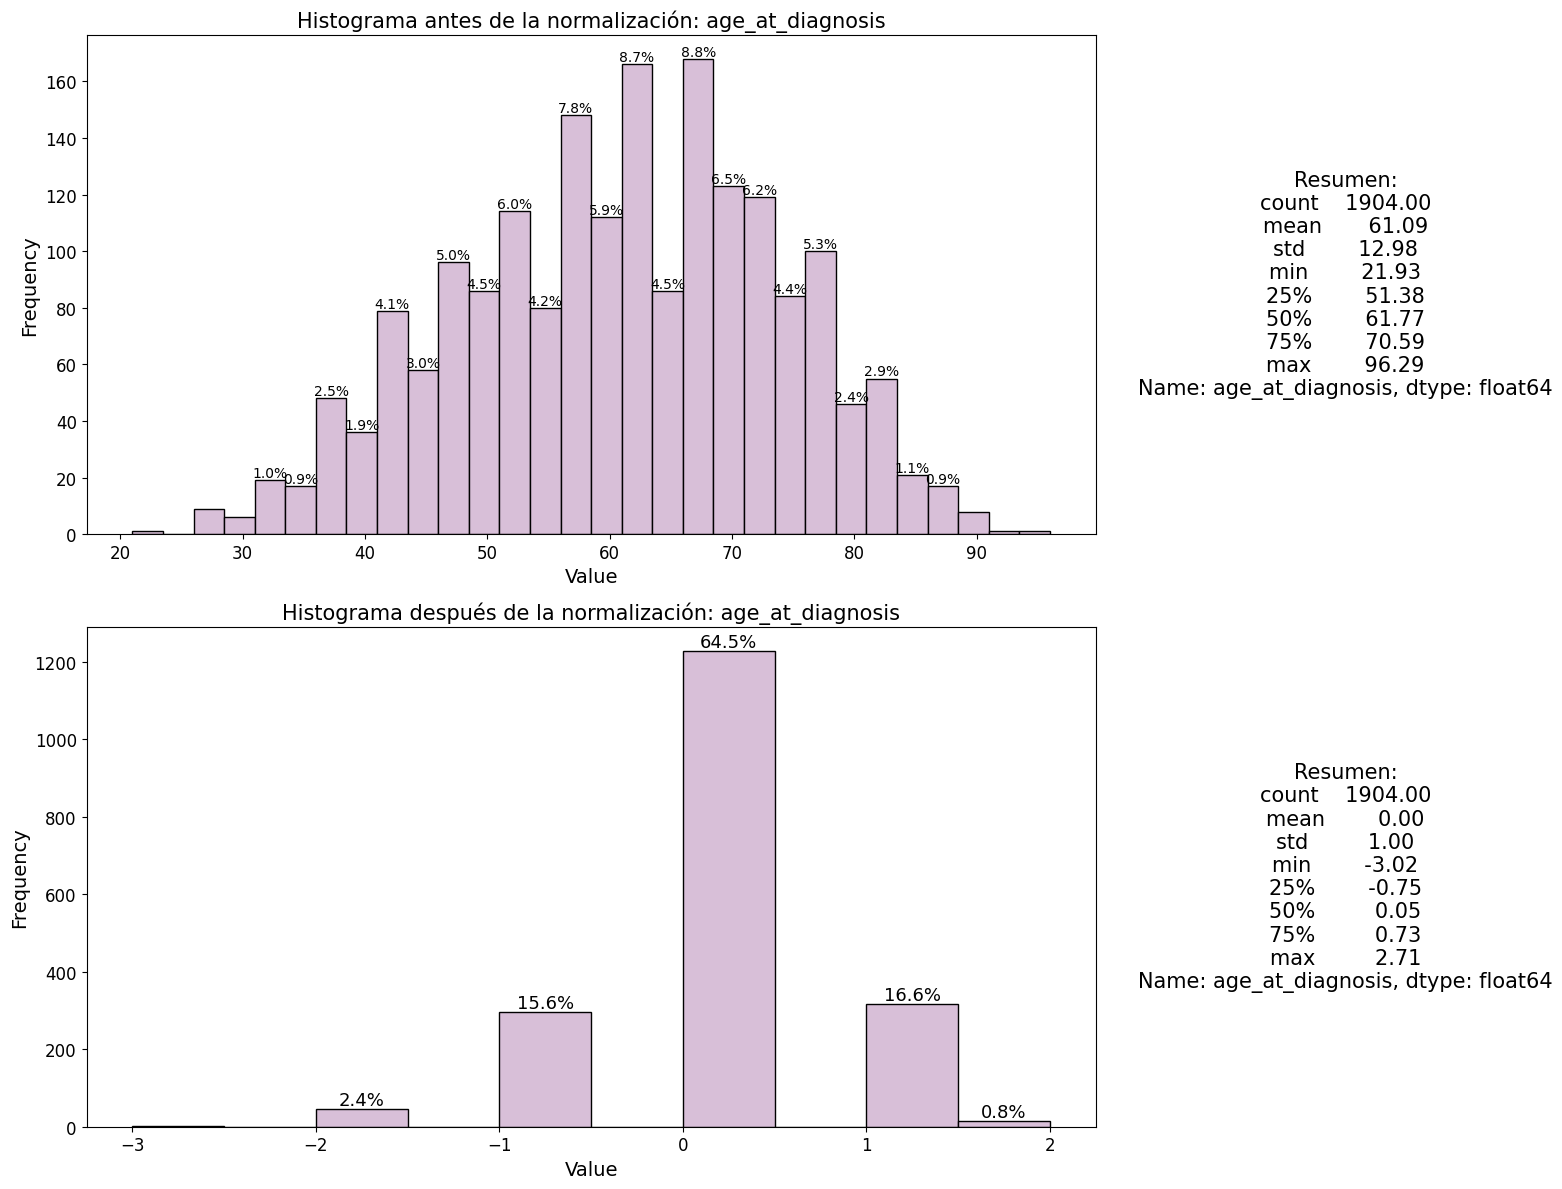

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=30, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=10, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'lymph_nodes_examined_positive'

La variable 'lymph_nodes_examined_positive' indica el resultado de examinar los ganglios linfáticos durante la cirugía de cáncer para evaluar si el cáncer los ha comprometido.
Represente la proporción de ganglios linfáticos examinados que mostraron compromiso por el cáncer.
Vemos que casi el 94% de los casos se encuentran entre 0 y 10.

In [9]:
col = metabrics_numeric_col[1]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna lymph_nodes_examined_positive no contiene valores nulos ni NA.


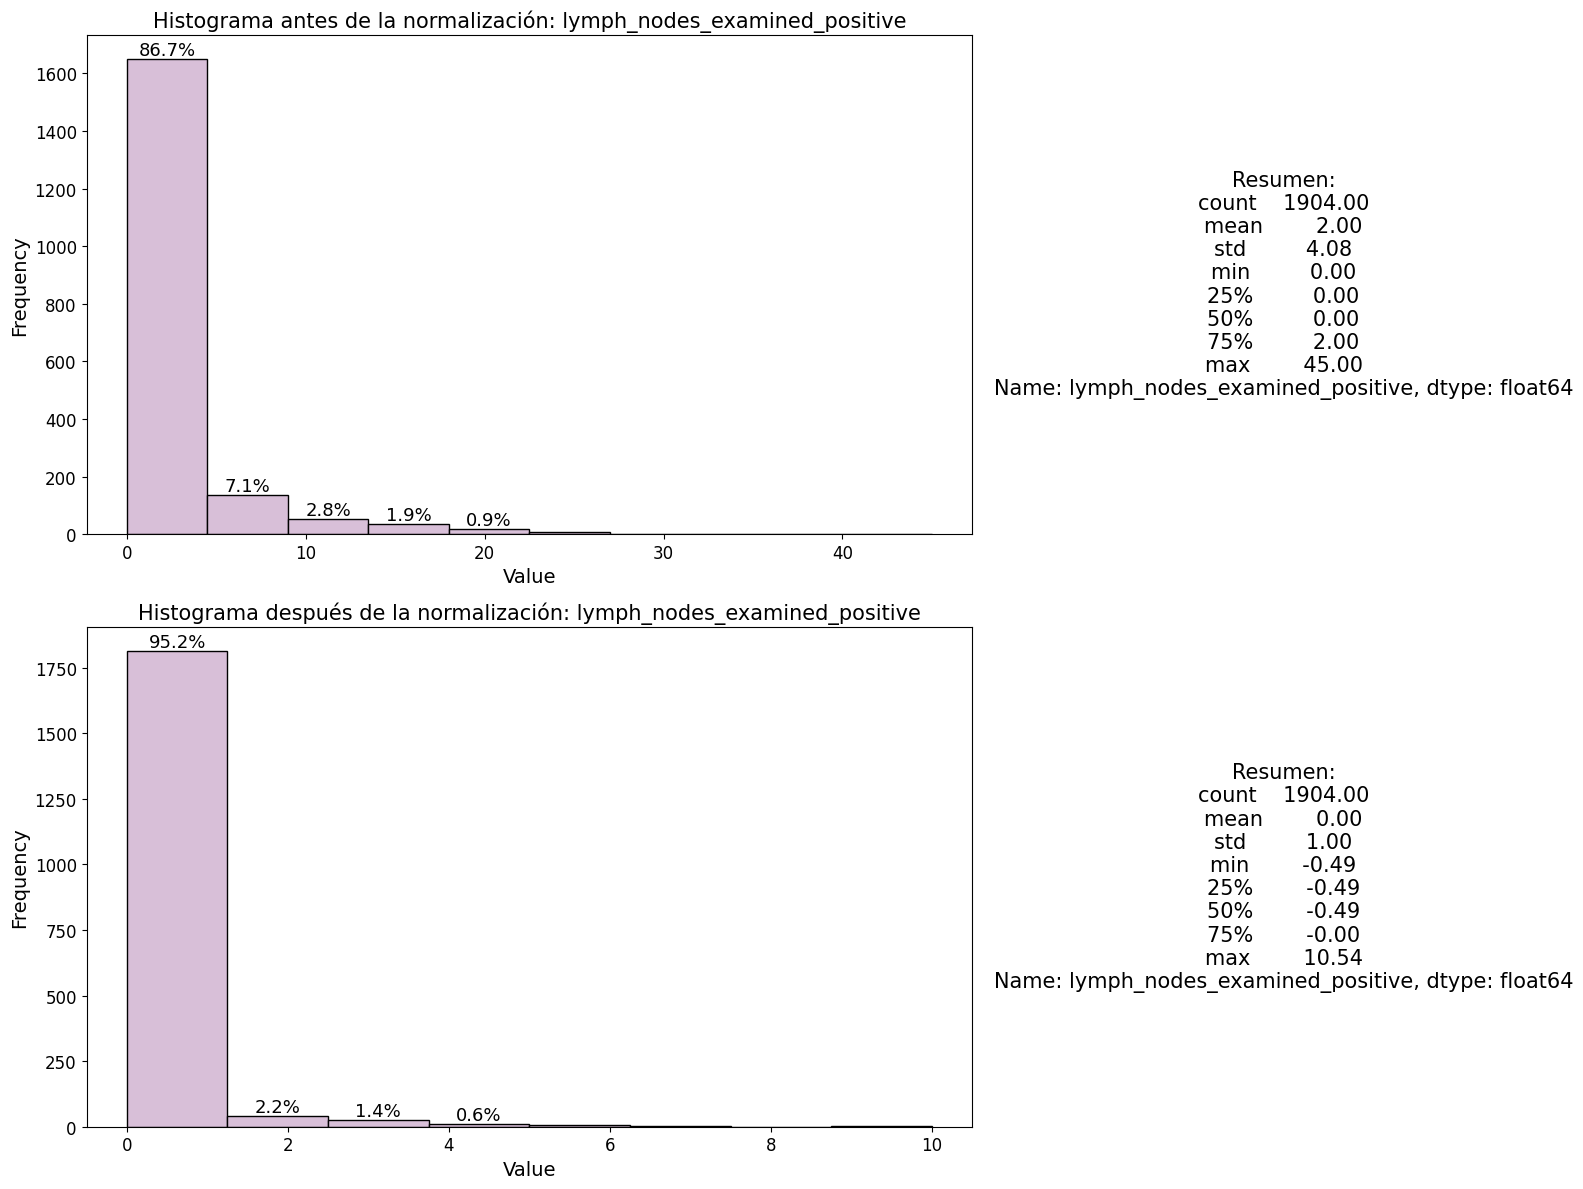

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=10, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=8, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'nottingham_prognostic_index'

La variable 'nottingham_prognostic_index' es una puntuación que se utiliza para estimar el pronóstico de una paciente después de una cirugía de cáncer de mama.
Se calcula en base a tres criterios patológicos clave:

* Tamaño del tumor: Los tumores más grandes generalmente indican una etapa más avanzada del cáncer.
* Número de ganglios linfáticos afectados: La presencia de células cancerosas en los ganglios linfáticos sugiere un mayor riesgo de que el cáncer se propague.
Un mayor número de ganglios linfáticos afectados indica un mayor riesgo.
* Grado del tumor: Esto se refiere a qué tan agresivas se ven las células cancerosas bajo el microscopio.

Los grados más altos generalmente están asociados con cánceres de crecimiento más rápido y más agresivos.

Considerando los estadísticos de esta variable en el conjunto de datos vemos que el valor mínimo es 1 y el máximo es 6.360, con un valor medio de 4.033


In [11]:
col = metabrics_numeric_col[2]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna nottingham_prognostic_index no contiene valores nulos ni NA.


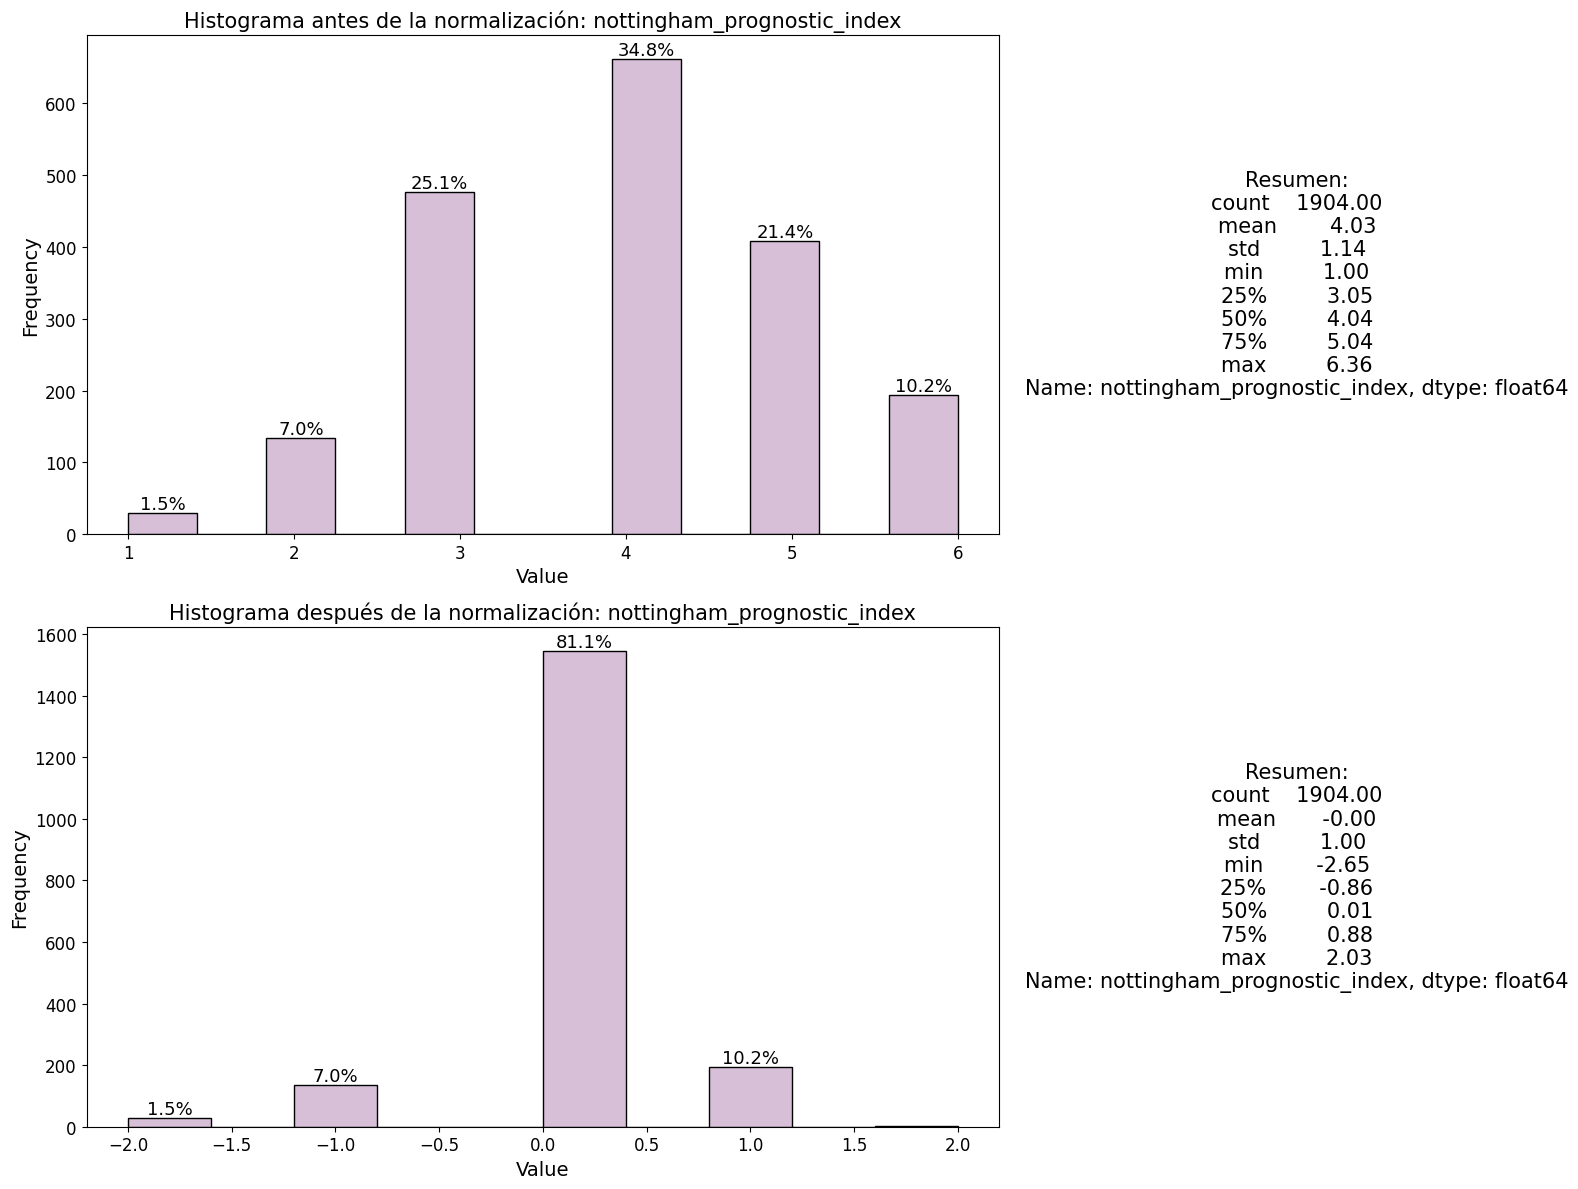

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=12, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'overall_survival_months'

La variable 'overall_survival_months' proporciona información sobre la duración de la supervivencia después de una intervención médica.

In [13]:
col = metabrics_numeric_col[3]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna overall_survival_months no contiene valores nulos ni NA.


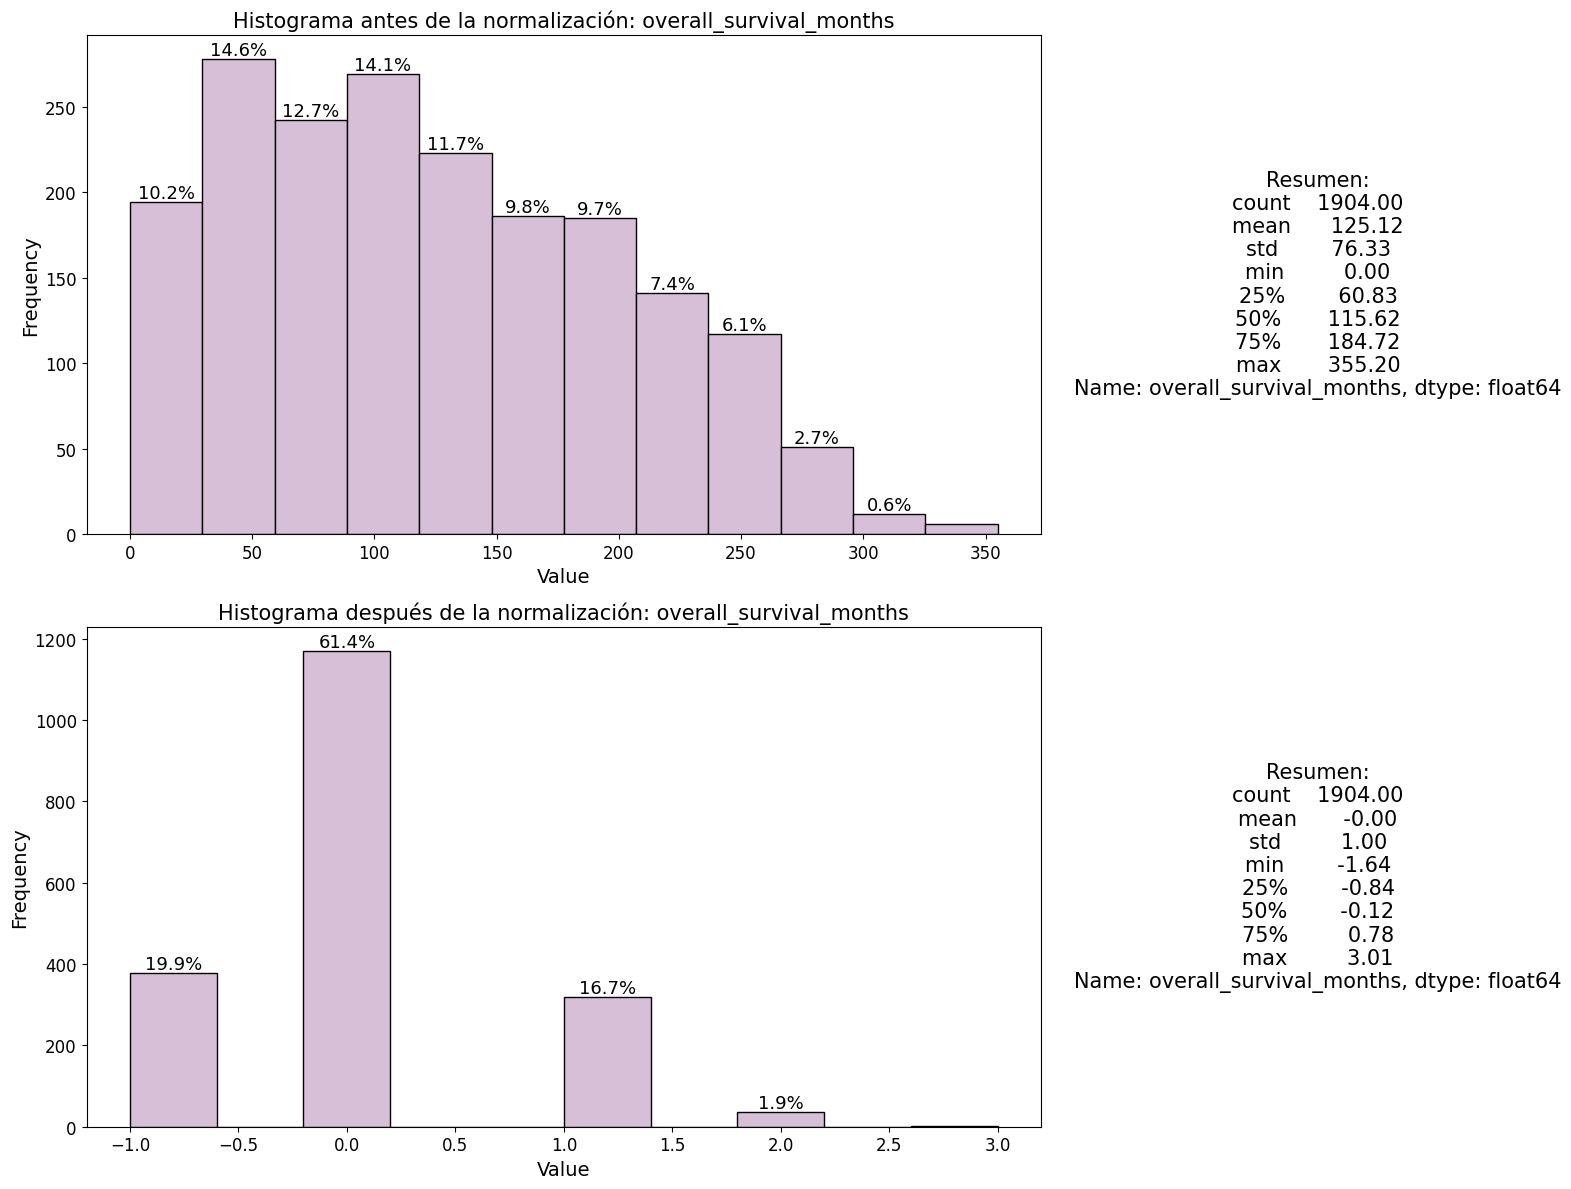

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=12, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'mutation_count'

La variable 'mutation_count' denota el número de genes que presentan mutaciones relevantes en el conjunto de datos. 
Los resultados estadísticos revelan una distribución variada: desde un mínimo de una mutación hasta un máximo de 80. En promedio, se observan alrededor de 5.7 genes con mutaciones relevantes por caso, con un tercer cuartil de 7. Esto sugiere que la mayoría de los casos tienen un número moderado de genes con mutaciones, aunque hay una variabilidad considerable, como se refleja en el rango y el valor máximo. Además, se identifican 45 casos con valores faltantes en esta variable. 
Para imputar esos valores utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [15]:
col = metabrics_numeric_col[4]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna mutation_count contiene 45 valores nulos o NA.


In [16]:
# Calcular la mediana de la columna mutation_count
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna mutation_count no contiene valores nulos ni NA.


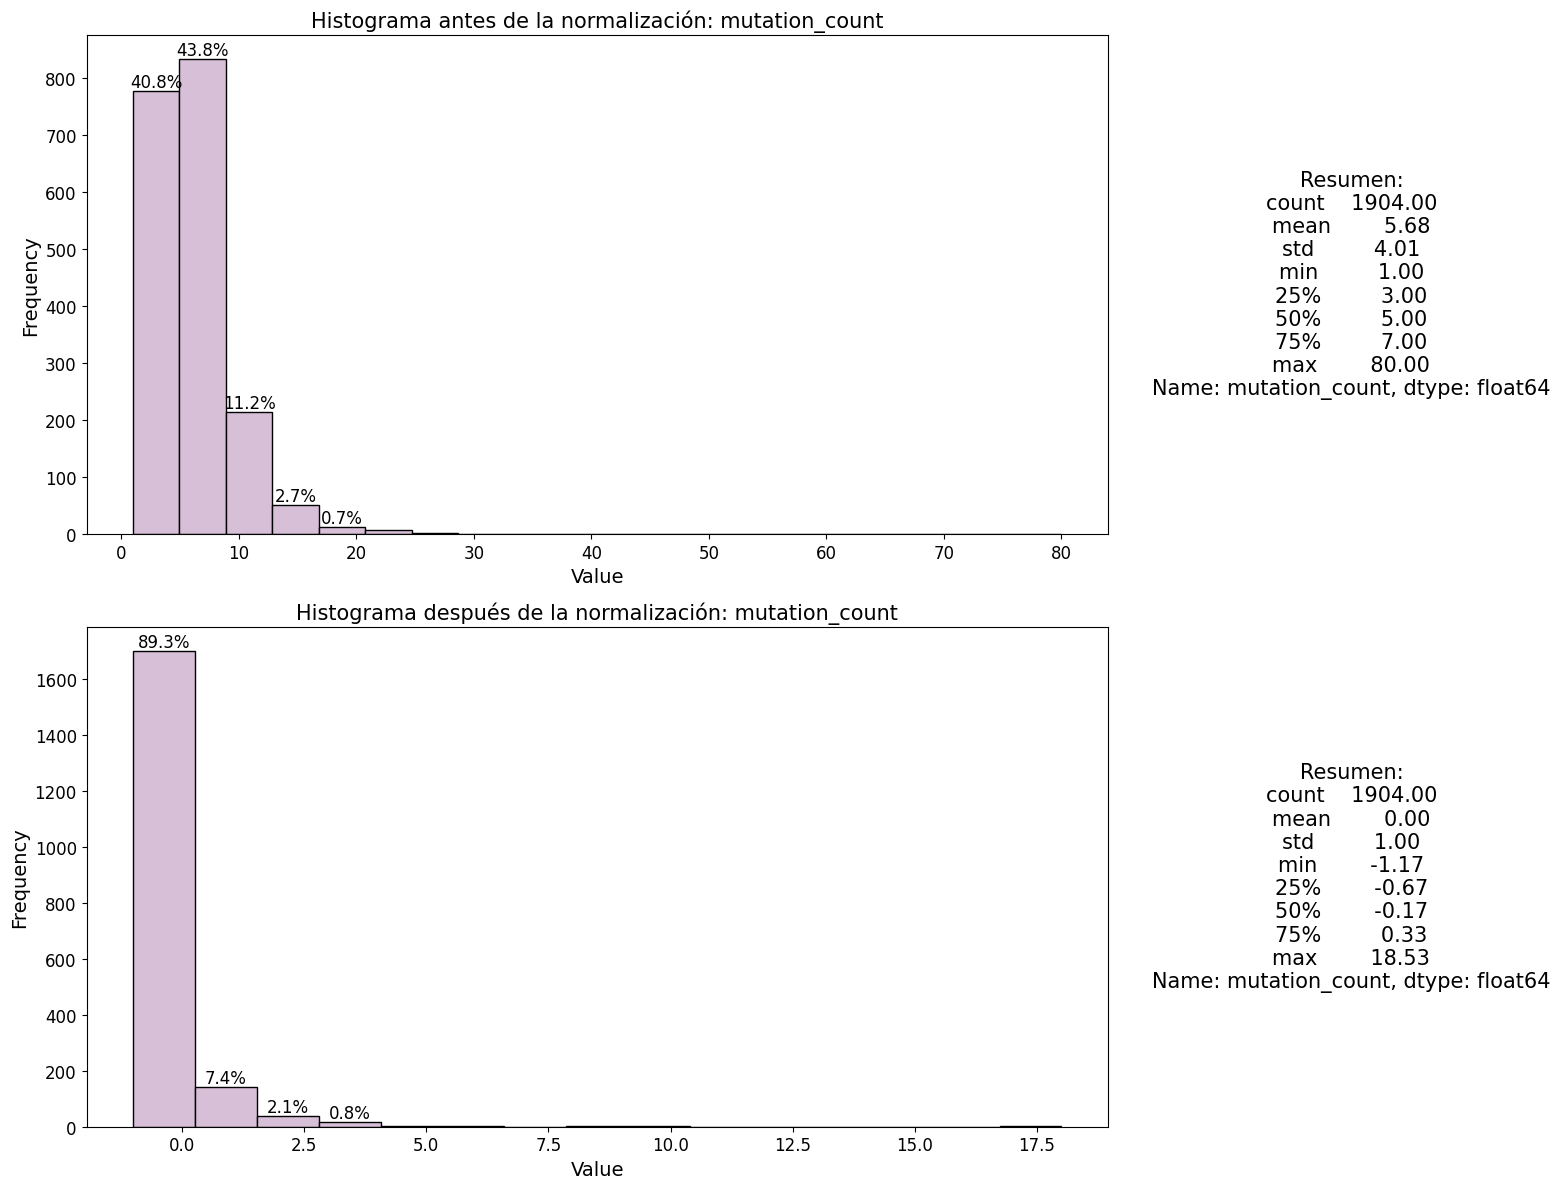

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=20, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=15, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'tumor_size'

La variable 'tumor_size' representa el tamaño del tumor en unidades específicas. El resumen estadístico indica que el tamaño mínimo del tumor es de 1 unidad, mientras que el tamaño máximo es de 182 unidades.
El tamaño medio del tumor es de aproximadamente 26.25 unidades. Además, hay 20 valores faltantes (NA's) en esta variable.
Para imputar esos valores utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [18]:
col = metabrics_numeric_col[5]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_size contiene 20 valores nulos o NA.


In [19]:
# Calcular la mediana
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_size no contiene valores nulos ni NA.


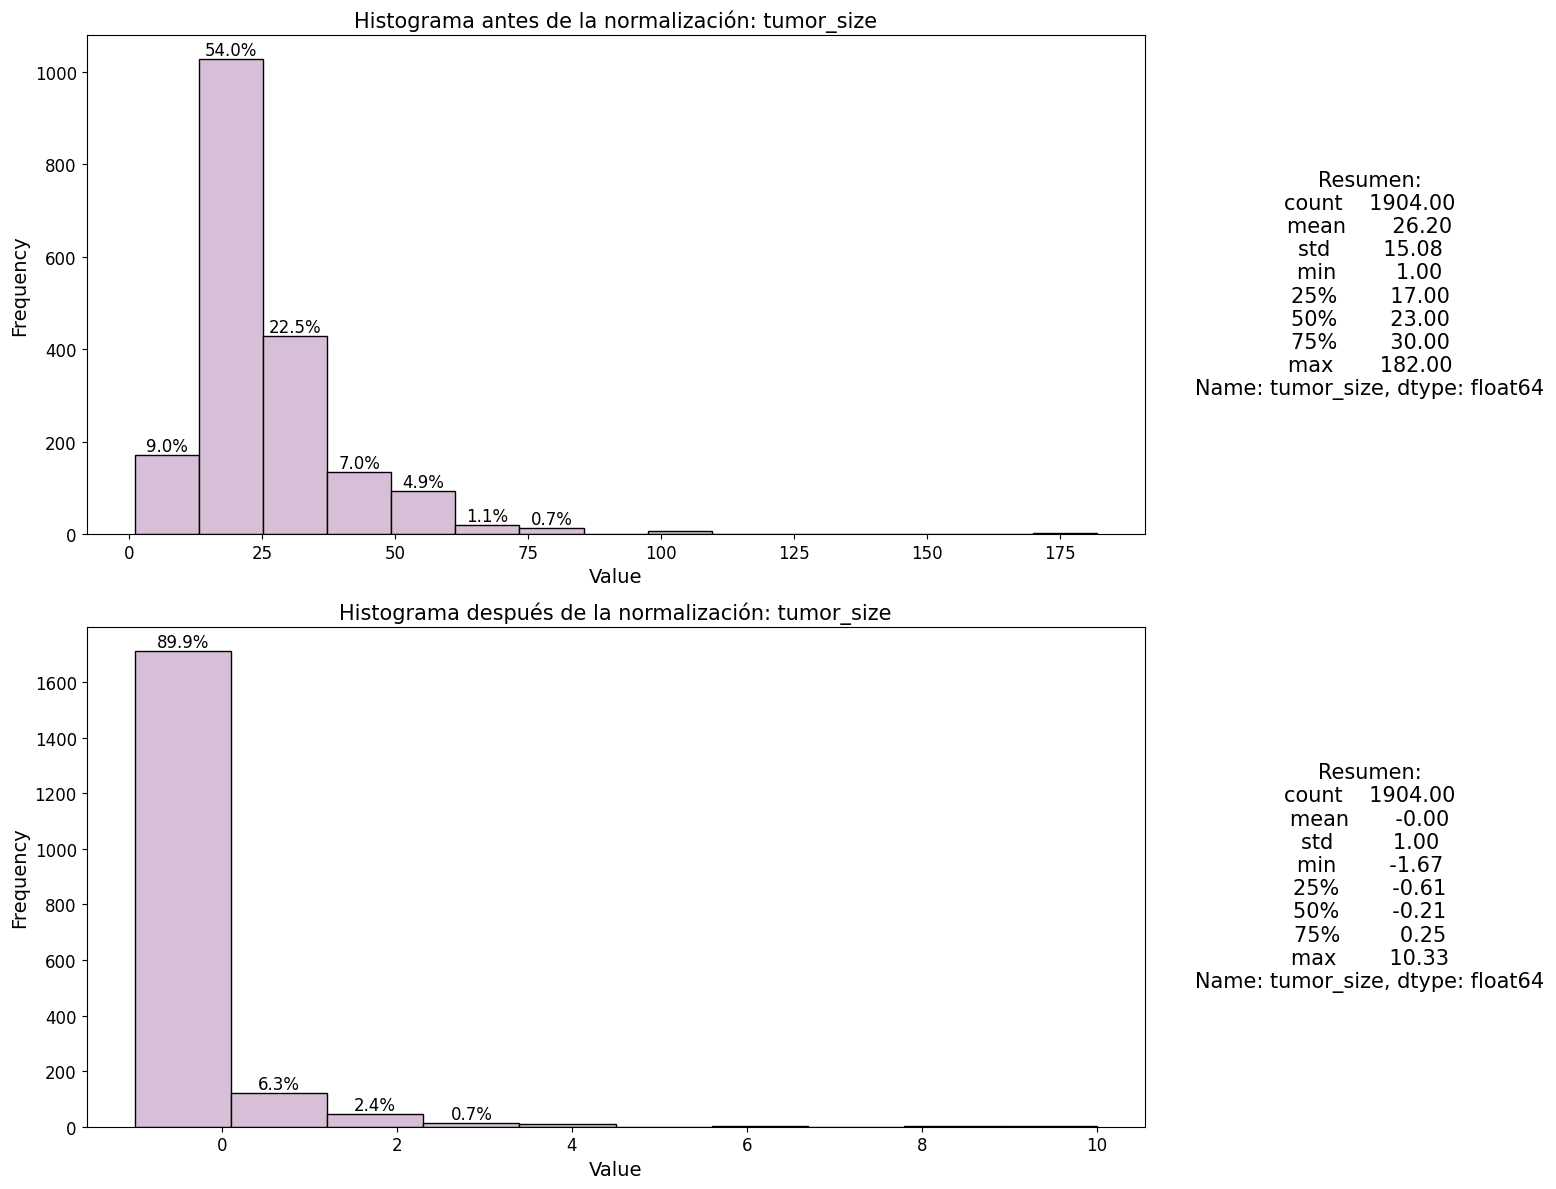

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=15, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'tumor_stage'

La variable 'tumor_stage' representa el estadio del cáncer basado en el grado de participación de las estructuras circundantes, los ganglios linfáticos y la propagación a distancia. 
Según los datos observamos en el histograma, hay un 68% de los pacientes con cáncer en el estadio 2, seguido por aproximadamente un 25% en el estadio 1. Un porcentaje menor de pacientes se encuentra en estadios más avanzados, con el 6% en el estadio 3.
Esta variable presenta 500 valores faltantes (NA's). Para imputarlos también utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [21]:
col = metabrics_numeric_col[6]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_stage contiene 501 valores nulos o NA.


In [22]:
# Calcular la mediana
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_stage no contiene valores nulos ni NA.


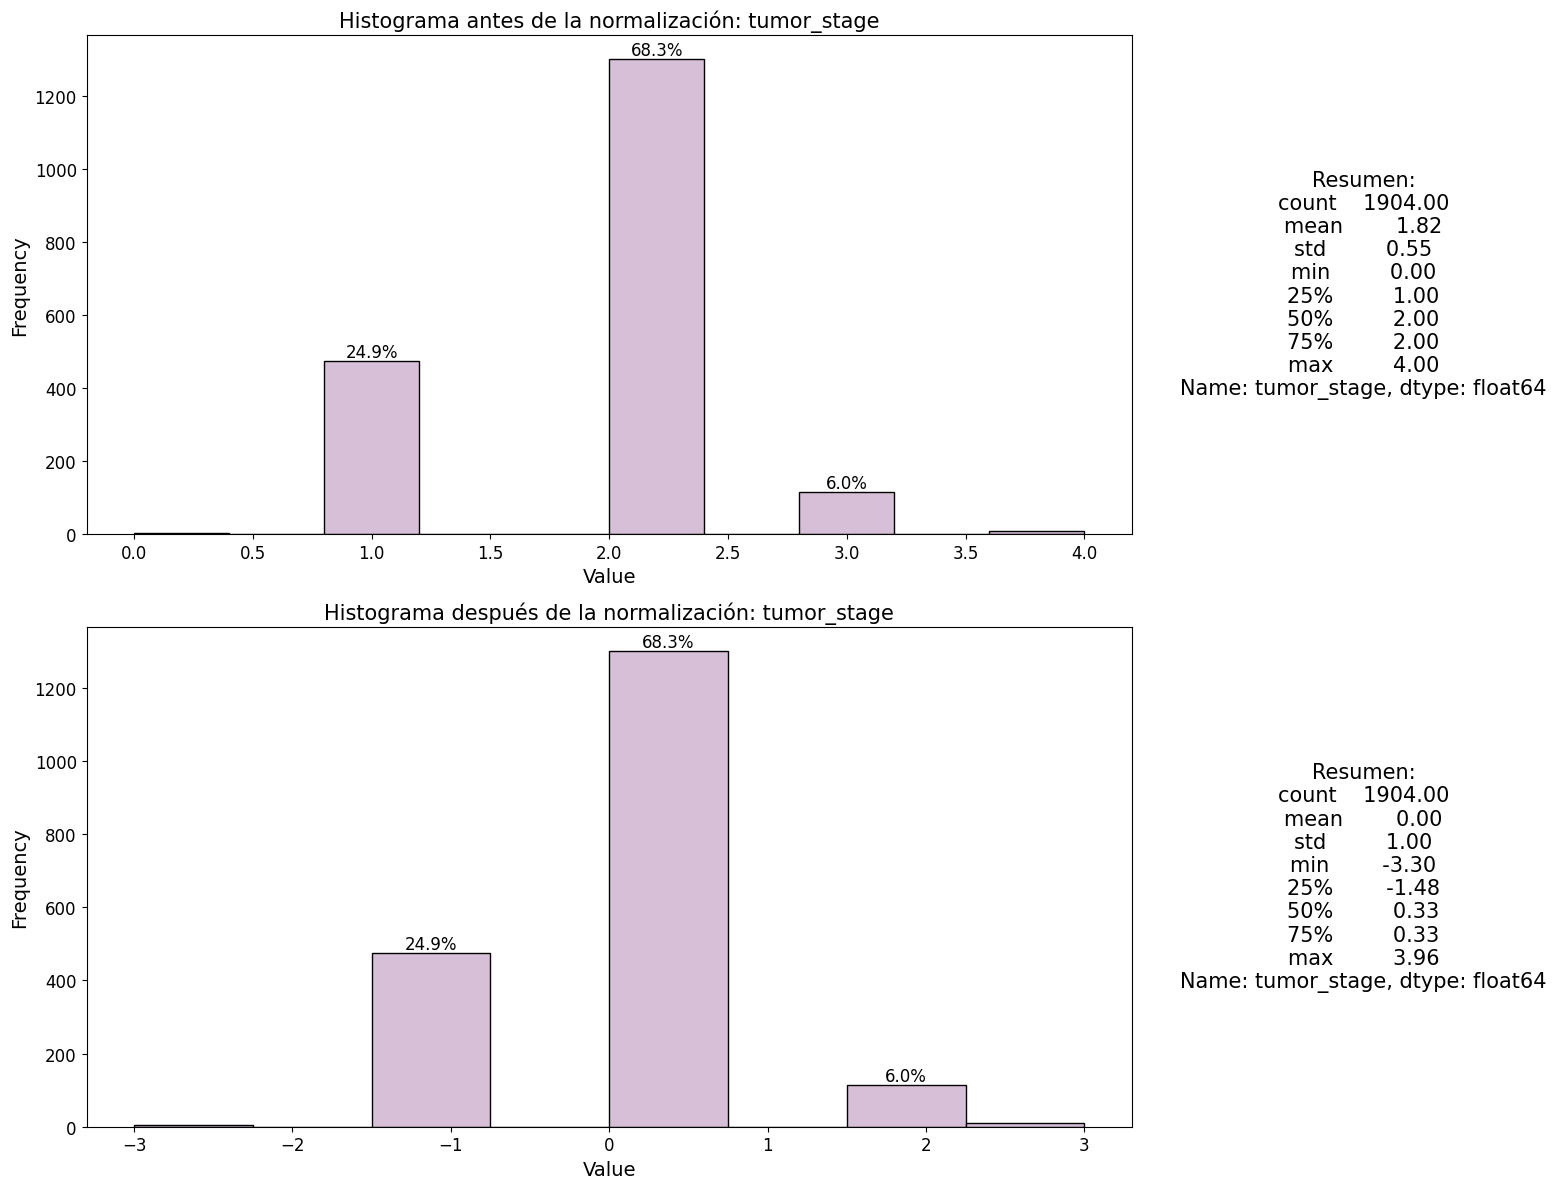

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=10, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=8, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

### Variables categóricas: 

In [24]:
metabrics_categorical_col = ("type_of_breast_surgery","cancer_type","cancer_type_detailed", "cellularity", "neoplasm_histologic_grade"
,"chemotherapy","hormone_therapy","radio_therapy",  "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc"
,"er_status","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype",
"inferred_menopausal_state","integrative_cluster","primary_tumor_laterality" ,"oncotree_code", "pr_status", 
"3-gene_classifier_subtype" ,"overall_survival", "death_from_cancer", "cohort")

#### 'type_of_breast_surgery'

Vemos que más de la mitad de las pacientes del conjunto de datos han pasado por una mastectomia.
También vemos que hay 22 registros faltantes, utilizaremos el método de imputación proporcional de valores faltantes para asignarles valores. 
Este método imputa los valores faltantes en una variable categórica proporcionalmente a la frecuencia de los valores observados en los datos, asegurando así que la distribución de los datos imputados refleje de manera realista la distribución de los datos observados.

In [25]:
col = metabrics_categorical_col[0]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna type_of_breast_surgery contiene 22 valores nulos o NA.


In [26]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,MASTECTOMY,1127,59.19
1,BREAST CONSERVING,755,39.65
2,NaN,22,1.16


In [27]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,MASTECTOMY,1142,59.98
1,BREAST CONSERVING,762,40.02


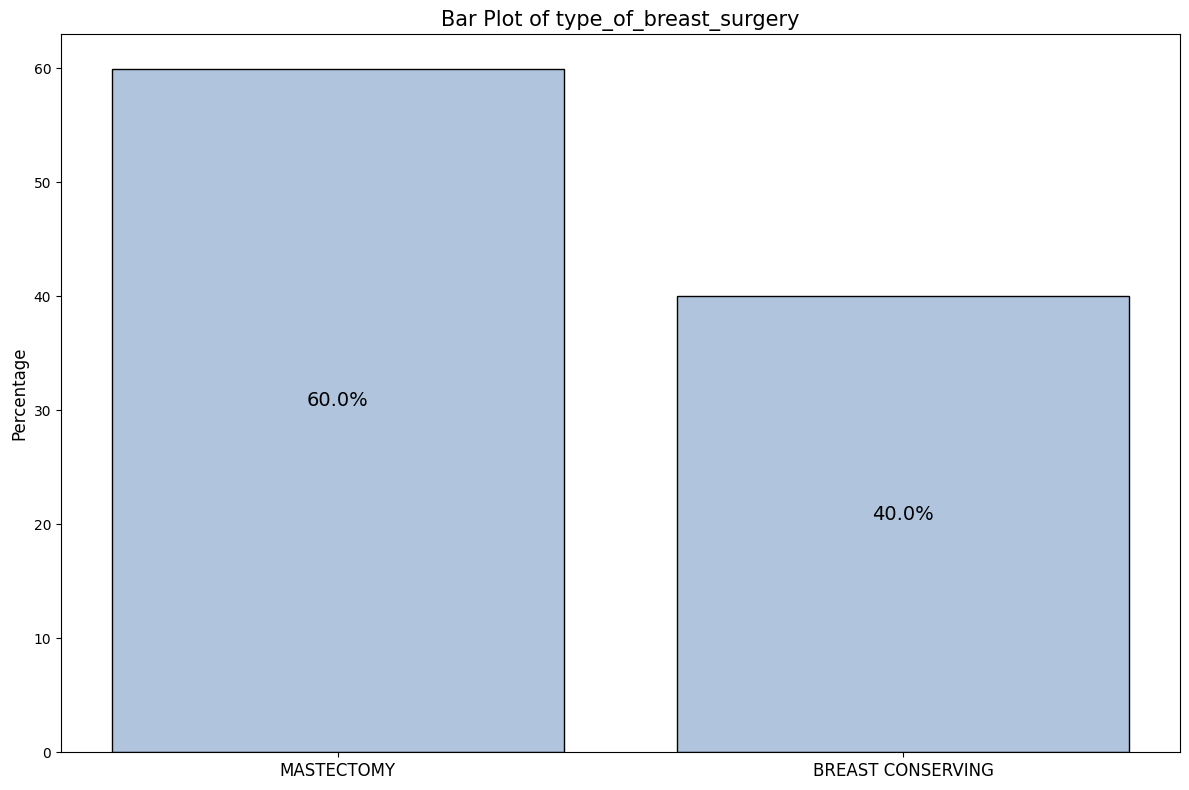

In [28]:
plot_category_bar(metabric_data[col], 14)

In [29]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 521)

#### 'cancer_type'

Vamos a descartar esta variable para los modelos ya que no brinda información adicional


In [30]:
col = metabrics_categorical_col[1]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cancer_type no contiene valores nulos ni NA.


In [31]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Cancer,1903,99.95
1,Breast Sarcoma,1,0.05


In [32]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 522)

#### 'cancer_type_detailed'

La variable 'cancer_type_detailed' muestra la distribución de casos por tipo detallado de cáncer de mama.
El tipo más frecuente es "Breast Invasive Ductal Carcinoma" con 1500 registros, representando aproximadamente el 80% de los casos.
Le siguen en frecuencia "Breast Mixed Ductal and Lobular Carcinoma" (207 registros, 11%), "Breast Invasive Lobular Carcinoma" (142 registros, 7.3%) y "Breast Invasive Mixed Mucinous Carcinoma" (22 registros, 1.2%).
Hay 15 registros que no tienen ningún valor asignado de esta variable, en este caso también usaremos el método de imputación proporcional.

In [33]:
col = metabrics_categorical_col[2]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cancer_type_detailed contiene 15 valores nulos o NA.


In [34]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Invasive Ductal Carcinoma,1500,78.78
1,Breast Mixed Ductal and Lobular Carcinoma,207,10.87
2,Breast Invasive Lobular Carcinoma,142,7.46
3,Breast Invasive Mixed Mucinous Carcinoma,22,1.16
4,Breast,17,0.89
5,NaN,15,0.79
6,Metaplastic Breast Cancer,1,0.05


In [35]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Invasive Ductal Carcinoma,1508,79.20
1,Breast Mixed Ductal and Lobular Carcinoma,213,11.19
2,Breast Invasive Lobular Carcinoma,143,7.51
3,Breast Invasive Mixed Mucinous Carcinoma,22,1.16
4,Breast,17,0.89
5,Metaplastic Breast Cancer,1,0.05


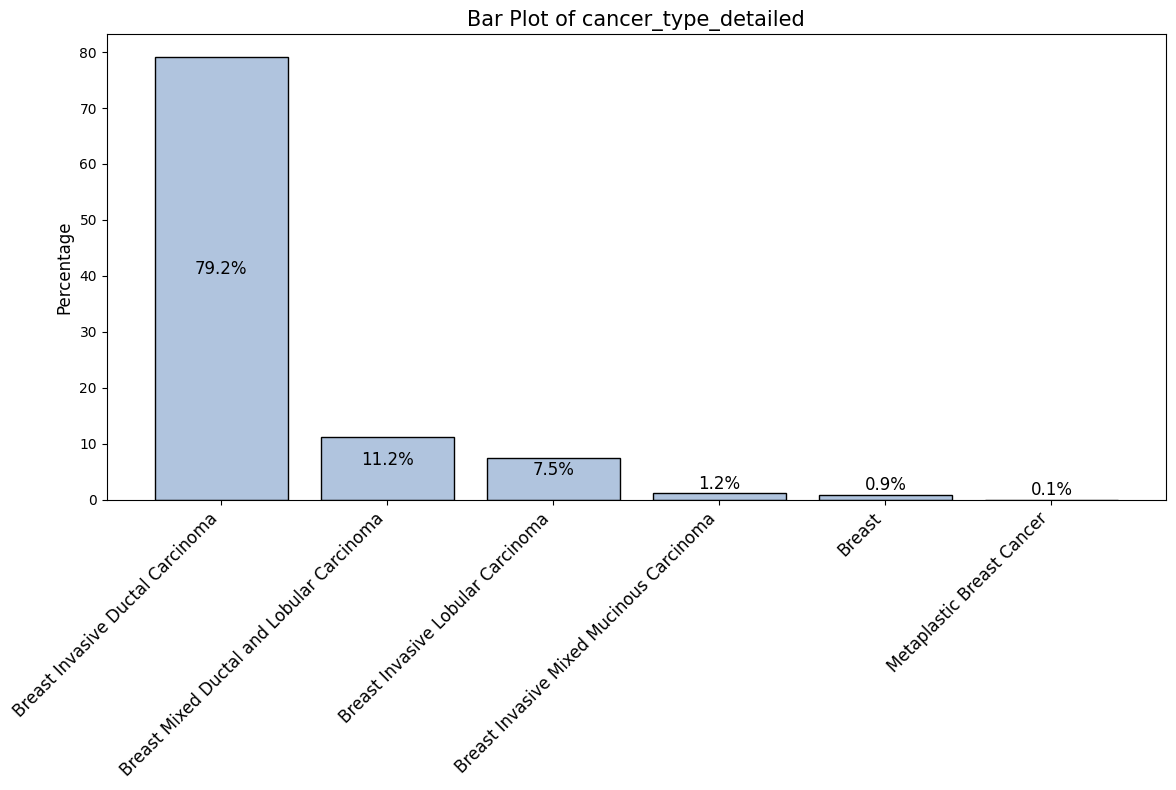

In [36]:
plot_category_bar(metabric_data[col], 12)

In [37]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 527)

#### 'cellularity'

La variable "cellularity" se refiere a la celularidad del cáncer después de la quimioterapia, es decir la cantidad de células tumorales en la muestra y su disposición en grupos o conglomerados.
Los valores que toma son "High" (Alta), "Low" (Baja) y "Moderate" (Moderada).
Esta información proporciona detalles sobre la densidad de las células tumorales en la muestra después del tratamiento con quimioterapia.
En el conjunto de datos aproximadamente el 50% de las muestras tienen celularidad alta, seguido de un 37% de celularidad media, 10% de celularidad baja y aproximadamente un 3% de valores faltantes, asignaremos la categoría 'Unknown' a estos 54 registros que no tienen celularidad.

In [38]:
col = metabrics_categorical_col[3]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cellularity contiene 54 valores nulos o NA.


In [39]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,High,939,49.32
1,Moderate,711,37.34
2,Low,200,10.50
3,NaN,54,2.84


In [40]:
# Creo una nueva categoria para los valores nulos
metabric_data['cellularity'] = metabric_data['cellularity'].fillna('Unknown')
category_summary(metabric_data[col])

,Category,Count,Percentage
0,High,939,49.32
1,Moderate,711,37.34
2,Low,200,10.50
3,Unknown,54,2.84


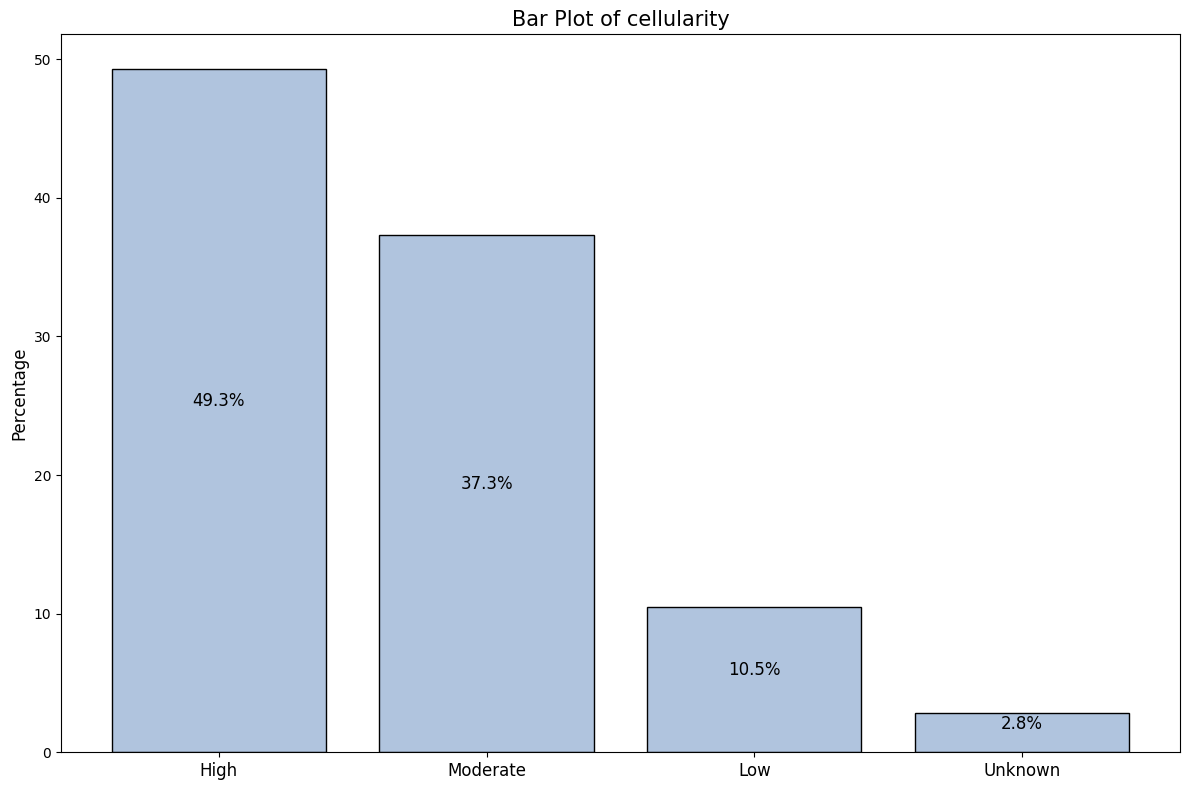

In [41]:
plot_category_bar(metabric_data[col], 12)

In [42]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 530)

#### 'neoplasm_histologic_grade'

La variable 'neoplasm_histologic_grade' representa el grado histológico del tumor.
Es una medida que describe cómo se ve el tejido del tumor bajo un microscopio y generalmente se basa en la diferenciación celular, el tamaño del núcleo celular, la tasa de crecimiento y la arquitectura del tejido tumoral.

Esta es la variable target que se intenterá  predecir con clasificadores en la segunda parte del proyecto.

Se utiliza para clasificar el tumor en diferentes categorías que reflejan su agresividad y pronóstico: 
* Grado I (bajo grado): Las células cancerosas se parecen más a las células normales y tienden a crecer y propagarse más lentamente.
* Grado II (grado intermedio): Las células cancerosas tienen características intermedias entre las de grado I y grado III.
* Grado III (alto grado): Las células cancerosas se ven muy diferentes de las células normales y tienden a crecer y propagarse más rápidamente.

Observando los resultados vemos que el 50% de los casos que se presentan en este conjunto de datos corresponden a una clasificación grado III, seguida de un 40% de grado II y por último sólo un 9% de los registros presentan grado I.
Esta variable tiene 72 valores nulos pero dado que será la variable target, eliminaremos estos registros del conjunto de datos.

In [43]:
col = metabrics_categorical_col[4]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna neoplasm_histologic_grade contiene 72 valores nulos o NA.


In [44]:
#Elimino registros con valores null
metabric_data.dropna(subset=['neoplasm_histologic_grade'], inplace=True)
category_summary(metabric_data[col])

,Category,Count,Percentage
0,3.0,927,50.60
1,2.0,740,40.39
2,1.0,165,9.01


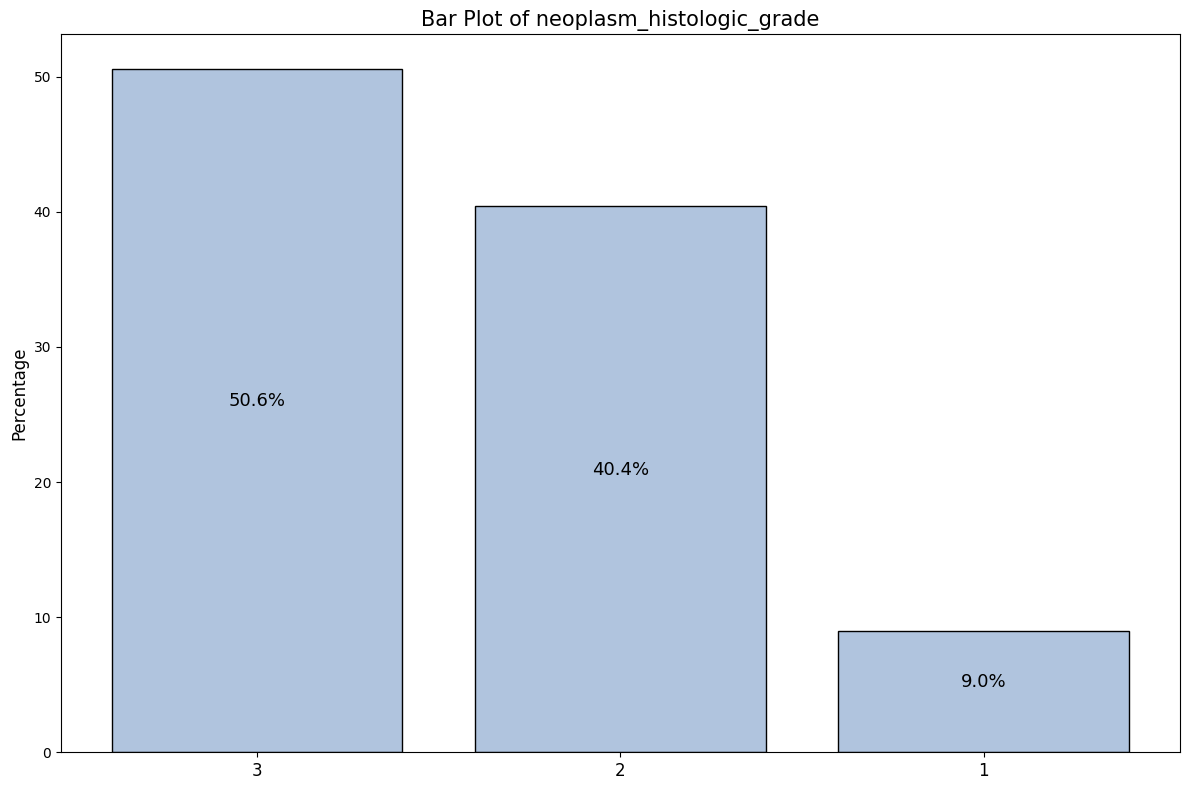

In [45]:
plot_category_bar(metabric_data[col], 13)

#### 'chemotherapy'

Vemos que aproximadamente el 21% de las pacientes del conjunto de datos han pasado por quimioterapia.

In [46]:
col = metabrics_categorical_col[5]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna chemotherapy no contiene valores nulos ni NA.


In [47]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,0,1440,78.6
1,1,392,21.4


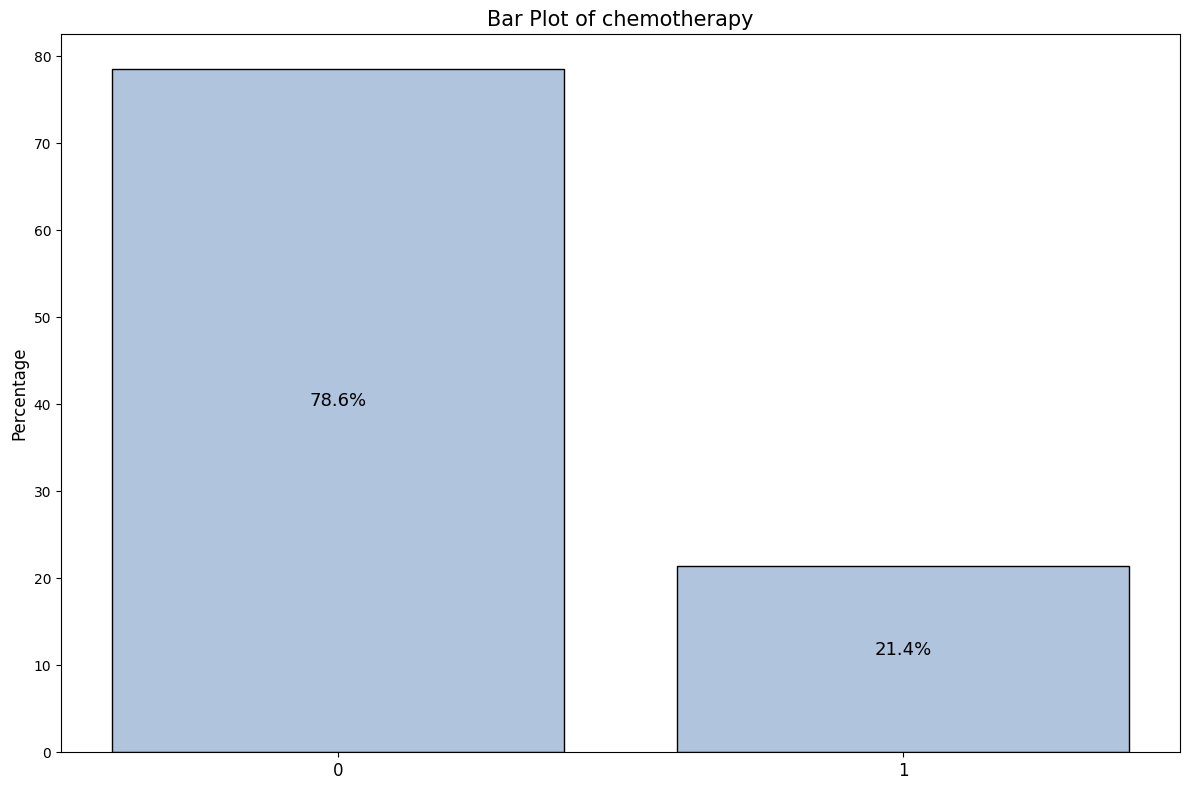

In [48]:
plot_category_bar(metabric_data[col], 13)

In [49]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 531)

#### 'hormone_therapy'

Por otro lado, el 62% ha estado bajo terapia hormonal

In [50]:
col = metabrics_categorical_col[6]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna hormone_therapy no contiene valores nulos ni NA.


In [51]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,1,1131,61.74
1,0,701,38.26


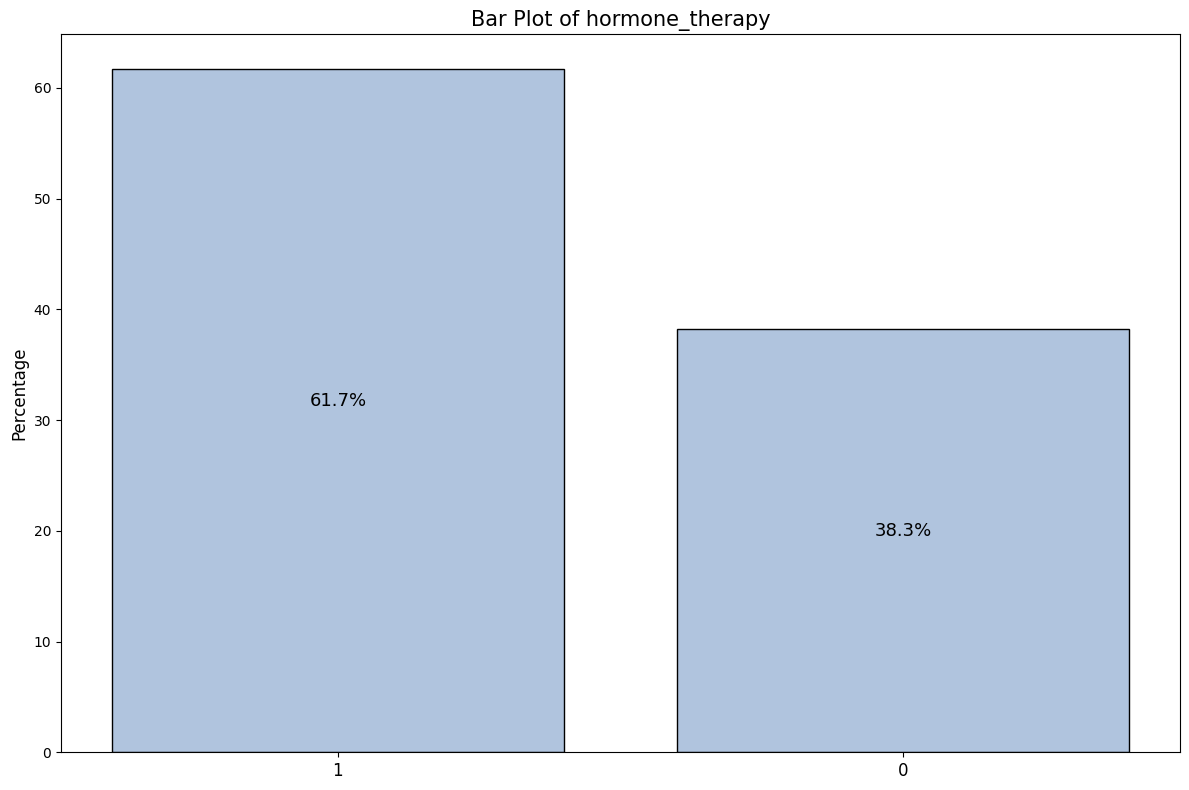

In [52]:
plot_category_bar(metabric_data[col], 13)

In [53]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 532)

#### 'radio_therapy'

En cuanto a la radioterapia, los valores son similares a la terapia hormonal, aproximadamente el 61% de las pacientes han pasado por radioterapia.

In [54]:
col = metabrics_categorical_col[7]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna radio_therapy no contiene valores nulos ni NA.


In [55]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,1,1111,60.64
1,0,721,39.36


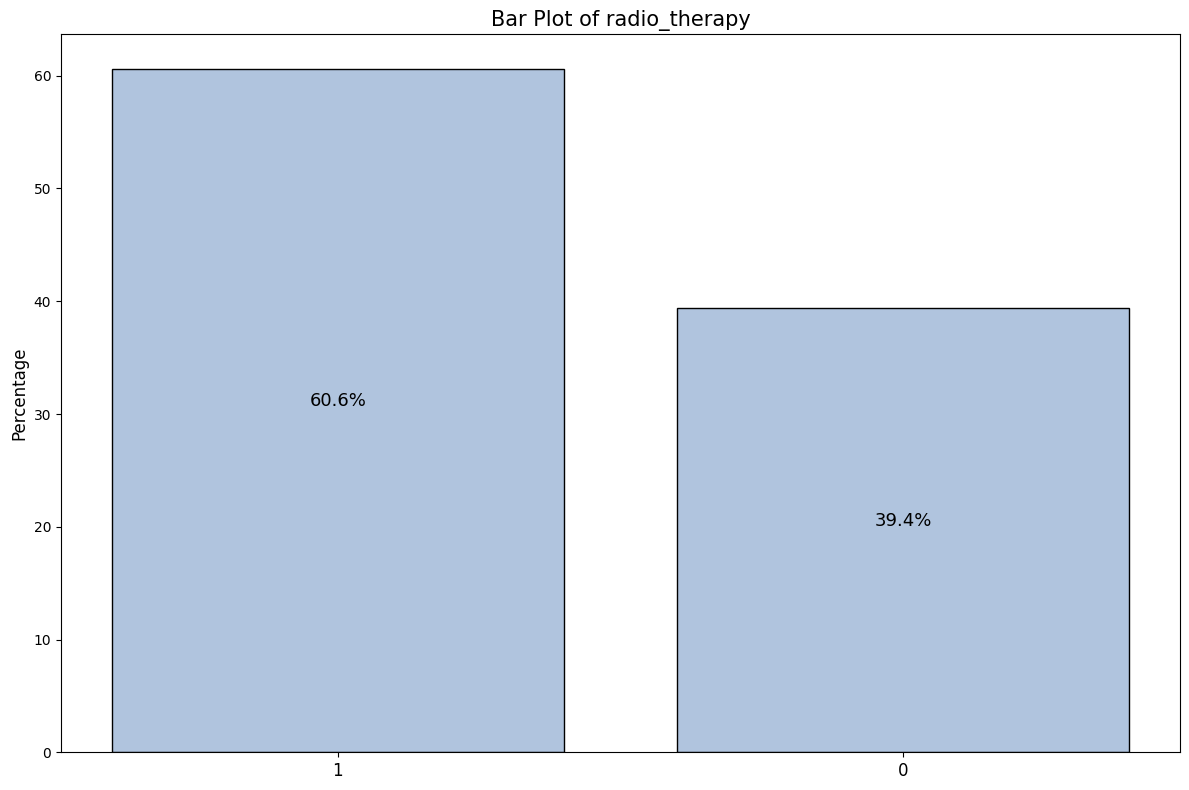

In [56]:
plot_category_bar(metabric_data[col], 13)

In [57]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 533)

#### 'pam50\_.\_claudin.low_subtype'

La variable 'pam50\_+\_claudin-low_subtype' representa el subtipo intrínseco de un cáncer de mama basado en el análisis de la expresión génica.

Este nombre combina dos sistemas de clasificación para el cáncer de mama:

-   pam50: Es una firma de expresión de 50 genes que ayuda a identificar subtipos de cáncer de mama con diferentes riesgos de metástasis (propagación) y respuesta al tratamiento.
-   claudin-low: Se refiere al subtipo claudin-low, un tipo específico de cáncer de mama caracterizado por la baja expresión de genes implicados en la adhesión celular y la alta expresión de genes asociados con la transición epitelial-mesenquimatosa (EMT) y propiedades similares a las células madre.

La variable puede tomar los siguientes valores:

* Basal: Este subtipo es agresivo y tiene el peor pronóstico.
Suele ser negativo para los receptores de estrógeno y progesterona (ER/PR negativo) y HER2 negativo.
* Claudin-low: Este subtipo se define por firmas de baja adhesión celular y EMT.
A menudo se encuentra dentro de la categoría basal.
* HER2: Este subtipo se define por la sobreexpresión del gen HER2, el cual puede ser atacado por terapias específicas.
* LumA: Este subtipo generalmente se considera el más favorable, con bajo riesgo de recurrencia y a menudo positivo para ER y PR.
* LumB: Este subtipo muestra algunas características agresivas en comparación con LumA, pero aún suele ser ER/PR positivo.
* NC: Significa "no clasificado".
Es posible que las muestras no encajen claramente en ninguna de las otras categorías.
* Normal: Indica una muestra de tejido sano, no canceroso.

En cuanto a la distribución vemos que es cercana al 10% para todos los casos con excepción de los dos subtipos LumA y LumB, siendo el LumA el porcentaje principal con el 34% de los casos.


In [58]:
col = metabrics_categorical_col[8]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna pam50_+_claudin-low_subtype no contiene valores nulos ni NA.


In [59]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,LumA,648,35.37
1,LumB,446,24.34
2,Her2,209,11.41
3,Basal,199,10.86
4,claudin-low,193,10.53
5,Normal,132,7.21
6,NC,5,0.27


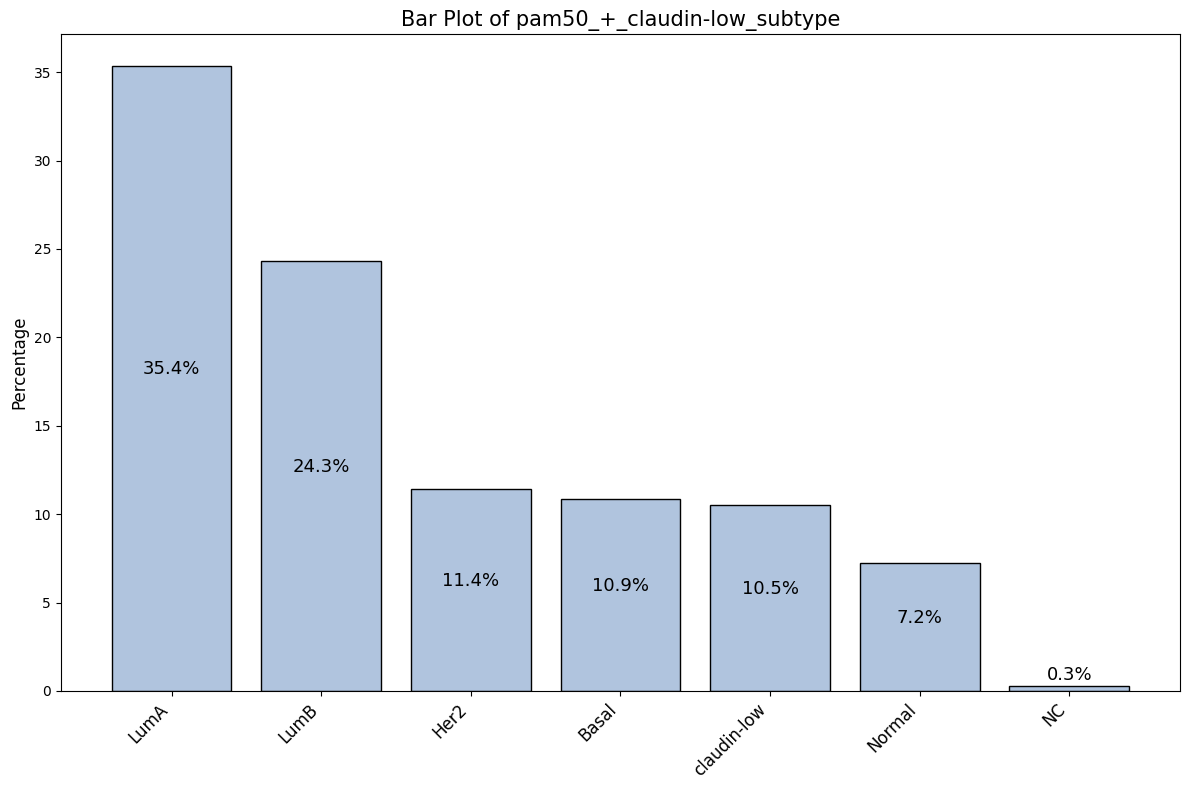

In [60]:
plot_category_bar(metabric_data[col], 13)

In [61]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 539)

#### 'er_status_measured_by_ihc'

La variable 'er_status_measured_by_ihc' indica el estado de los receptores de estrógeno (RE) en las células cancerosas, evaluado mediante inmunohistoquímica (IHC).
La IHC utiliza anticuerpos específicos para unirse a los RE si están presentes en las células.Posteriormente, se aplica un tinte para visualizar los anticuerpos unidos, lo que permite determinar si las células cancerosas son positivas o negativas para RE.

La variable puede tomar dos valores:

* Positive: Indica que las células cancerosas expresan receptores de estrógeno.
Los cánceres de mama con RE positivos suelen responder favorablemente a terapias hormonales como el tamoxifeno.
* Negative: Indica que las células cancerosas no expresan receptores de estrógeno.
Los cánceres de mama RE negativos generalmente no responden a las terapias hormonales.

En este caso vemos que el 76% de los casos son positivos y hay 23 registros con valores faltantes, los imputaremos utilizando el método proporcional.


In [62]:
col = metabrics_categorical_col[9]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna er_status_measured_by_ihc contiene 23 valores nulos o NA.


In [63]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positve,1388,75.76
1,Negative,421,22.98
2,NaN,23,1.26


In [64]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positve,1406,76.75
1,Negative,426,23.25


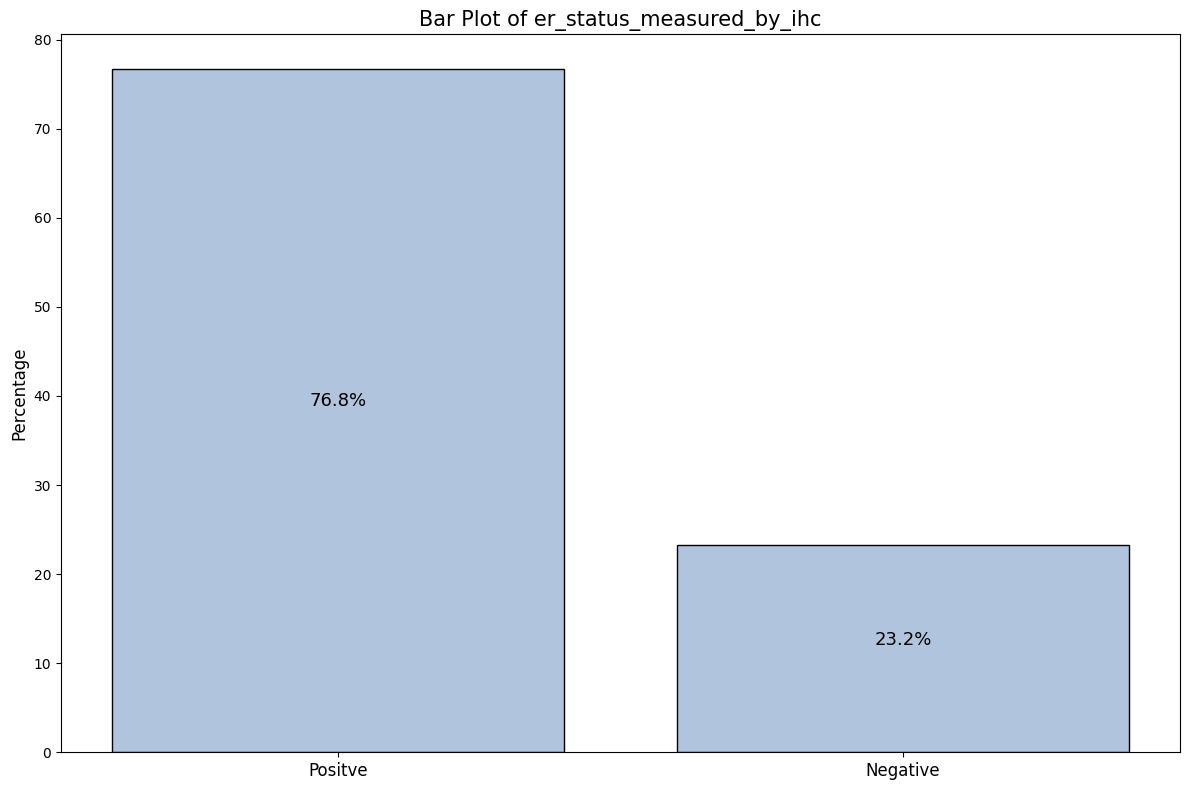

In [65]:
plot_category_bar(metabric_data[col], 13)

In [66]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 540)

#### 'er_status'

Tiene el mismo significado que la variable anterior pero sin especificar el método utilizado.
Para el modelo usaré esta y dejaré la anterior afuera ya que tiene algunos valores nulos y no aporta información extra.

In [67]:
col = metabrics_categorical_col[10]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna er_status no contiene valores nulos ni NA.


In [68]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positive,1396,76.2
1,Negative,436,23.8


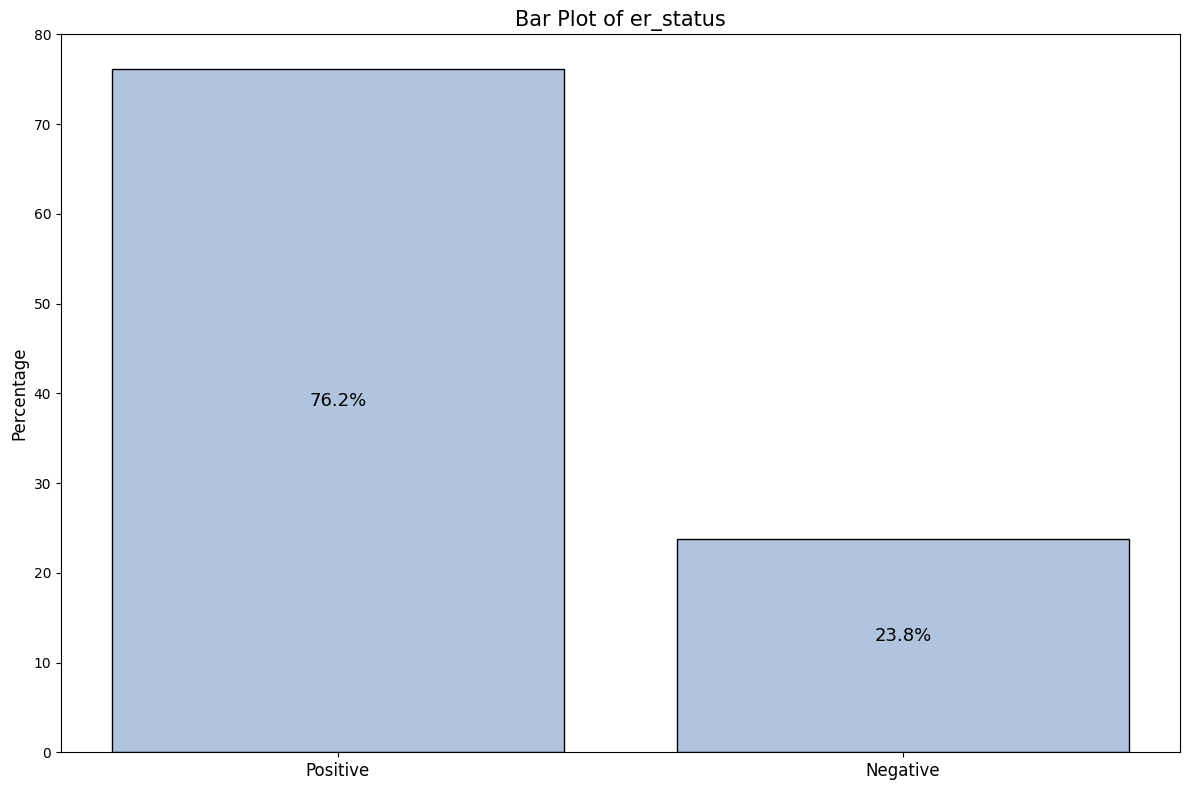

In [69]:
plot_category_bar(metabric_data[col], 13)

In [70]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 541)

#### 'her2_status_measured_by_snp6'

La variable 'her2_status_measured_by_snp6' indica el estado del gen HER2 (receptor del factor de crecimiento epidérmico humano 2) en las muestras de cáncer de mama.
Se determina mediante una técnica avanzada de biología molecular llamada "análisis de SNP6" (Single Nucleotide Polymorphism 6).
Indica si hay amplificación, pérdida o un nivel normal del gen HER2 en las células cancerosas

La variable puede tomar cuatro valores:

* Gain: Indica que hay un aumento en el número de copias del gen HER2 en las células cancerosas.
Esto se asocia con un cáncer de mama HER2 positivo, que suele ser más agresivo pero responde bien a terapias dirigidas contra HER2.
* Loss: Indica que hay una disminución en el número de copias del gen HER2 en las células cancerosas.
* Neutral: Indica que el número de copias del gen HER2 se encuentra en un nivel normal.
* Undef: Indica que el estado del gen HER2 no se pudo determinar mediante el análisis de SNP6.

Analizando el gráfico vemos que el 22% de los casos del dataset corresponden a la categoría GAIN y la mayoría, el 72% se encuentran en niveles normales.


In [71]:
col = metabrics_categorical_col[11]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna her2_status_measured_by_snp6 no contiene valores nulos ni NA.


In [72]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,NEUTRAL,1325,72.33
1,GAIN,405,22.11
2,LOSS,98,5.35
3,UNDEF,4,0.22


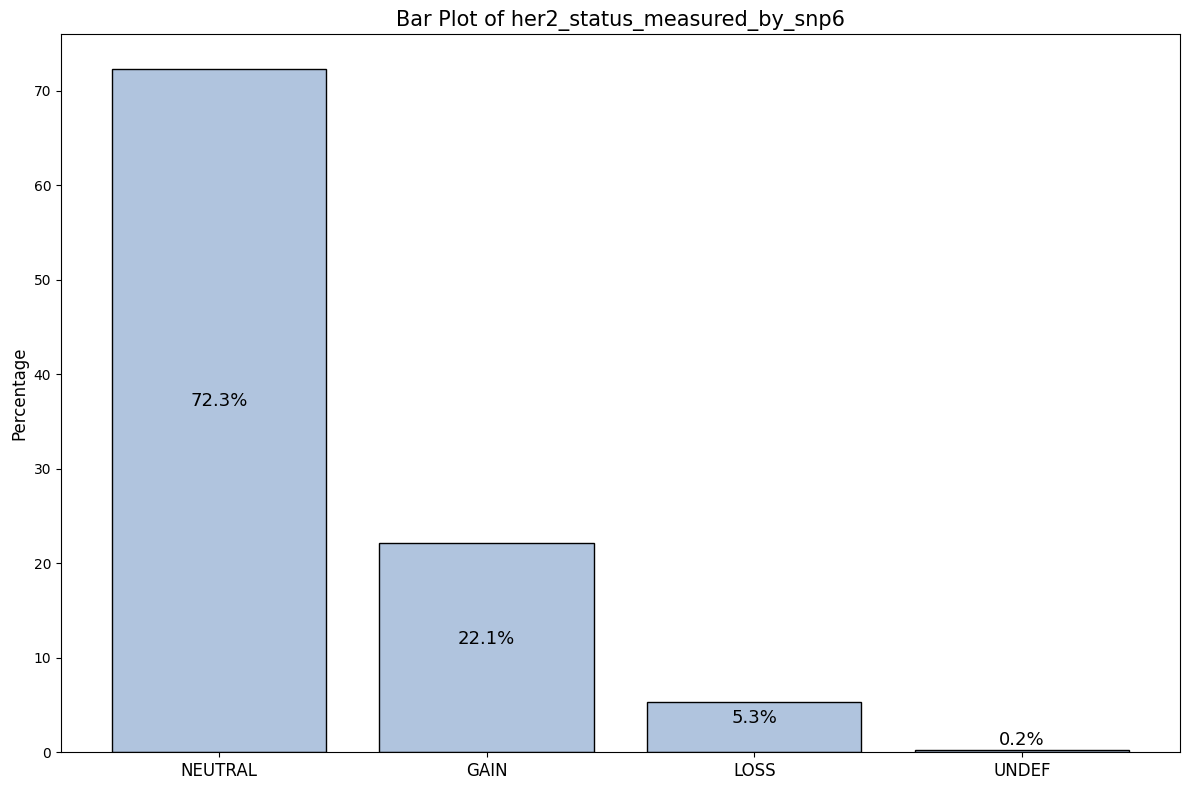

In [73]:
plot_category_bar(metabric_data[col], 13)

In [74]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 544)

#### 'her2_status'

La variable 'her2_status' indica si el cáncer es positivo o negativo para la amplificación/sobreexpresión de HER2.

La variable toma dos valores:

* Positivo: Indica la presencia de amplificación o sobreexpresión de HER2 en las células cancerosas.
Generalmente sugiere un cáncer más agresivo, pero también uno que podría responder bien a las terapias dirigidas a HER2.
* Negativo: Indica la ausencia de amplificación o sobreexpresión significativa de HER2.
Esta clasificación suele implicar que el cáncer tiene menos probabilidades de beneficiarse de tratamientos específicos para HER2

Evaluando los valores obtenidos vemos que el 12,5 % de los casos son positivos.

In [75]:
col = metabrics_categorical_col[12]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna her2_status no contiene valores nulos ni NA.


In [76]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Negative,1603,87.5
1,Positive,229,12.5


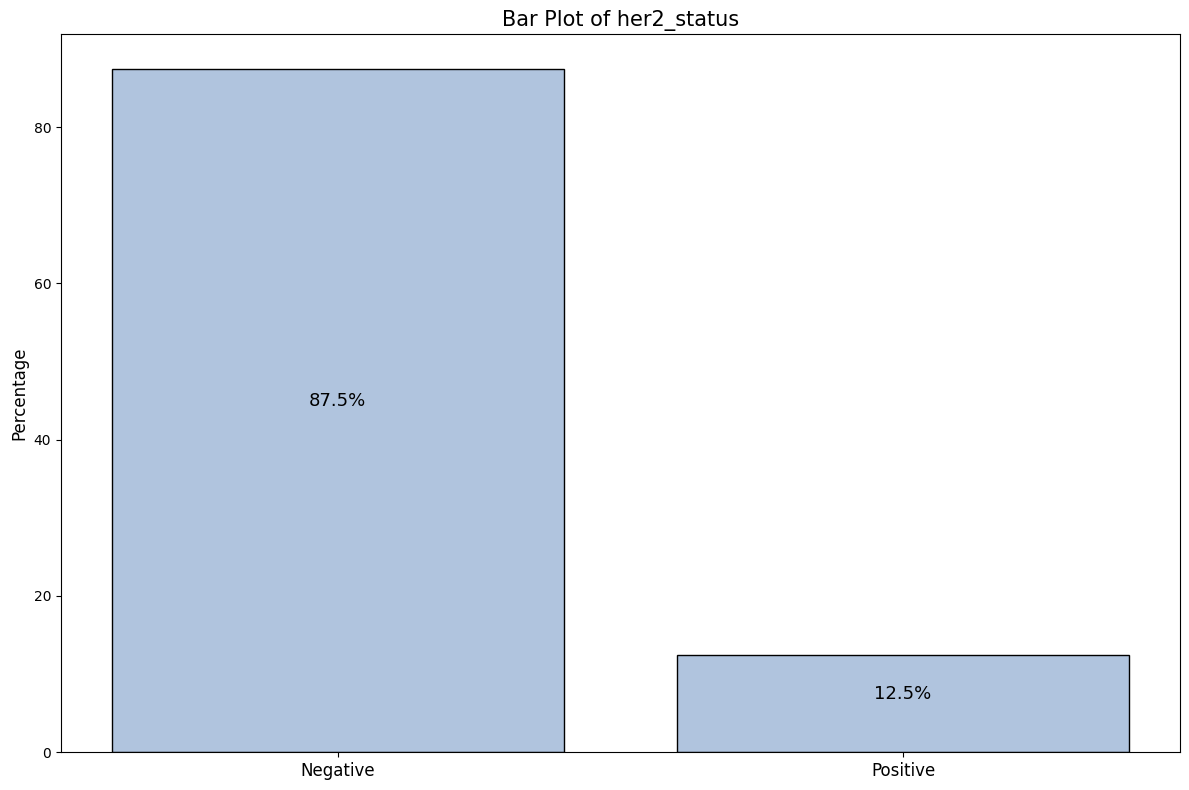

In [77]:
plot_category_bar(metabric_data[col], 13)

In [78]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 545)

#### 'tumor_other_histologic_subtype'

La variable 'tumor_other_histologic_subtype' muestra la distribución de casos por subtipo histológico adicional del tumor.
El subtipo más común es "Ductal/NST" (No Special Type) con 1406 registros, representando aproximadamente el 77% de los casos.
Le siguen en frecuencia "Mixed" (199 registros, 11%), "Lobular" (132 registros, 7.2%), "Medullary" (25 registros, 1.36%), "Mucinous" y "Tubular/cribriform" (21 registros, 1.15%)

Esta variable tiene 15 registros sin identificar, en este caso también utilizaremos la estrategia de imputación basada en la proporción de frecuencia de los subtipos conocidos para imputar los valores. Esto significa que los subtipos más comunes tendrán una mayor probabilidad de ser seleccionados como valores imputados, mientras que los subtipos menos comunes tendrán una menor probabilidad, reflejando así la distribución observada en los datos.


In [79]:
col = metabrics_categorical_col[13]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_other_histologic_subtype contiene 14 valores nulos o NA.


In [80]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Ductal/NST,1406,76.75
1,Mixed,199,10.86
2,Lobular,132,7.21
3,Medullary,25,1.36
4,Tubular/ cribriform,21,1.15
5,Mucinous,21,1.15
6,Other,14,0.76
7,NaN,14,0.76


In [81]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Ductal/NST,1414,77.18
1,Mixed,201,10.97
2,Lobular,134,7.31
3,Medullary,26,1.42
4,Mucinous,22,1.20
5,Tubular/ cribriform,21,1.15
6,Other,14,0.76


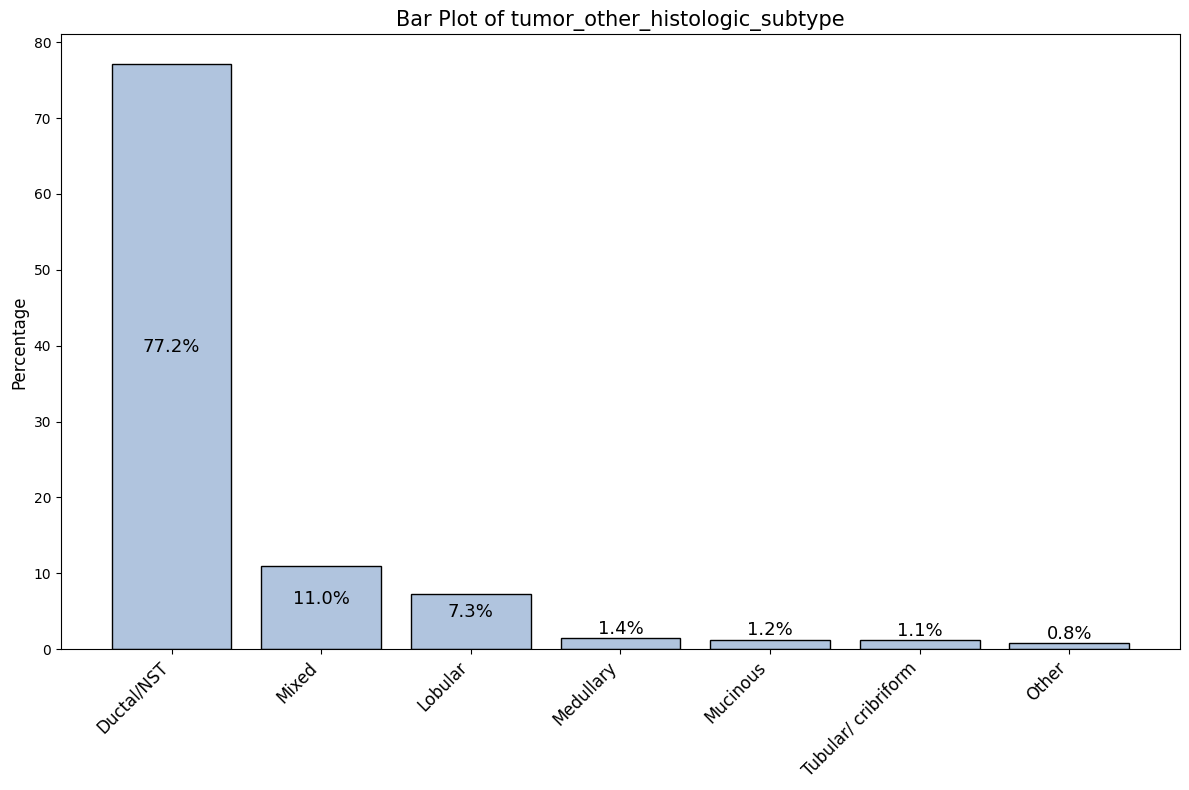

In [82]:
plot_category_bar(metabric_data[col], 13)

In [83]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 551)

#### 'inferred_menopausal_state'

El 77% de los casos de este conjunto de datos son pacientes post menopaucicas.

In [84]:
col = metabrics_categorical_col[14]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna inferred_menopausal_state no contiene valores nulos ni NA.


In [85]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Post,1427,77.89
1,Pre,405,22.11


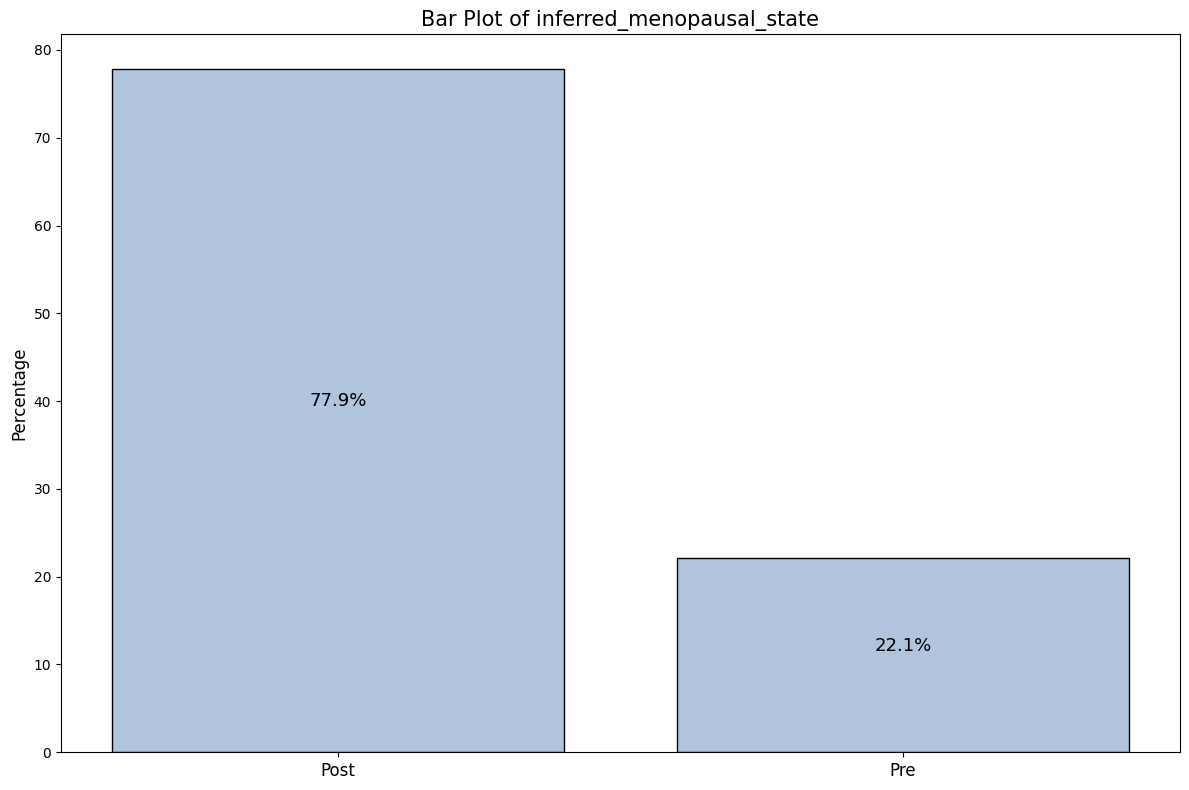

In [86]:
plot_category_bar(metabric_data[col], 13)

In [87]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 552)

#### 'integrative_cluster'

La variable 'integrative_cluster' representa el subtipo molecular del cáncer basado en la expresión de algunos genes.
Los valores que toma la variable corresponden a diferentes subtipos identificados mediante un análisis de agrupamiento integrativo que combina información de la expresión de múltiples genes para identificar grupos de tumores con características similares.

In [88]:
col = metabrics_categorical_col[15]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna integrative_cluster no contiene valores nulos ni NA.


In [89]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,8,271,14.79
1,3,268,14.63
2,4ER+,233,12.72
3,10,218,11.90
4,5,180,9.83
5,7,176,9.61
6,9,136,7.42
7,1,129,7.04
8,6,81,4.42
9,4ER-,70,3.82


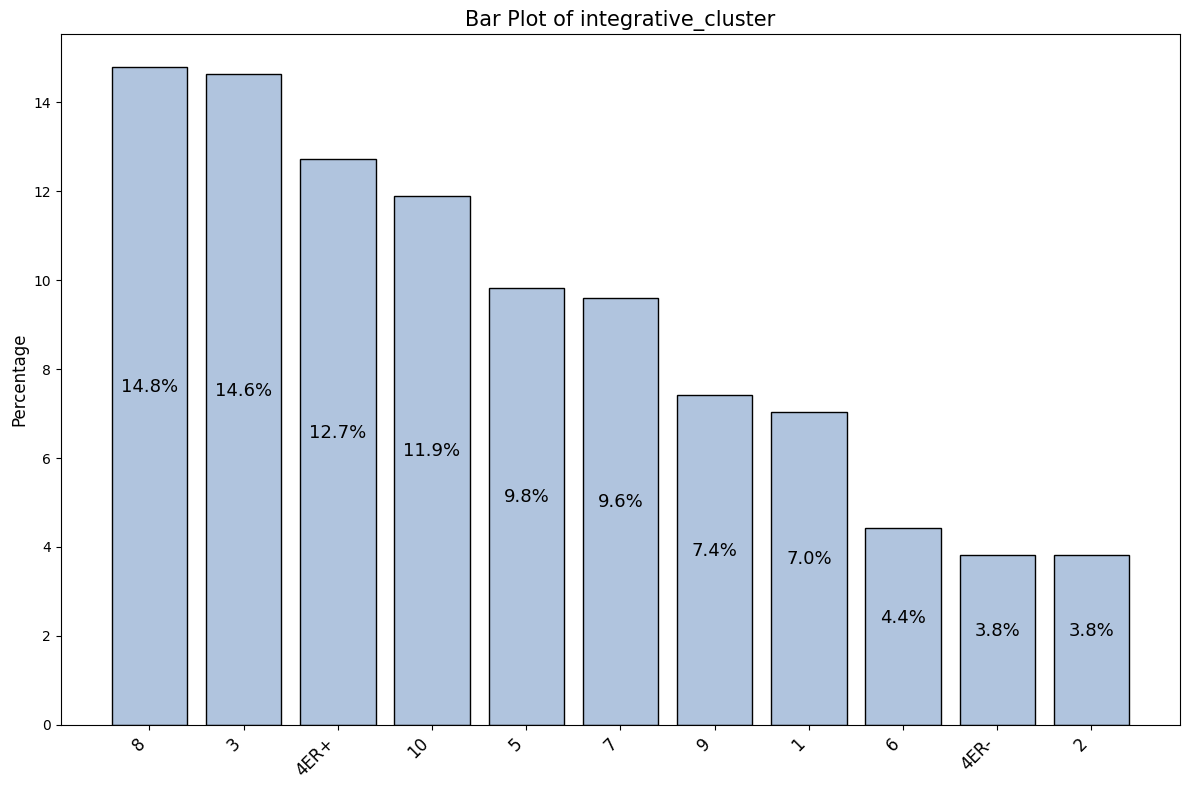

In [90]:
plot_category_bar(metabric_data[col], 13)

In [91]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 562)

#### 'primary_tumor_laterality'

La variable 'primary_tumor_laterality' indica cuál de las mamas está involucrada. Vemos que en el dataset aproximadamente la mitad de los casos involucran la mama izquierda y un 45% a la derecha.
Esta variable contiene aproximadamente 6% (106 casos) de valores faltantes. Los imputaremos con la estrategia de proporción de valores conocidos.

In [92]:
col = metabrics_categorical_col[16]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna primary_tumor_laterality contiene 103 valores nulos o NA.


In [93]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Left,894,48.80
1,Right,835,45.58
2,NaN,103,5.62


In [94]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Left,950,51.86
1,Right,882,48.14


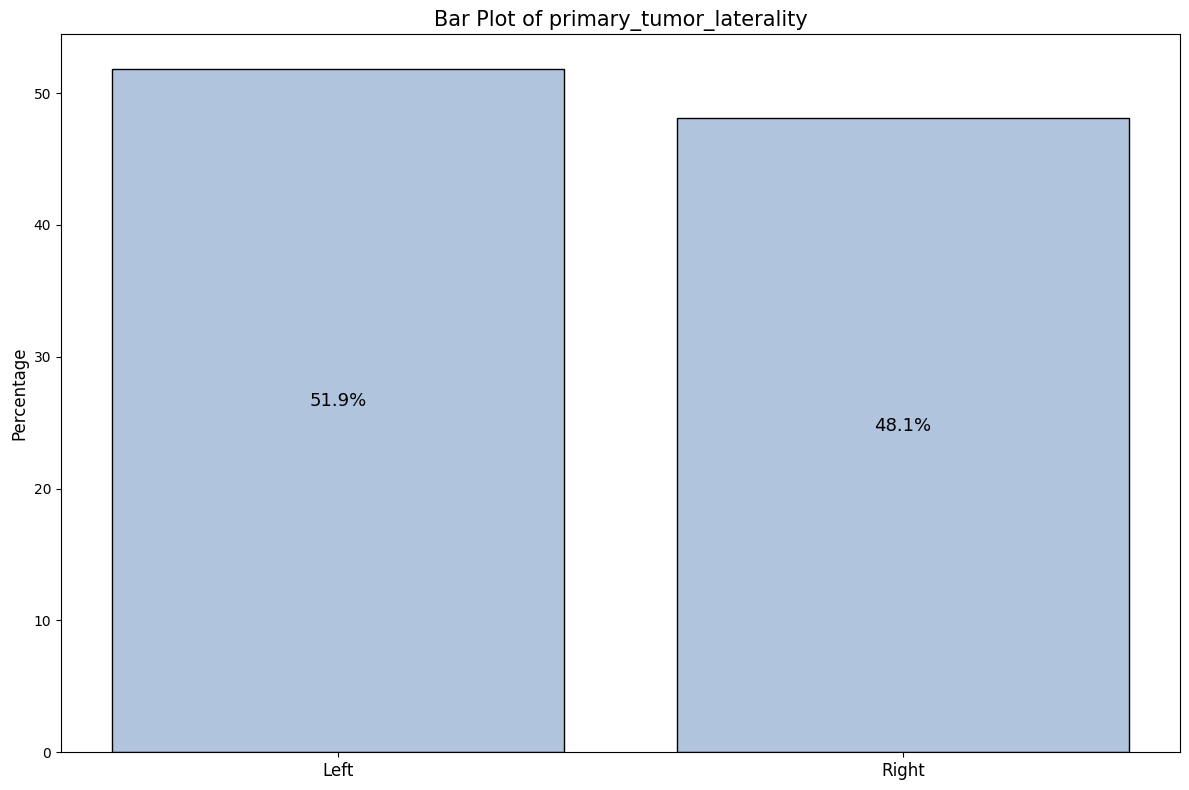

In [95]:
plot_category_bar(metabric_data[col], 13)

In [96]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 563)

#### 'oncotree_code'

La variable 'oncotree_code' representa el código de diagnóstico del tipo de cáncer según la ontología OncoTree.
OncoTree es un sistema de clasificación de código abierto creado por el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar los diagnósticos de tipos de cáncer desde una perspectiva clínica. A cada diagnóstico se le asigna un código OncoTree único para garantizar la coherencia y la facilidad de uso en la investigación y la atención médica.

Analizando la distribución de esta variable, IDC (Carcinoma Ductal Invasivo) es el tipo más común de cáncer de mama. Representa el 79.26% de los casos en el conjunto de datos.
En frecuencia le sigue MDLC (Carcinoma Ductal y Lobular Mixto), este tipo de cáncer de mama involucra tanto el carcinoma ductal como el carcinoma lobular.
Constituye aproximadament el 10.86% de los casos. Luego, el ILC (Carcinoma Lobular Invasivo), representa aproximadamente el 7.21% de los casos. Y por último, el IMMC (Carcinoma Mucinoso Mixto), constituye aproximadamente el 1.15% de los casos.

La categoría BREAST, que representa el 0.76% de los datos, entiendo que no es un diagnóstico específico de cáncer de mama, sino una clasificación general que parece ser un agrupamiento de diferentes subtipos de cáncer de mama. 
También vemos que hay 14 registros vacíos, imputaremos estos valores faltantes de manera proporcional a la frecuencia de los tipos de cáncer conocidos.

In [97]:
col = metabrics_categorical_col[17]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna oncotree_code contiene 14 valores nulos o NA.


In [98]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,IDC,1452,79.26
1,MDLC,199,10.86
2,ILC,132,7.21
3,IMMC,21,1.15
4,BREAST,14,0.76
5,NaN,14,0.76


In [99]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,IDC,1465,79.97
1,MDLC,200,10.92
2,ILC,132,7.21
3,IMMC,21,1.15
4,BREAST,14,0.76


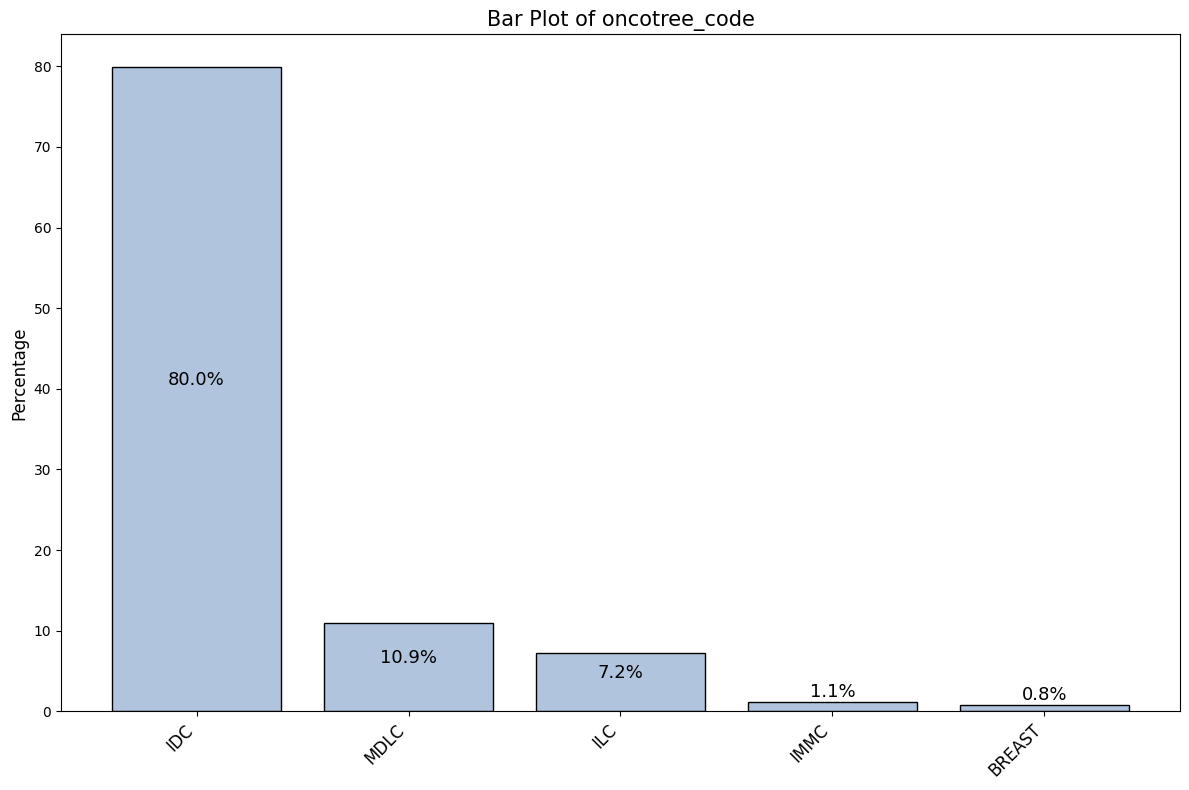

In [100]:
 plot_category_bar(metabric_data[col], 13)

In [101]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 567)

#### 'pr_status'

La variable 'pr_status' indica si las células cancerígenas son positivas o negativas para los receptores de progesterona. Los receptores de progesterona son proteínas en la superficie de las células cancerosas que pueden unirse a la hormona progesterona. La presencia o ausencia de estos receptores puede ser relevante para determinar el pronóstico del cáncer y para guiar el tratamiento.


In [102]:
col = metabrics_categorical_col[18]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna pr_status no contiene valores nulos ni NA.


In [103]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positive,959,52.35
1,Negative,873,47.65


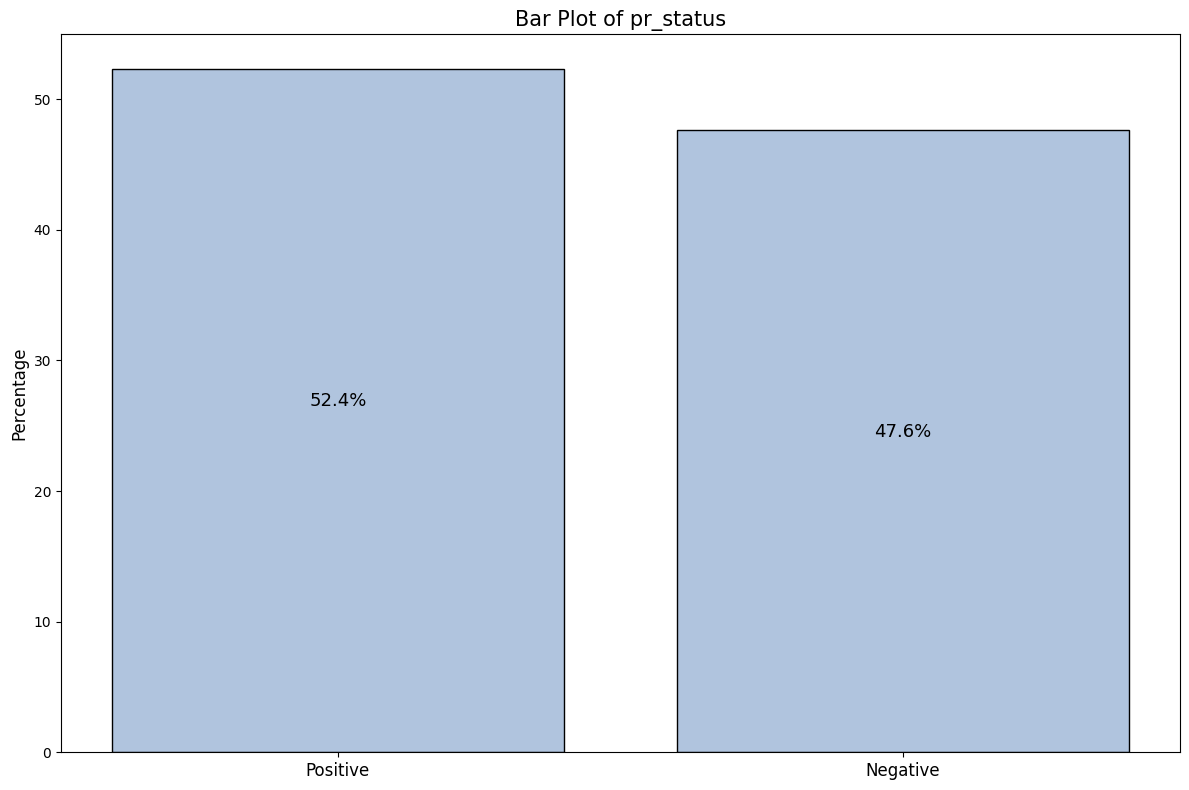

In [104]:
 plot_category_bar(metabric_data[col], 13)

In [105]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 568)

#### '3.gene_classifier_subtype'


La variable '3-gene_classifier_subtype' clasifica los tumores de cáncer de mama según los niveles de expresión de tres genes: receptor de estrógeno (ER), receptor de progesterona (RP) y HER2:

* ER (receptor de estrógeno): Algunos cánceres de mama dependen del estrógeno para crecer. Si un tumor es ER positivo, significa que las células cancerosas tienen receptores de estrógeno y pueden responder a la terapia hormonal.
* RP (receptor de progesterona): Similar al ER, los tumores RP positivos pueden beneficiarse de la terapia hormonal.
* HER2: Este gen es responsable de la producción de una proteína que puede promover el crecimiento de las células cancerosas. Los tumores HER2 positivos tienden a ser más agresivos.

En cuanto a la distriución de los datos en el dataset:
- ER+/HER2- Low Prolif (584 casos): Estos tumores son RE positivos y HER2 negativos, con una tasa de proliferación baja (lo que significa que las células cancerosas se dividen lentamente). Esto podría indicar un pronóstico más favorable.
- ER+/HER2- High Prolif (582 casos): Similar a la categoría anterior, pero con una tasa de proliferación alta, lo que sugiere un curso potencialmente más agresivo.
- ER-/HER2- (286 casos): Estos tumores son RE negativos y HER2 negativos. Es posible que no respondan a la terapia hormonal, pero podrían ser candidatas a otras opciones de tratamiento.
- HER2+ (185 casos): Estos tumores son HER2 positivos, lo que indica potencial para un cáncer más agresivo y la posibilidad de beneficiarse de terapias dirigidas a HER2.
- Valores nulos (195 casos): Imputaremos los valores faltantes proporcionalmente a la distribución de los subtipos existentes.


In [106]:
col = metabrics_categorical_col[19]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna 3-gene_classifier_subtype contiene 195 valores nulos o NA.


In [107]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,ER+/HER2- Low Prolif,584,31.88
1,ER+/HER2- High Prolif,582,31.77
2,ER-/HER2-,286,15.61
3,NaN,195,10.64
4,HER2+,185,10.10


In [108]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,ER+/HER2- Low Prolif,657,35.86
1,ER+/HER2- High Prolif,642,35.04
2,ER-/HER2-,323,17.63
3,HER2+,210,11.46


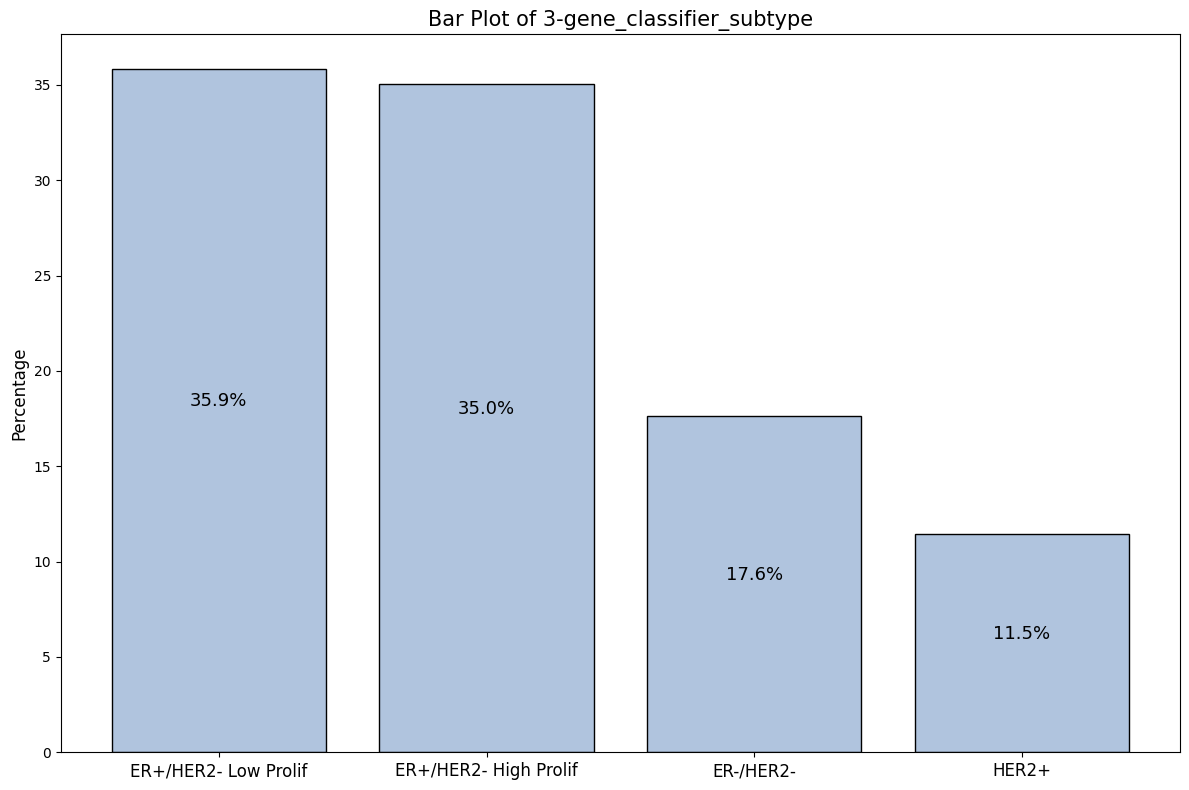

In [109]:
 plot_category_bar(metabric_data[col], 13)

In [110]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 571)

#### 'overall_survival'

La variable 'overall_survival' representa si el paciente está vivo o muerto al final del período de estudio. Los resultados muestran que el 57.48% de los pacientes están clasificados como '0', lo que indica que están muertos, mientras que el 42.52% están clasificados como '1', lo que significa que al momento de tomar los datos estaban vivos. Esto indica una distribución relativamente equilibrada entre pacientes vivos y fallecidos en el conjunto de datos.

In [111]:
col = metabrics_categorical_col[20]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna overall_survival no contiene valores nulos ni NA.


In [112]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,0,1053,57.48
1,1,779,42.52


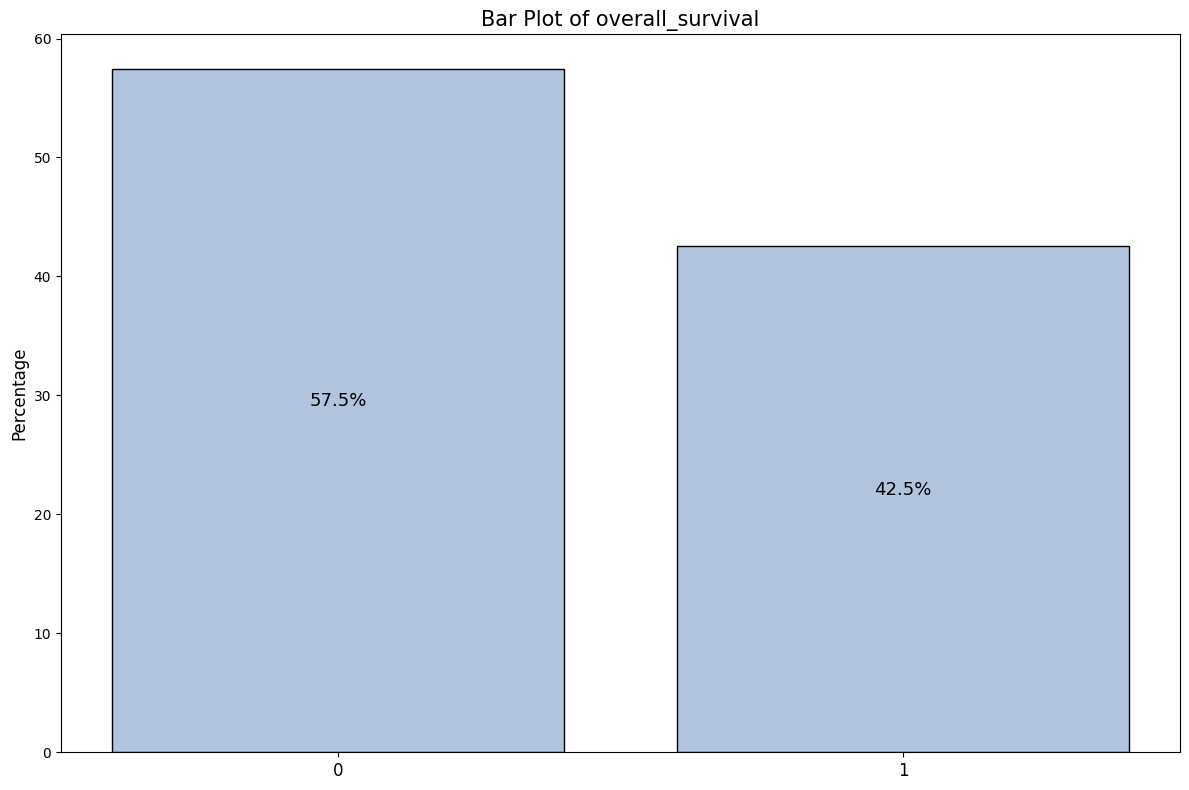

In [113]:
 plot_category_bar(metabric_data[col], 13)

In [114]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 572)

#### 'death_from_cancer'

La variable "death_from_cancer" describe si los pacientes murieron a causa del cáncer, de otras enfermedades o si aún están vivos. Según los datos proporcionados, el 42.52% de los pacientes están vivos, mientras que el 33.08% murió a causa de la enfermedad. Además, el 24.34% de los pacientes fallecieron por otras causas distintas al cáncer, y hay un pequeño porcentaje de pacientes (0.05%) que no están clasificados claramente en ninguna de estas categorías, imputaremos estos valores utilizando la estrategia de proporción. 

In [115]:
col = metabrics_categorical_col[21]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna death_from_cancer contiene 1 valores nulos o NA.


In [116]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Living,779,42.52
1,Died of Disease,606,33.08
2,Died of Other Causes,446,24.34
3,NaN,1,0.05


In [117]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Living,780,42.58
1,Died of Disease,606,33.08
2,Died of Other Causes,446,24.34


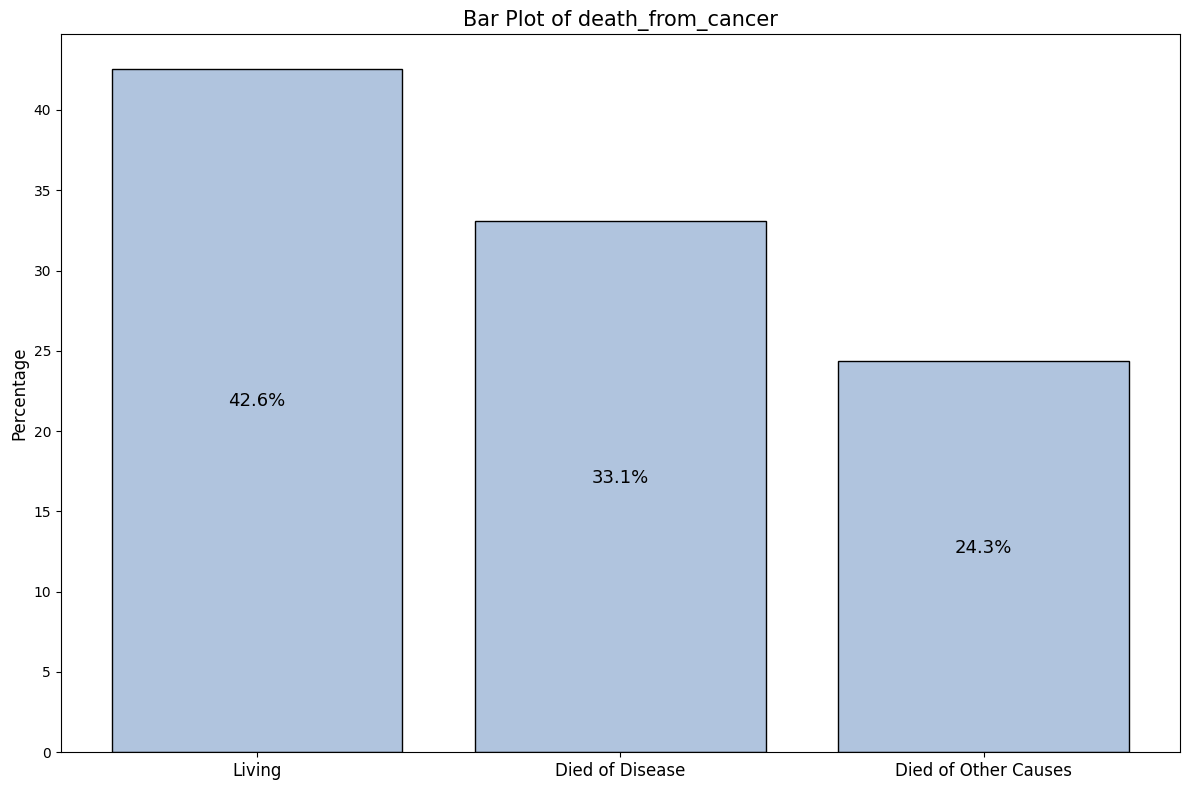

In [118]:
 plot_category_bar(metabric_data[col], 13)

In [119]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 574)

#### 'cohort'

In [120]:
col = metabrics_categorical_col[22]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cohort no contiene valores nulos ni NA.


In [121]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,3.0,689,37.61
1,1.0,467,25.49
2,2.0,283,15.45
3,4.0,227,12.39
4,5.0,166,9.06


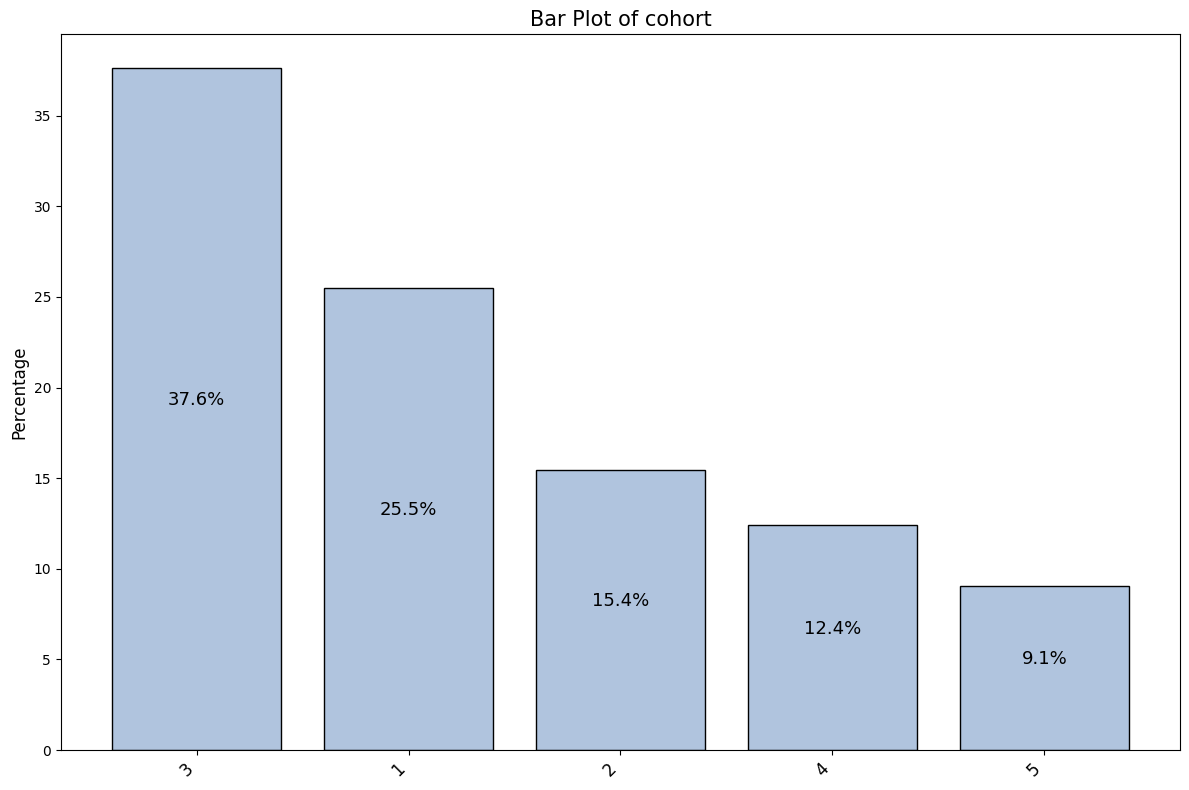

In [122]:
 plot_category_bar(metabric_data[col], 13)

In [123]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 578)

In [124]:
#Elimino la columna patient_id ya que no añade informacion adicional:
metabric_data.drop(columns=['patient_id'], inplace=True)

In [125]:
metabric_data.head()

,age_at_diagnosis,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,brca1,brca2,...,overall_survival_0,overall_survival_1,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,cohort_1.0,cohort_2.0,cohort_3.0,cohort_4.0,cohort_5.0
0,1.122359,3.0,1.960788,-0.169839,1.757557,0.201518,-0.278813,0.333732,-1.3990,-0.5738,...,False,True,False,False,True,True,False,False,False,False
1,-1.379317,3.0,-0.490841,-0.917810,-0.011378,-0.530544,-1.074529,-1.481770,-1.3800,0.2777,...,False,True,False,False,True,True,False,False,False,False
2,-0.941562,2.0,-0.245678,-0.917810,-0.002638,0.505525,-0.742981,0.333732,0.0670,-0.8426,...,True,False,True,False,False,True,False,False,False,False
3,-1.033275,2.0,0.244648,-1.167134,0.014841,0.521686,-0.079884,0.333732,0.6744,-0.5428,...,False,True,False,False,True,True,False,False,False,False
4,1.224091,3.0,1.470462,-0.917810,1.789021,-1.097499,0.914762,0.333732,1.2932,-0.9039,...,True,False,True,False,False,True,False,False,False,False


In [126]:
print(metabric_data.iloc[:, :15].dtypes)


age_at_diagnosis                 float64
neoplasm_histologic_grade        float64
lymph_nodes_examined_positive    float64
mutation_count                   float64
nottingham_prognostic_index      float64
overall_survival_months          float64
tumor_size                       float64
tumor_stage                      float64
brca1                            float64
brca2                            float64
palb2                            float64
pten                             float64
tp53                             float64
atm                              float64
cdh1                             float64
dtype: object


### Matriz de correlación:

In [127]:
metabrics_numeric_col_matrix = ['neoplasm_histologic_grade', 'age_at_diagnosis', 'lymph_nodes_examined_positive', 'nottingham_prognostic_index', 'overall_survival_months', 'mutation_count', 'tumor_size', 'tumor_stage']
numeric_data = metabric_data[metabrics_numeric_col_matrix]

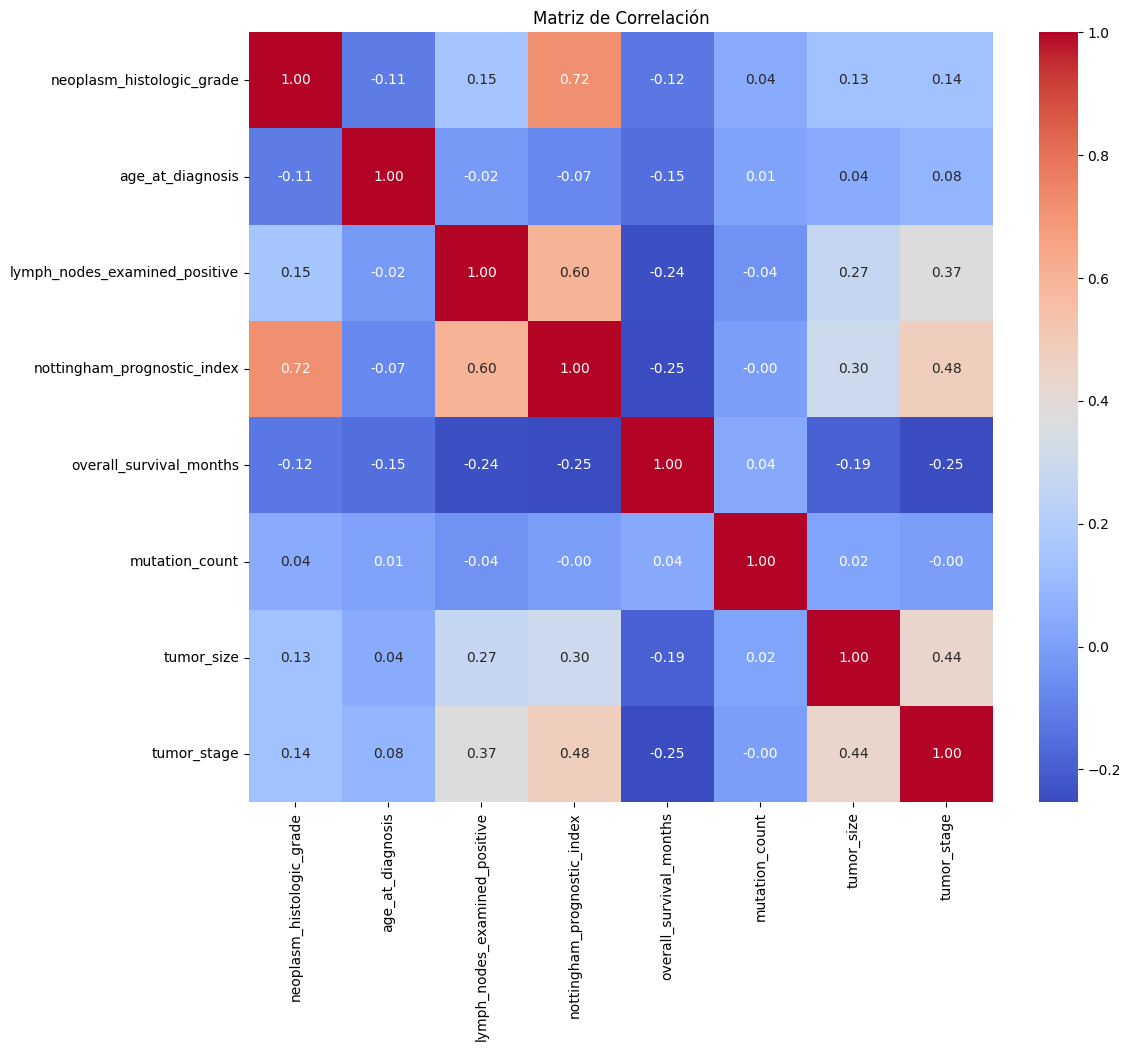

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade título
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


Analizando la matriz de correlación vemos que la correlación positiva más fuerte, de 0.72, se da entre las variables neoplasm_histologic_grade y nottingham_prognostic_index.
Es posible que las características histológicas de un neoplasma estén estrechamente relacionadas con su pronóstico. El "neoplasm_histologic_grade" describe el grado de diferenciación de las células cancerosas, mientras que el "nottingham_prognostic_index" es un índice pronóstico utilizado para predecir el resultado clínico en pacientes con cáncer de mama. Es probable que haya una relación biológica intrínseca entre la agresividad del tumor (reflejada en el grado histológico) y su pronóstico futuro.

La siguiente correlación positiva alta, de 0.6, se da entre las variables nottingham_prognostic_index y lymph_nodes_examined_positive. Esto puede deberse a que cuanto mayor sea el "nottingham_prognostic_index", que incorpora múltiples factores pronósticos, mayor sea la carga de ganglios linfáticos positivos, lo que sugiere una mayor progresión del cáncer.

Por último, la siguiente correlación positiva, de 0.48, la vemos entre las variables nottingham_prognostic_index y tumor_stage. Es probable que a medida que aumenta la gravedad del cáncer (reflejada en el estadio del tumor), también aumente el índice pronóstico de Nottingham.

### Test estadísticos:

#### Test Chi Cuadrado

El test de chi-cuadrado se utiliza para evaluar la independencia entre dos variables categóricas. En este caso, la hipótesis nula (H0) establece que no hay asociación significativa entre las dos variables, lo que significa que son independientes entre sí. Por otro lado, la hipótesis alternativa (H1) sugiere que existe una asociación significativa entre las dos variables, lo que significa que no son independientes y que la ocurrencia de una variable está relacionada con la ocurrencia de la otra.

Cuando realizamos un test de chi-cuadrado, calculamos un valor p que nos indica la probabilidad de observar una asociación tan fuerte o más extrema entre las dos variables si la hipótesis nula fuera verdadera. Si el valor p es menor que nuestro nivel de significancia (generalmente 0.05), rechazamos la hipótesis nula y concluimos que hay evidencia suficiente para sugerir que hay una asociación significativa entre las dos variables.

En resumen, al aplicar el test de chi-cuadrado, estamos evaluando si hay suficiente evidencia para rechazar la idea de que las dos variables son independientes y, en su lugar, sugerimos que existe una relación significativa entre ellas.

In [129]:
metabrics_categorical_col = ("type_of_breast_surgery","cancer_type","cancer_type_detailed", "cellularity", "neoplasm_histologic_grade"
,"chemotherapy","hormone_therapy","radio_therapy",  "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc"
,"er_status","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype",
"inferred_menopausal_state","integrative_cluster","primary_tumor_laterality" ,"oncotree_code", "pr_status", 
"3-gene_classifier_subtype" ,"overall_survival", "death_from_cancer", "cohort")

In [130]:
from scipy.stats import chi2_contingency

# Variable objetivo
target_variable = 'neoplasm_histologic_grade'

# Itera sobre cada variable categórica
for categorical_var in metabrics_categorical_col:
    # Crea una tabla de contingencia
    contingency_table = pd.crosstab(full_metabric_data[categorical_var], full_metabric_data[target_variable])
    
    # Aplica el test de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Imprime los resultados
    print(f'Variable categórica: {categorical_var}')
    print(f'Valor p del test de chi-cuadrado: {p}')
    if p < 0.05:
        print('Hay una asociación significativa entre la variable categórica y la variable objetivo.')
    else:
        print('No hay una asociación significativa entre la variable categórica y la variable objetivo.')
    print('\n')


Variable categórica: type_of_breast_surgery
Valor p del test de chi-cuadrado: 0.11946623352766698
No hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cancer_type
Valor p del test de chi-cuadrado: 1.0
No hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cancer_type_detailed
Valor p del test de chi-cuadrado: 3.845866233848849e-18
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cellularity
Valor p del test de chi-cuadrado: 0.005529934664602969
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: neoplasm_histologic_grade
Valor p del test de chi-cuadrado: 0.0
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: chemotherapy
Valor p del test de chi-cuadrado: 6.109548527703652e-37
Hay una asociación signi

Analizando los resultados obtenidos para el primer grupo de variables, que incluye type_of_breast_surgery y cancer_type, los resultados obtenidos indican que no hay una asociación significativa entre estas variables categóricas y la variable objetivo. Esto implica que no tenemos suficiente evidencia para rechazar la hipótesis nula de independencia entre estas variables y la variable objetivo.

Por otro lado, para el segundo grupo de variables que incluye cancer_type_detailed, cellularity, neoplasm_histologic_grade, chemotherapy, hormone_therapy, radio_therapy, pam50_+_claudin-low_subtype, er_status_measured_by_ihc, er_status, her2_status_measured_by_snp6, her2_status, tumor_other_histologic_subtype, inferred_menopausal_state, integrative_cluster, oncotree_code, pr_status, 3-gene_classifier_subtype, overall_survival, death_from_cancer, y cohort, los resultados muestran que hay una asociación significativa entre estas variables categóricas y la variable objetivo. Por lo tanto, tenemos evidencia suficiente para rechazar la hipótesis nula en estos casos, lo que sugiere que estas variables están relacionadas de manera significativa con la variable objetivo en nuestro conjunto de datos.

#### Analysis of Variance: Anova

Como paso previo al desarrollo de los modelos de machine learning para la clasificación de las muestras según su grado histológico, se realizó un análisis de varianza (ANOVA) para identificar los genes cuya expresión varía significativamente entre los diferentes grados histológicos de los tumores de mama. Este análisis preliminar tiene como objetivo destacar los genes que podrían ser más relevantes para la clasificación, reduciendo así la dimensionalidad de los datos y mejorando la eficiencia de los modelos de redes neuronales.

Primero, divideremos los datos de expresión génica en subconjuntos basados en los diferentes grados histológicos presentes en la variable 'neoplasm_histologic_grade'. Luego, para cada gen, se aplicará la prueba ANOVA, que compara la varianza de la expresión génica entre los distintos grados histológicos. Los resultados de la prueba incluyen el estadístico F y el valor p para cada gen, permitiendo identificar aquellos genes con diferencias de expresión significativas entre los grados histológicos. Al filtrar los genes con valores p menores a un umbral predefinido (en este caso: 0.05), se seleccionarán los genes más relevantes. Este enfoque permite reducir la dimensionalidad de los datos, mejorando la eficiencia y la interpretabilidad de los modelos de machine learning que se desarrollarán posteriormente. La identificación preliminar de genes relevantes mediante ANOVA proporciona una base sólida para validar y comparar los resultados obtenidos con las redes neuronales, asegurando una mayor robustez y consistencia en los hallazgos del estudio.

In [131]:
from scipy.stats import f_oneway

expression_data = metabric_data.iloc[:,9:497]  # Columns with gene expression information
target_variable = metabric_data['neoplasm_histologic_grade']

# Dividir los datos de expresión génica según los diferentes grados histológicos
grades = target_variable.unique()
expression_data_by_grade = {grade: expression_data[target_variable == grade] for grade in grades}

# Realizar ANOVA para cada gen
anova_results = {}
for gene in expression_data.columns:
    samples = [expression_data_by_grade[grade][gene].dropna() for grade in grades]
    anova_results[gene] = f_oneway(*samples)

# Convertir los resultados de ANOVA a un DataFrame
anova_results_df = pd.DataFrame({
    'gene': anova_results.keys(),
    'F-statistic': [result.statistic for result in anova_results.values()],
    'p-value': [result.pvalue for result in anova_results.values()]
})

# Filtrar genes con p-value significativo (p < 0.05)
significant_genes = anova_results_df[anova_results_df['p-value'] < 0.05]

# Mostrar los resultados
significant_genes.head(10)

,gene,F-statistic,p-value
0,brca2,5.104909,6.153625e-03
2,pten,69.914642,5.510138e-30
5,cdh1,7.968603,3.583196e-04
6,chek2,90.470007,3.415798e-38
8,nf1,3.099930,4.528917e-02
10,bard1,37.450584,1.147175e-16
11,mlh1,26.970174,2.860210e-12
12,msh2,11.476324,1.114064e-05
13,msh6,109.882873,8.604413e-46
15,epcam,14.914701,3.757338e-07


#### Boxplot

Los gráficos que se muestran a continuación presentan la mediana y la dispersión de la expresión génica para cada uno de los genes más relevantes, separados por grado histológico. Además de la mediana, muestran los cuartiles que representan la variabilidad de los datos, junto con los posibles valores atípicos.

Cuando el promedio de expresión génica es positivo, significa que la expresión de ese gen en el tumor es mayor que la expresión promedio en la población de referencia. Esto sugiere que el gen está "sobreexpresado" en el tumor en comparación con la población de referencia.

Por otro lado, cuando el promedio de expresión génica es negativo, significa que la expresión de ese gen en el tumor es menor que la expresión promedio en la población de referencia. Esto sugiere que el gen está "subexpresado" en el tumor en comparación con la población de referencia.

En resumen, un promedio de expresión positivo indica una sobreexpresión del gen en el tumor, mientras que un promedio de expresión negativo indica una subexpresión del gen en el tumor en comparación con la población de referencia.

Al observar estos gráficos, se nota una tendencia general en la que la mediana de la expresión génica para el grado histológico 3 tiende a ser más alta que la del grado 2, y a su vez, la del grado 2 es mayor que la del grado 1. Esta tendencia sugiere una posible relación entre el grado histológico del tumor y la expresión de estos genes específicos. Sin embargo, es interesante notar que esta relación no es consistente para todos los genes.

De manera notable, se puede ver que para los genes APH1B, GATA3 y MAPT hay una inversión en la tendencia mencionada anteriormente. En lugar de aumentar con el grado histológico, la mediana de la expresión génica parece disminuir o mantenerse constante. Esta observación sugiere que estos genes pueden desempeñar un papel diferente en el contexto del grado histológico del tumor, lo que podría ser relevante para comprender mejor su progresión y características biológicas.

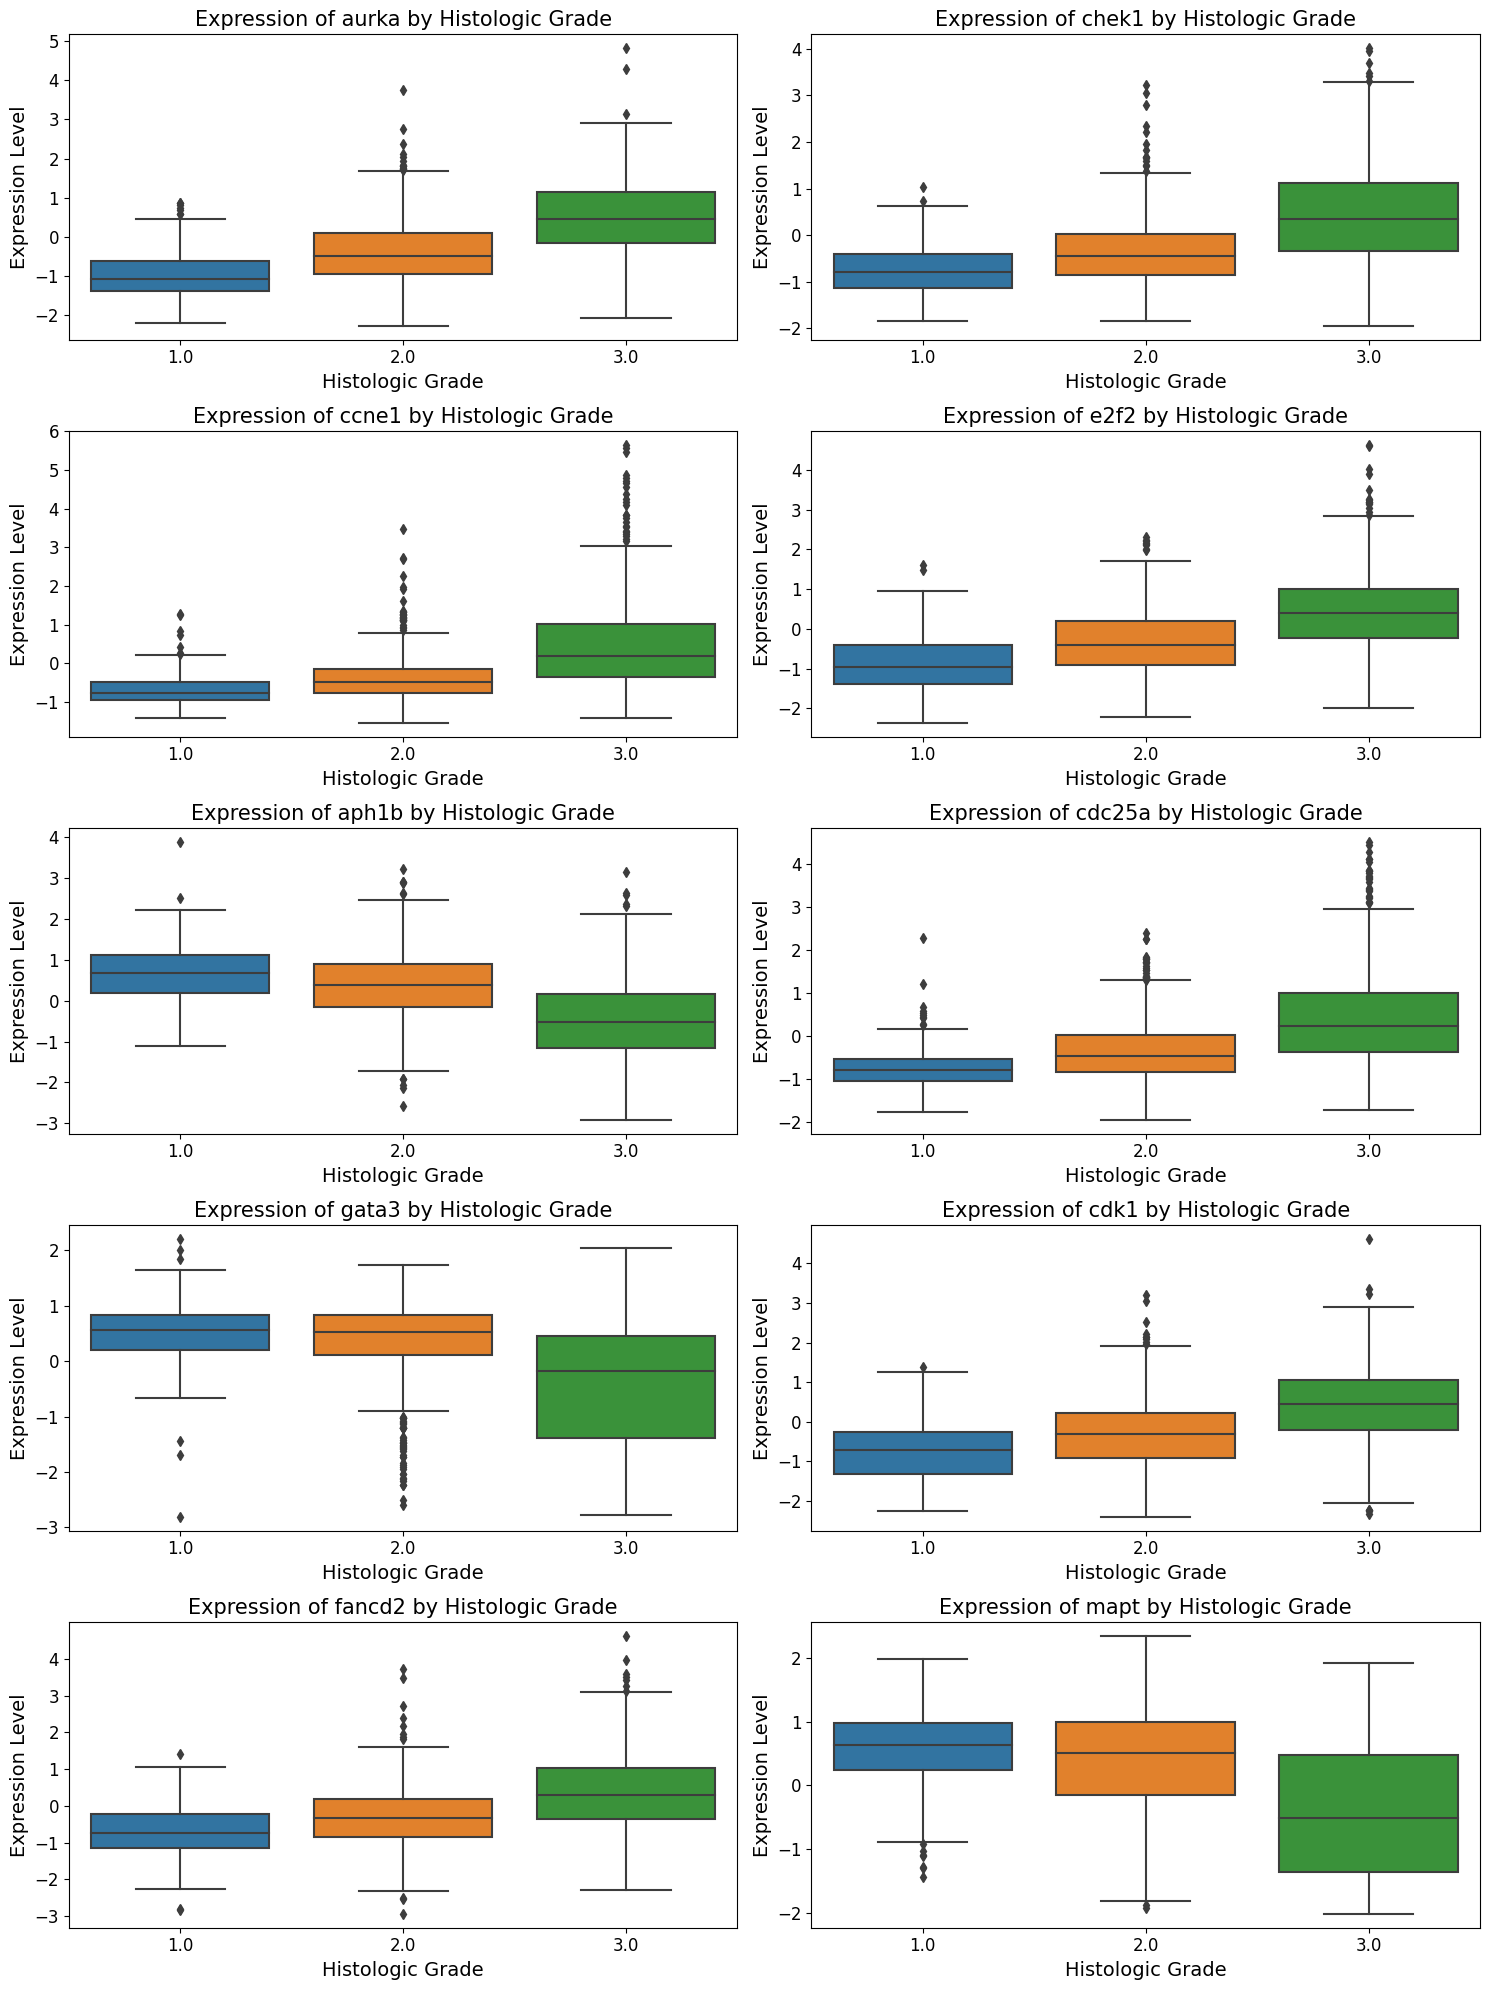

In [132]:
# Seleccionar los 10 genes más significativos
top_10_genes = significant_genes.nsmallest(10, 'p-value')['gene'].tolist()

# Crear un DataFrame para los 10 genes más significativos
top_10_expression_data = expression_data[top_10_genes].copy()
top_10_expression_data['Histologic Grade'] = target_variable

# Crear boxplots para los 10 genes más significativos
plt.figure(figsize=(15, 20))
for i, gene in enumerate(top_10_genes):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='Histologic Grade', y=gene, data=top_10_expression_data)
    plt.title(f'Expression of {gene} by Histologic Grade', fontsize=15)
    plt.xlabel('Histologic Grade', fontsize=14)  
    plt.ylabel('Expression Level', fontsize=14) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

**Eliminamos los genes que han quedado fuera del listado de más relevantes del dataset**

In [133]:
# Lista con los genes excluidos
all_genes = expression_data.columns.tolist()
significant_genes_names = significant_genes['gene'].tolist()
genes_excluded = [gene for gene in all_genes if gene not in significant_genes_names]

In [134]:
# Eliminar los genes excluidos del dataset
metabric_data_all_genes = metabric_data.copy()
metabric_data= metabric_data.drop(columns=genes_excluded)

In [135]:
metabric_data.iloc[:,9:331]

,brca2,pten,cdh1,chek2,nf1,bard1,mlh1,msh2,msh6,epcam,...,serpini1,slc29a1,spry2,srd5a1,srd5a3,st7,tnk2,tulp4,ugt2b15,ugt2b17
0,-0.5738,1.4524,0.0348,0.1266,-0.8578,-1.1201,-0.4844,-0.7483,-1.6660,-0.3721,...,0.0052,0.9859,2.8796,-1.1877,-1.6345,-0.2142,-1.1741,-1.4779,-0.5954,-0.8847
1,0.2777,0.5296,1.3594,0.7961,-2.6059,0.4390,1.2266,0.7612,0.1821,0.5600,...,0.0222,-1.0821,0.2446,-0.4412,0.4068,0.7634,0.9121,-0.9538,-0.2264,0.5398
2,-0.8426,-0.3326,1.1398,0.4187,-1.1305,-0.1721,-1.7910,3.0955,0.6608,2.5553,...,-0.7735,-0.9122,0.4593,-0.5381,0.8344,1.7227,-3.7172,-1.5538,1.3701,-0.1078
3,-0.5428,0.6369,1.2491,-1.1889,-0.6165,-0.4010,-1.3905,4.8798,0.0615,4.1161,...,-0.2858,-1.0178,1.3361,-0.5630,0.8228,0.6819,-2.3286,-0.9924,-0.3154,0.2320
4,-0.9039,0.2168,0.9131,0.9356,-0.2940,0.6320,-0.3582,0.3032,0.8747,0.3349,...,-0.5545,0.5328,-0.3201,-0.5845,-1.0150,2.2961,-0.1572,0.0427,5.0048,3.8476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.5543,0.4572,-0.1323,0.2837,-0.5500,-0.4606,1.2184,0.3917,0.5056,-0.5513,...,-0.1667,-0.5485,0.6390,0.7859,1.1196,0.8116,-1.2644,-0.3566,-0.2615,-0.6371
1900,0.9128,0.7383,0.1243,2.2040,-0.8681,-0.4134,-0.2293,0.8918,1.1820,1.5948,...,0.1808,0.3414,-0.9980,-0.5294,-0.1610,0.2251,-0.3412,-1.0703,-0.6950,0.0641
1901,-0.2608,-0.2985,1.5486,1.5309,-0.2529,-0.1206,0.9955,0.7000,1.4286,1.2695,...,0.7616,0.1665,-1.1827,-0.1457,2.3968,0.5917,-1.3541,-1.8076,-0.1840,0.0967
1902,-1.7695,-0.3850,1.0956,-0.0948,-1.9467,-0.2744,1.0362,0.7980,0.6066,1.5507,...,0.3223,-0.1129,-0.7043,-0.6380,1.1070,0.2194,-0.6985,-0.6046,-0.4915,-0.2847


In [136]:
# Convertir todas las columnas no numéricas a numéricas
for column in metabric_data.columns:
    if metabric_data[column].dtype == bool:
        metabric_data[column] = metabric_data[column].astype(int)

#### Separamos los datos en los conjuntos de test y entrenamiento:

In [178]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN, Concatenate, LayerNormalization, MultiHeadAttention,  GlobalMaxPooling1D, Concatenate, Reshape
from keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Separamos las variables en X de la variable target y
X = metabric_data.drop(columns=['neoplasm_histologic_grade'])  
y = metabric_data['neoplasm_histologic_grade']  
y= y-1

# Separamos los datos en el conjunto de entrenamiento y de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=seed)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####  Modelos deep learning

#### Red Neuronal Convolucional:

El primer modelo que utilizaremos para predecir el grado histológico de los tumores de mama será una Red Neuronal Convolucional (CNN). Las Redes Neuronales Convolucionales son un tipo de arquitectura de redes neuronales diseñadas especialmente para procesar datos con una estructura espacial, como imágenes. Estas redes son capaces de aprender patrones jerárquicos de características mediante la aplicación de filtros convolucionales y la posterior agrupación de los resultados para obtener características de mayor nivel de abstracción. Aunque las CNN son ampliamente conocidas por su eficacia en tareas de visión por computadora, también se han aplicado con éxito en otros tipos de datos estructurados, como secuencias temporales y datos de series temporales. En el contexto de la expresión genética de tumores de mama, las CNN pueden utilizarse para identificar patrones espaciales complejos en los datos de expresión genética y capturar relaciones no lineales entre los genes para predecir el grado histológico de los tumores. Su capacidad para aprender representaciones jerárquicas de características las convierte en una buena opción para problemas donde la estructura espacial de los datos es relevante.

La arquitectura elegida consiste en dos capas convolucionales seguidas de capas de agrupación máxima, diseñadas para capturar patrones locales en los datos de expresión genética. Luego, se utiliza una capa de aplanado (flatten) para convertir las características extraídas en un vector unidimensional, seguida de capas densas para aprender representaciones más abstractas y realizar la clasificación final.

A continuación se detalla la configuración de las capas:

- Capa de entrada (Input): La forma de entrada es la forma de los datos, donde la longitud de la secuencia es la cantidad de genes y datos clínicos.
- Capa convolucional (Conv1D): Utilizamos 64 filtros con un tamaño de kernel de 5 en la primera capa convolucional para detectar patrones locales en los datos. La función de activación ReLU es utilizada para introducir no linealidades en la red.
- Capa de agrupación máxima (MaxPooling1D): Utilizamos una ventana de agrupación de tamaño 2 para reducir la dimensionalidad de la salida de la capa convolucional, manteniendo las características más importantes.
- Capa convolucional (Conv1D): En la segunda capa convolucional, utilizamos 128 filtros con un tamaño de kernel de 3 para extraer características más complejas de los datos.
- Capa de agrupación máxima (MaxPooling1D): Similar a la primera capa de agrupación, reducimos la dimensionalidad de la salida de la segunda capa convolucional.
- Capa de aplanado (Flatten): Convertimos la salida de las capas convolucionales en un vector unidimensional para alimentar las capas densas.
- Capas densas (Dense): Utilizamos dos capas densas con 128 y 64 neuronas respectivamente, ambas con activación ReLU, para aprender representaciones más abstractas de los datos.
- Capa de salida (Dense): La capa de salida tiene 3 neuronas, una para cada posible grado histológico, y utiliza la función de activación softmax para obtener probabilidades de cada clase.

Además de la arquitectura de la red, para mejorar la eficiencia y el rendimiento del entrenamiento hemos utilizado dos callbacks durante el entrenamiento:

- ReduceLROnPlateau: Este callback reduce la tasa de aprendizaje cuando la métrica monitoreada deja de mejorar, lo que puede ayudar a estabilizar el entrenamiento y evitar que el modelo se atasque en mínimos locales. Hemos configurado un factor de reducción de 0.2, lo que significa que la tasa de aprendizaje se reducirá en un 20% cada vez que la métrica de pérdida en el conjunto de validación no mejore después de 5 épocas. La tasa de aprendizaje se reducirá hasta un valor mínimo de 0.0001.
  
- EarlyStopping: Este callback detiene el entrenamiento prematuramente si la métrica monitoreada deja de mejorar durante un número especificado de épocas (patience). Restaurará los mejores pesos del modelo cuando se detenga el entrenamiento. Hemos configurado la paciencia en 10 épocas, lo que significa que el entrenamiento se detendrá si no hay mejoras en la pérdida de validación después de 10 épocas. Esto ayuda a evitar el sobreajuste y a garantizar que el modelo no continúe entrenando cuando ya no está mejorando.


**Identificación de genes más relevantes**

Para investigar la relación entre la expresión genética y el grado histológico del cáncer de mama, emplearemos una metodología de validación cruzada.  La validación cruzada es una técnica ampliamente utilizada que divide el conjunto de datos en k pliegues (folds), entrena el modelo k veces utilizando diferentes combinaciones de pliegues para entrenamiento y prueba, y promedia los resultados para obtener una evaluación más robusta del modelo.

Durante cada iteración de la validación cruzada, se registra la importancia de cada gen en la clasificación, y luego se calcula el promedio de importancia considerando su frecuencia de aparición en todas las iteraciones. Este proceso permite identificar los genes más relevantes y evaluar su consistencia en diferentes combinaciones de datos de entrenamiento y prueba.

Para determinar los genes más relevantes para cada grado histológico, seguimos un proceso detallado. Contamos cuántas veces cada gen aparece entre los más importantes en todas las iteraciones de la validación cruzada, y acumulamos los valores de importancia de cada gen cada vez que aparece entre los más importantes. Luego, calculamos el promedio de importancia dividiendo la suma de importancia por la frecuencia de aparición de cada gen.

El score de cada gen se obtiene multiplicando su frecuencia de aparición por su importancia promedio. Este score combinado proporciona una medida que tiene en cuenta tanto la consistencia con la que un gen aparece como relevante, como la magnitud de su impacto en la clasificación.

En resumen, la validación cruzada nos permite evaluar la relación entre la expresión genética y el grado histológico del cáncer de mama de manera más rigurosa y generalizable, al abordar la variabilidad inherente en los datos y proporcionar una evaluación más robusta del modelo.

Es importante destacar que algunos genes pueden tener valores negativos, lo que indica una relación inversa entre su expresión y la probabilidad de clasificación en un grado histológico específico. Esta relación inversa sugiere que niveles más bajos de expresión están asociados con una mayor probabilidad de clasificación en ese grado, mientras que los valores positivos indicarían una influencia positiva en la clasificación. 
Esta metodología se basa en los datos del conjunto METABRIC, donde las puntuaciones z de ARNm representan la expresión relativa de un gen en una muestra tumoral en comparación con una población de referencia, lo que facilita la determinación de la regulación genética en relación con la clasificación histológica del cáncer de mama.

W0000 00:00:1717366988.640814   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366989.933730   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366990.491699   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.


W0000 00:00:1717366994.779709   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step

W0000 00:00:1717366995.707228   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


W0000 00:00:1717366998.381277   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366999.382783   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366999.848062   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.


W0000 00:00:1717367003.538087   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step

W0000 00:00:1717367004.138376   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367006.624127   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367007.597078   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367008.052806   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.


W0000 00:00:1717367012.021172   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step

W0000 00:00:1717367012.614466   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367015.101197   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367016.055256   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367016.508819   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.


W0000 00:00:1717367020.937879   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step

W0000 00:00:1717367021.520778   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367024.070042   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367025.082970   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367025.537053   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717367029.492928   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step

W0000 00:00:1717367030.122844   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


W0000 00:00:1717367032.635002   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367033.604638   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367034.058991   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 10.


W0000 00:00:1717367038.302673   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step

W0000 00:00:1717367038.893782   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367041.361784   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367043.458718   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367043.920511   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367044.295583   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Restoring model weights from the end of the best epoch: 99.


W0000 00:00:1717367064.399846   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step

W0000 00:00:1717367064.984046   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367067.464383   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367068.458855   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367068.907524   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367069.129916   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.


W0000 00:00:1717367073.030271   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step

W0000 00:00:1717367073.611730   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367076.078706   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367077.063921   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367077.517086   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367077.738155   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 97: early stopping
Restoring model weights from the end of the best epoch: 87.


W0000 00:00:1717367096.984209   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step

W0000 00:00:1717367097.567990   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


W0000 00:00:1717367100.071577   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367101.043631   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367101.491132   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717367101.714411   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.


W0000 00:00:1717367105.168991   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step

W0000 00:00:1717367105.757945   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Genes más relevantes para el grado histológico 1 según la puntuación combinada de frecuencia e importancia:
- Gene: stat3, Frequency: 3, Average Importance: -0.31, Score: -0.93
- Gene: e2f7, Frequency: 2, Average Importance: -0.32, Score: -0.65
- Gene: itch, Frequency: 2, Average Importance: -0.32, Score: -0.64
- Gene: hes1, Frequency: 4, Average Importance: -0.16, Score: -0.63
- Gene: ccnb1, Frequency: 4, Average Importance: 0.15, Score: 0.61
- Gene: stat5a, Frequency: 2, Average Importance: 0.30, Score: 0.61
- Gene: cir1, Frequency: 2, Average Importance: 0.30, Score: 0.61
- Gene: ccne1, Frequency: 2, Average Importance: 0.30, Score: 0.61
- Gene: ctbp2, Frequency: 2, Average Importance: -0.30, Score: -0.60
- Gene: dll1, Frequency: 2, Average Importance: -0.28, Score: -0.57


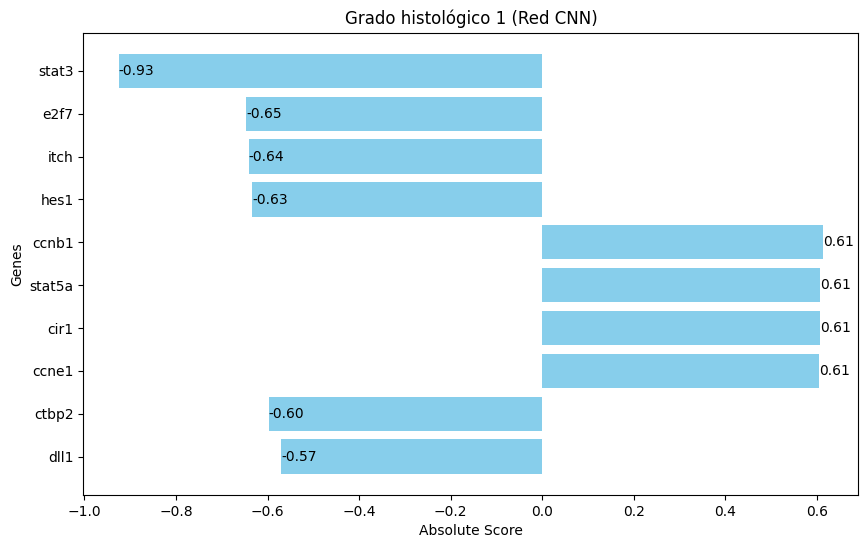

Genes más relevantes para el grado histológico 2 según la puntuación combinada de frecuencia e importancia:
- Gene: rad51c, Frequency: 3, Average Importance: -0.30, Score: -0.91
- Gene: stat3, Frequency: 3, Average Importance: -0.28, Score: -0.84
- Gene: dtx3, Frequency: 3, Average Importance: -0.27, Score: -0.81
- Gene: cdc25a, Frequency: 2, Average Importance: -0.30, Score: -0.61
- Gene: stat5b, Frequency: 4, Average Importance: -0.15, Score: -0.60
- Gene: src, Frequency: 2, Average Importance: -0.28, Score: -0.57
- Gene: ccna1, Frequency: 2, Average Importance: 0.28, Score: 0.56
- Gene: e2f2, Frequency: 2, Average Importance: -0.28, Score: -0.55
- Gene: ep300, Frequency: 4, Average Importance: -0.13, Score: -0.52
- Gene: stat1, Frequency: 4, Average Importance: -0.13, Score: -0.51


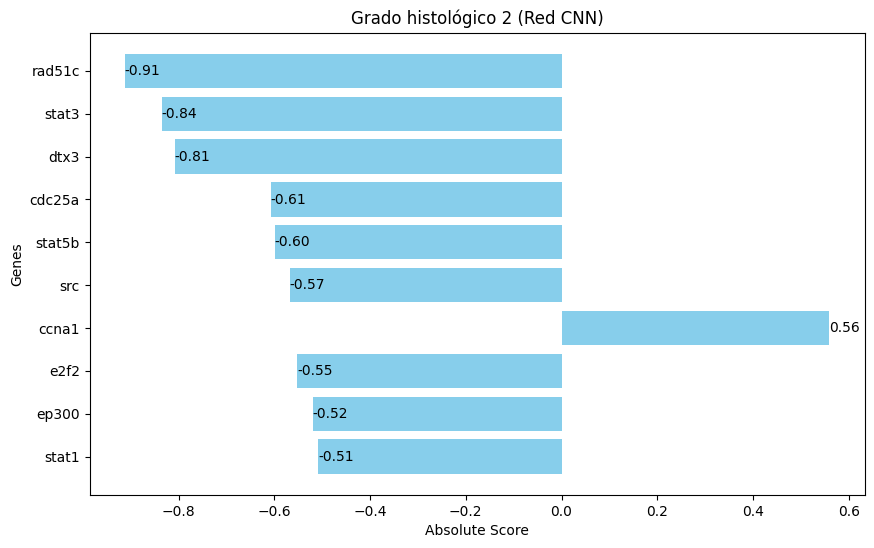

Genes más relevantes para el grado histológico 3 según la puntuación combinada de frecuencia e importancia:
- Gene: dll1, Frequency: 3, Average Importance: -0.29, Score: -0.88
- Gene: stat5b, Frequency: 3, Average Importance: 0.29, Score: 0.88
- Gene: cdkn1a, Frequency: 3, Average Importance: -0.29, Score: -0.87
- Gene: chek2, Frequency: 3, Average Importance: -0.27, Score: -0.81
- Gene: e2f5, Frequency: 3, Average Importance: 0.26, Score: 0.79
- Gene: ccne1, Frequency: 2, Average Importance: 0.32, Score: 0.64
- Gene: e2f7, Frequency: 4, Average Importance: 0.15, Score: 0.61
- Gene: adam17, Frequency: 2, Average Importance: -0.30, Score: -0.59
- Gene: cdkn1b, Frequency: 2, Average Importance: 0.30, Score: 0.59
- Gene: epcam, Frequency: 2, Average Importance: 0.29, Score: 0.57


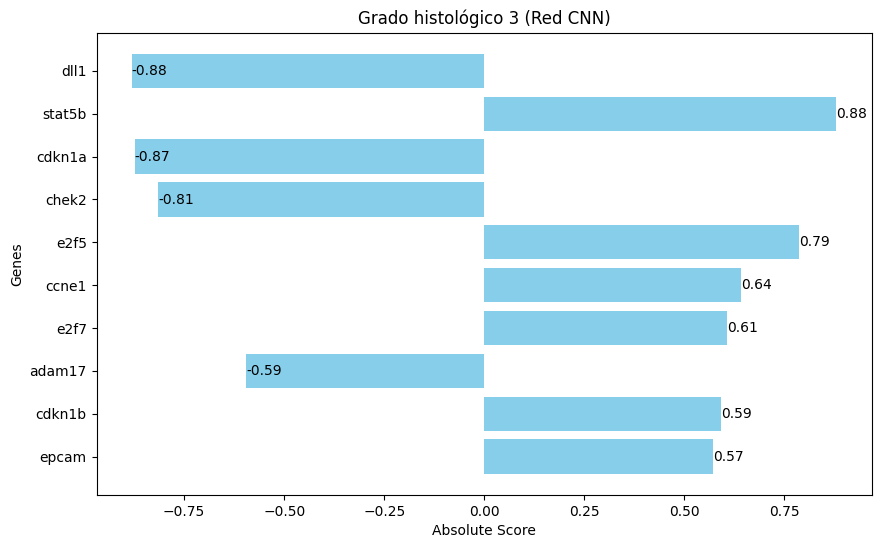

In [221]:
# Listas para almacenar las métricas en cada iteración de la validación cruzada
train_losses_cnn = []
train_accuracies_cnn = []
test_losses_cnn = []
test_accuracies_cnn = []
f1_scores_cnn = []

# Número de divisiones para el cross validation
num_runs = 10

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_cnn = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_cnn = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

# Definir validación cruzada
kf = StratifiedKFold(n_splits=num_runs, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Crear y compilar el modelo CNN
    input_shape = (X_train_scaled.shape[1], 1)
    model_cnn = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenar el modelo
    history_cnn = model_cnn.fit(X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1], 1), y_train_cv, epochs=100, batch_size=32, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), callbacks=[reduce_lr, early_stop], verbose=0)

    # Evaluar el modelo en los datos de entrenamiento y prueba
    train_loss_cnn, train_accuracy_cnn = model_cnn.evaluate(X_train_cv.reshape(X_train_cv.shape[0], X_train_cv.shape[1], 1), y_train_cv, verbose=0)
    test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1), y_test, verbose=0)

    # Guardar las métricas
    train_losses_cnn.append(train_loss_cnn)
    train_accuracies_cnn.append(train_accuracy_cnn)
    test_losses_cnn.append(test_loss_cnn)
    test_accuracies_cnn.append(test_accuracy_cnn)

    # Calcular el F1 score en los datos de prueba
    y_pred_test_cnn = np.argmax(model_cnn.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1)
    f1_scores_cnn.append(f1_score(y_test, y_pred_test_cnn, average='macro'))

    
    # Obtener los pesos de la última capa densa de la Red CNN
    dense_layer_weights_cnn = model_cnn.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_cnn = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de los genes del top 10 para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_cnn = np.argsort(np.abs(dense_layer_weights_cnn[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_cnn:
            gene_name_cnn = column_names_cnn[idx_gene]
            gene_frequency_by_class_cnn[idx_class + 1][gene_name_cnn] += 1
            gene_importance_sum_by_class_cnn[idx_class + 1][gene_name_cnn] += dense_layer_weights_cnn[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular la puntuación combinada de frecuencia e importancia para cada gen para cada grado histológico
gene_scores_by_class_cnn = {1: {}, 2: {}, 3: {}}
for hist_grade_cnn in range(1, 4):
    gene_score_cnn = {}
    for gene_cnn, freq_cnn in gene_frequency_by_class_cnn[hist_grade_cnn].items():
        avg_importance_cnn = gene_importance_sum_by_class_cnn[hist_grade_cnn][gene_cnn] / freq_cnn
        gene_score_cnn[gene_cnn] = freq_cnn * avg_importance_cnn
    gene_scores_by_class_cnn[hist_grade_cnn] = gene_score_cnn

# Mostrar los genes más relevantes según la puntuación combinada para cada grado histológico
for hist_grade_cnn in range(1, 4):
    sorted_genes_by_score_cnn = sorted(gene_scores_by_class_cnn[hist_grade_cnn].items(), key=lambda x: abs(x[1]), reverse=True)
    
    print(f"Genes más relevantes para el grado histológico {hist_grade_cnn} según la puntuación combinada de frecuencia e importancia:")
    relevant_genes = []

    for gene_cnn, score_cnn in sorted_genes_by_score_cnn[:10]:
        freq_cnn = gene_frequency_by_class_cnn[hist_grade_cnn][gene_cnn]
        avg_importance_cnn = gene_importance_sum_by_class_cnn[hist_grade_cnn][gene_cnn] / freq_cnn
        if abs(score_cnn) > 0.01:  # Excluir genes con score cercano a cero
            relevant_genes.append((gene_cnn, freq_cnn, avg_importance_cnn, score_cnn))
            print(f"- Gene: {gene_cnn}, Frequency: {freq_cnn}, Average Importance: {avg_importance_cnn:.2f}, Score: {score_cnn:.2f}")

    # Crear el gráfico de barras solo con los genes del top 10
    if relevant_genes:
        sorted_relevant_genes = sorted(relevant_genes, key=lambda x: abs(x[3]), reverse=True)
        genes_cnn = [gene for gene, _, _, _ in sorted_relevant_genes]
        scores_cnn = [score for _, _, _, score in sorted_relevant_genes]

        plt.figure(figsize=(10, 6))
        plt.barh(genes_cnn, scores_cnn, color='skyblue')
        plt.title(f'Grado histológico {hist_grade_cnn} (Red CNN)')
        plt.xlabel('Absolute Score')
        plt.ylabel('Genes')
        plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

        # Añadir valores al final de cada barra
        for i, score in enumerate(scores_cnn):
            plt.text(score, i, f'{score:.2f}', va='center', color='black')

        plt.show()
    else:
        print(f"No hay genes relevantes para el grado histológico {hist_grade_cnn}.")


**Análisis de los resultados**

In [140]:
# Calcular promedios de las métricas
avg_train_loss_cnn = np.mean(train_losses_cnn)
avg_train_accuracy_cnn = np.mean(train_accuracies_cnn)
avg_test_loss_cnn = np.mean(test_losses_cnn)
avg_test_accuracy_cnn = np.mean(test_accuracies_cnn)
avg_f1_score_cnn = np.mean(f1_scores_cnn)

# Imprimir los resultados
print("Resultados del modelo CNN con validación cruzada:")
print(f"Promedio de precisión en entrenamiento: {avg_train_accuracy_cnn:.4f}")
print(f"Promedio de precisión en prueba: {avg_test_accuracy_cnn:.4f}")
print(f"Promedio de pérdida en entrenamiento: {avg_train_loss_cnn:.4f}")
print(f"Promedio de pérdida en prueba: {avg_test_loss_cnn:.4f}")
print(f"Promedio del F1 Score en prueba: {avg_f1_score_cnn:.4f}")

Resultados del modelo CNN con validación cruzada:
Promedio de precisión en entrenamiento: 0.7825
Promedio de precisión en prueba: 0.6610
Promedio de pérdida en entrenamiento: 0.5245
Promedio de pérdida en prueba: 0.7255
Promedio del F1 Score en prueba: 0.5601


Las métricas elegidas para analizar la performance de los modelos son:

* **Accuracy**: Indica la proporción de muestras clasificadas correctamente por el modelo, es decir, la cantidad de predicciones correctas divididas por el total de predicciones.
* **Loss** (pérdida): La pérdida es una medida del error del modelo durante el entrenamiento y la evaluación. Representa la discrepancia entre las predicciones del modelo y los valores reales del objetivo. Una pérdida más baja indica un mejor rendimiento del modelo.
* **F1 Score**: El puntaje F1 es una medida de la precisión del modelo que tiene en cuenta tanto la precisión como el recall (sensibilidad):
    - La precisión indica la proporción de muestras clasificadas correctamente como positivas (verdaderos positivos) de todas las muestras clasificadas como positivas (incluyendo los falsos positivos), en resumen mide la precisión de las predicciones positivas del modelo.
    - El recall indica la proporción de muestras positivas correctamente identificadas por el modelo de todas las muestras positivas reales en el conjunto de datos (también conocido como tasa de verdaderos positivos). En resumen mide la capacidad del modelo para capturar todas las muestras positivas.

A continuación podemos una visión general de la arquitectura de la red neuronal convolucional junto con el número de parámetros asociados. En el cuadro presentado, cada fila representa una capa diferente en la red, y se proporciona información sobre el tipo de capa, la forma de la salida, y el número de parámetros entrenables y no entrenables de cada capa.

- Parámetros Entrenables: Son los pesos y sesgos que la red ajusta durante el entrenamiento para minimizar la pérdida. Estos parámetros son los que la red aprende y se actualizan mediante el algoritmo de optimización.

- Parámetros No Entrenables: Son parámetros que no se ajustan durante el entrenamiento y permanecen fijos. Estos parámetros pueden ser, por ejemplo, los parámetros de una capa de agrupación máxima, que se utilizan para definir el tamaño de la ventana de agrupación pero no se modifican durante el entrenamiento.

En este caso, la red tiene un total de 7,080,587 parámetros, de los cuales 2,360,195 son entrenables y 4,720,392 son no entrenables.

In [ ]:
print(model_cnn.summary())

#### Matriz de confusión

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


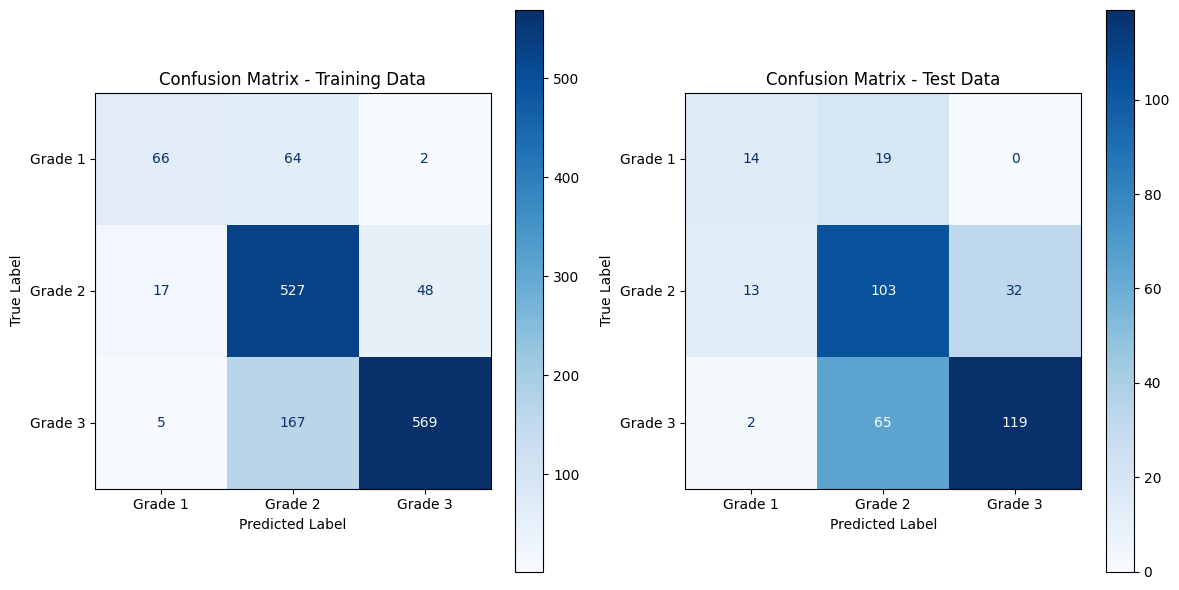

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, np.argmax(model_cnn.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), axis=1))
cm_test = confusion_matrix(y_test, np.argmax(model_cnn.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1))

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


In [172]:
cm_train

array([[ 66,  64,   2],
       [ 17, 527,  48],
       [  5, 167, 569]])

In [173]:
cm_test

array([[ 14,  19,   0],
       [ 13, 103,  32],
       [  2,  65, 119]])

La matriz de confusión muestra la comparación entre las etiquetas verdaderas y las predicciones realizadas por el modelo para cada una de las tres clases de grado histológico en los tumores de mama. Cada fila de la matriz representa la clase verdadera, mientras que cada columna representa la clase predicha por el modelo. 

Podemos observar que para los datos de entrenamiento, el modelo CNN mostró una precisión bastante alta, con un alto número de muestras correctamente clasificadas en todas las clases. Sin embargo, también cometió un número significativo de errores, especialmente al clasificar muestras de la clase 1 como clase 2 y viceversa, lo que se refleja en las celdas no nulas fuera de la diagonal principal en la matriz de confusión. Por otro lado, para los datos de prueba, el modelo mostró una precisión algo menor, con menos muestras correctamente clasificadas en todas las clases en comparación con los datos de entrenamiento. Además, los errores cometidos por el modelo fueron similares a los observados en los datos de entrenamiento, con una cantidad considerable de muestras de clase 1 y clase 2 clasificadas incorrectamente como clase 2 y clase 1, respectivamente. Estas observaciones sugieren que el modelo puede estar sobreajustado a los datos de entrenamiento, ya que su rendimiento en los datos de prueba no es tan alto como en los datos de entrenamiento, y los errores cometidos son consistentes entre ambos conjuntos de datos.

#### Genes más relevantes por grado histológico:

#### Red Neuronal Recurrente (RNN)

El segundo modelo elegido es una Red Neuronal Recurrente (RNN). Las Redes Neuronales Recurrentes son un tipo de arquitectura de redes neuronales que están especialmente diseñadas para modelar secuencias de datos, donde la entrada tiene una estructura temporal o secuencial. Aunque inicialmente se diseñaron para trabajar con datos secuenciales como texto o series temporales, las RNN también se han aplicado con éxito en problemas donde la estructura secuencial no es temporal, como en este caso, la expresión génica. En este sentido, una RNN puede considerarse como un modelo que aprende y explora las relaciones secuenciales entre los genes, capturando la complejidad de cómo los genes interactúan y afectan el estadío del tumor. 
Es decir que aunque los datos de expresión genética no son secuenciales en el sentido tradicional, la relación intrínseca entre los genes puede considerarse secuencial, ya que la expresión de un gen puede estar influenciada por otros genes. Además, la expresión génica es un proceso altamente complejo y multifacético, lo que sugiere la presencia de patrones no lineales que una RNN puede capturar eficazmente. Al modelar la expresión génica con una RNN, se pueden explorar las relaciones complejas entre los genes y cómo estas relaciones contribuyen a la clasificación del grado histológico. 

El modelo de Red Neuronal Recurrente (RNN) utilizado está compuesto por varias capas: 
- En primer lugar, tenemos una capa de entrada que recibe los datos en forma de secuencia, donde cada secuencia representa una muestra de entrada. Esta capa de entrada está configurada para manejar datos de forma tridimensional, con dimensiones correspondientes al número de muestras, el número de características, y el tamaño de la secuencia (que en este caso es 1, ya que cada característica es tratada como un paso de tiempo en la secuencia).

- A continuación, tenemos una capa LSTM (Long Short-Term Memory) con 64 unidades y activación 'tanh'. Las LSTM son una clase de RNNs capaces de aprender dependencias a largo plazo en secuencias de datos. Utilizan mecanismos de puerta para controlar el flujo de información, lo que les permite mantener información relevante durante largos intervalos de tiempo y eliminar información irrelevante. La activación 'tanh' es una elección común para las LSTM, ya que ayuda a mantener la estabilidad de los gradientes durante el entrenamiento. Además, se ha aplicado regularización L2 tanto a los pesos de las entradas como a los recurrentes, para prevenir el sobreajuste y mejorar la generalización del modelo.

- Después de la capa LSTM, se incluye una capa de Batch Normalization. Esta capa normaliza las activaciones de la capa anterior durante el entrenamiento, lo que ayuda a acelerar el proceso de entrenamiento y a hacer el modelo más estable. Batch Normalization también actúa como una forma de regularización, ayudando a prevenir el sobreajuste.

- Luego, se encuentra una capa densa con 128 unidades y activación 'relu'. Las capas densas (o fully connected) son fundamentales en las redes neuronales, ya que conectan cada neurona de la capa anterior con cada neurona de la capa siguiente. La activación 'relu' (Rectified Linear Unit) es ampliamente utilizada porque introduce no linealidad en el modelo, permitiendo que la red aprenda una amplia variedad de funciones. También es eficiente computacionalmente y ayuda a mitigar el problema del desvanecimiento del gradiente.

- Para añadir regularización adicional y mejorar la capacidad del modelo de generalizar a nuevos datos, se incluye una capa de Dropout con una tasa del 20%. Dropout es una técnica de regularización en la que, durante cada paso de entrenamiento, se "apagan" aleatoriamente un conjunto de neuronas junto con sus conexiones. Esto previene que las neuronas se vuelvan demasiado dependientes de ciertas características y fomenta la independencia y robustez en el modelo.

- Finalmente, la capa de salida es otra capa densa con 3 unidades y activación 'softmax'. Esta capa es responsable de producir las probabilidades de cada una de las tres clases posibles (en este caso, los grados histológicos del cáncer). La activación 'softmax' convierte los valores de salida en probabilidades que suman 1, lo cual es apropiado para problemas de clasificación multiclase.

En conjunto, este modelo está diseñado para capturar patrones temporales en los datos mediante la LSTM, estabilizar y regularizar las activaciones con Batch Normalization y Dropout, y finalmente, clasificar las entradas en una de las tres categorías posibles mediante la capa de salida softmax.

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Genes más relevantes para el grado histológico 1 según la puntuación combinada de frecuencia e importancia:
- Gene: maml1, Frequency: 5, Average Importance: -0.26, Score: -1.32
- Gene: casp10, Frequency: 3, Average Importance: -0.27, Score: -0.82
- Gene: cdk4, Frequency: 3, Average Importance: -0.25, Score: -0.76
- Gene: stat5a, Frequency: 2, Average Importance: -0.27, Score: -0.54
- Gene: ccna1, Frequency: 2, Average Importance: -0.27, Score: -0.53
- Gene: dtx2, Frequency: 2, Average Importance: -0.27, Score: -0.53
- Gene: cdkn2a, Frequency: 2, Average Importance: -0.26, Score: -0.52
- Gene:

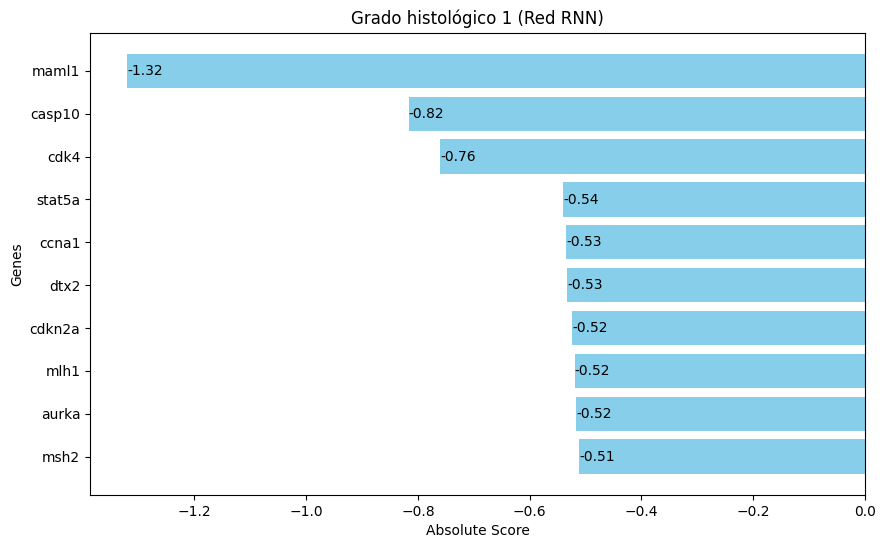

Genes más relevantes para el grado histológico 2 según la puntuación combinada de frecuencia e importancia:
- Gene: nf1, Frequency: 2, Average Importance: -0.25, Score: -0.51
- Gene: pten, Frequency: 4, Average Importance: 0.12, Score: 0.50
- Gene: map2k4, Frequency: 2, Average Importance: -0.24, Score: -0.49
- Gene: itgb3, Frequency: 2, Average Importance: 0.24, Score: 0.48
- Gene: cxcl8, Frequency: 2, Average Importance: 0.23, Score: 0.47
- Gene: spen, Frequency: 2, Average Importance: -0.23, Score: -0.46
- Gene: ctbp2, Frequency: 2, Average Importance: 0.22, Score: 0.44
- Gene: ccna1, Frequency: 2, Average Importance: 0.21, Score: 0.43
- Gene: rad51c, Frequency: 2, Average Importance: -0.21, Score: -0.41
- Gene: hes1, Frequency: 1, Average Importance: -0.34, Score: -0.34


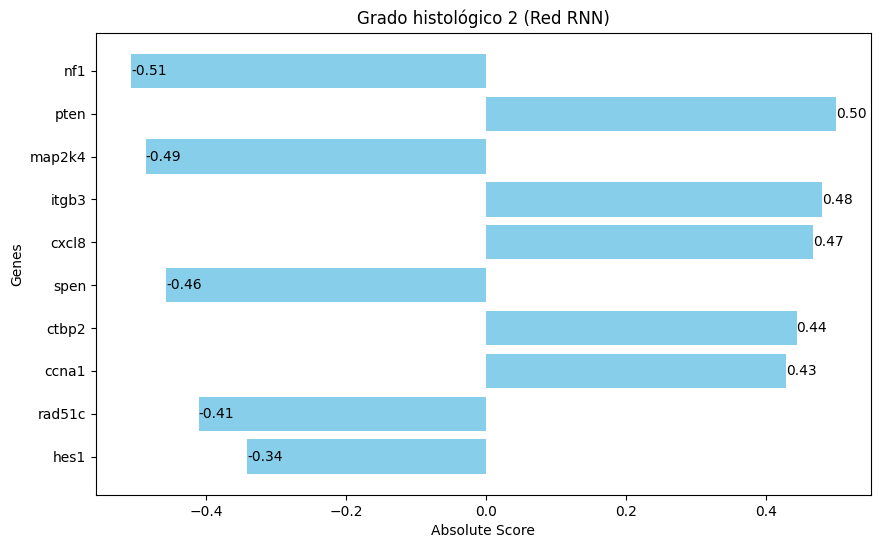

Genes más relevantes para el grado histológico 3 según la puntuación combinada de frecuencia e importancia:
- Gene: jak1, Frequency: 3, Average Importance: -0.35, Score: -1.04
- Gene: e2f7, Frequency: 4, Average Importance: -0.17, Score: -0.69
- Gene: aph1b, Frequency: 2, Average Importance: -0.34, Score: -0.69
- Gene: rbpj, Frequency: 2, Average Importance: -0.34, Score: -0.68
- Gene: gdf11, Frequency: 2, Average Importance: -0.34, Score: -0.68
- Gene: cdk6, Frequency: 2, Average Importance: -0.34, Score: -0.68
- Gene: bcl2l1, Frequency: 2, Average Importance: -0.34, Score: -0.68
- Gene: eif4ebp1, Frequency: 2, Average Importance: -0.30, Score: -0.59
- Gene: e2f5, Frequency: 2, Average Importance: -0.29, Score: -0.59
- Gene: chek2, Frequency: 2, Average Importance: -0.29, Score: -0.57


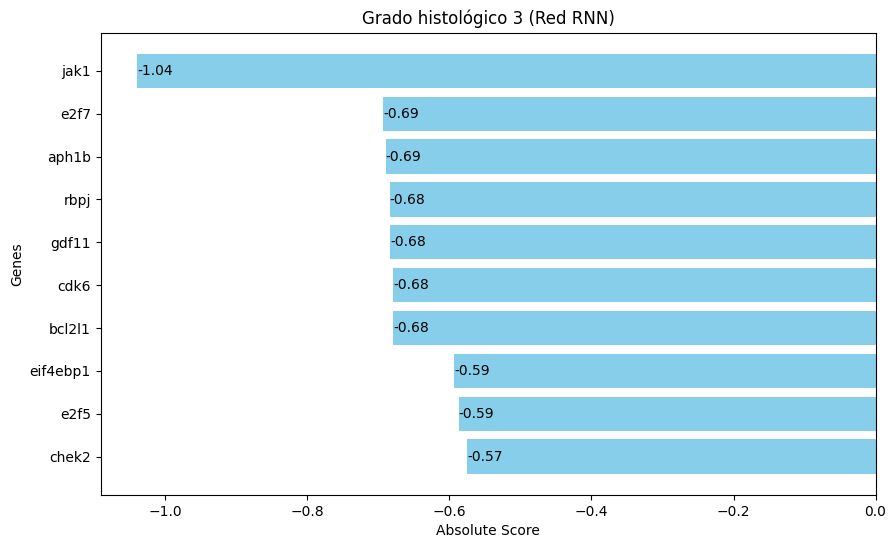

In [220]:
from tensorflow.keras.layers import LSTM, BatchNormalization

train_losses_rnn = []
train_accuracies_rnn = []
test_losses_rnn = []
test_accuracies_rnn = []
f1_scores_rnn = []

# Número de divisiones en la validación cruzada
num_folds = 10

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_rnn = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_rnn = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

# Reformatear los datos de entrenamient y prueba para LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)

# Definir validación cruzada
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_val = X_train_lstm[train_index], X_train_lstm[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Crear y compilar el modelo LSTM
    model_lstm = Sequential([
        Input(shape=(X_train_cv.shape[1], 1)),
        LSTM(units=64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01), recurrent_regularizer=tf.keras.regularizers.l2(0.01), return_sequences=True),
        LSTM(units=64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01), recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history_lstm = model_lstm.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0,
                                   callbacks=[ReduceLROnPlateau(factor=0.2, patience=3, min_lr=0.0001), EarlyStopping(patience=5)])

    # Evaluar el modelo en los datos de entrenamiento y prueba
    train_loss_rnn, train_accuracy_rnn = model_lstm.evaluate(X_train_cv, y_train_cv, verbose=0)
    test_loss_rnn, test_accuracy_rnn = model_lstm.evaluate(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1), y_test, verbose=0)

    # Guardar las métricas
    train_losses_rnn.append(train_loss_rnn)
    train_accuracies_rnn.append(train_accuracy_rnn)
    test_losses_rnn.append(test_loss_rnn)
    test_accuracies_rnn.append(test_accuracy_rnn)

    # Calcular el F1 score en los datos de prueba
    y_pred_test_rnn = np.argmax(model_lstm.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1)
    f1_scores_rnn.append(f1_score(y_test, y_pred_test_rnn, average='macro'))

    # Obtener los pesos de la última capa densa de la Red RNN
    dense_layer_weights_rnn = model_lstm.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_rnn = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de los genes del top ten por ejecución
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_rnn = np.argsort(np.abs(dense_layer_weights_rnn[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_rnn:
            gene_name_rnn = column_names_rnn[idx_gene]
            gene_frequency_by_class_rnn[idx_class + 1][gene_name_rnn] += 1
            gene_importance_sum_by_class_rnn[idx_class + 1][gene_name_rnn] += dense_layer_weights_rnn[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular la puntuación combinada de frecuencia e importancia para cada gen para cada grado histológico
gene_scores_by_class_rnn = {1: {}, 2: {}, 3: {}}
for hist_grade_rnn in range(1, 4):
    gene_score_rnn = {}
    for gene_rnn, freq_rnn in gene_frequency_by_class_rnn[hist_grade_rnn].items():
        avg_importance_rnn = gene_importance_sum_by_class_rnn[hist_grade_rnn][gene_rnn] / freq_rnn
        gene_score_rnn[gene_rnn] = freq_rnn * avg_importance_rnn
    gene_scores_by_class_rnn[hist_grade_rnn] = gene_score_rnn

# Mostrar los genes más relevantes según la puntuación combinada para cada grado histológico
for hist_grade_rnn in range(1, 4):
    sorted_genes_by_score_rnn = sorted(gene_scores_by_class_rnn[hist_grade_rnn].items(), key=lambda x: abs(x[1]), reverse=True)

    print(f"Genes más relevantes para el grado histológico {hist_grade_rnn} según la puntuación combinada de frecuencia e importancia:")
    relevant_genes = []
    
    for gene_rnn, score_rnn in sorted_genes_by_score_rnn[:10]:
        freq_rnn = gene_frequency_by_class_rnn[hist_grade_rnn][gene_rnn]
        avg_importance_rnn = gene_importance_sum_by_class_rnn[hist_grade_rnn][gene_rnn] / freq_rnn
        if abs(score_rnn) > 0.01:  # Excluir genes con score cercano a cero
            relevant_genes.append((gene_rnn, freq_rnn, avg_importance_rnn, score_rnn))
            print(f"- Gene: {gene_rnn}, Frequency: {freq_rnn}, Average Importance: {avg_importance_rnn:.2f}, Score: {score_rnn:.2f}")

    # Crear el gráfico de barras solo con los genes del top 10
    if relevant_genes:
        sorted_relevant_genes = sorted(relevant_genes, key=lambda x: abs(x[3]), reverse=True)
        genes_rnn = [gene for gene, _, _, _ in sorted_relevant_genes]
        scores_rnn = [score for _, _, _, score in sorted_relevant_genes]

        plt.figure(figsize=(10, 6))
        plt.barh(genes_rnn, scores_rnn, color='skyblue')
        plt.title(f'Grado histológico {hist_grade_rnn} (Red RNN)')
        plt.xlabel('Absolute Score')
        plt.ylabel('Genes')
        plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

        # Añadir valores al final de cada barra
        for i, score in enumerate(scores_rnn):
            plt.text(score, i, f'{score:.2f}', va='center', color='black')

        plt.show()
    else:
        print(f"No hay genes relevantes para el grado histológico {hist_grade_rnn}.")


**Análisis de los resultados**

In [143]:
# Calcular promedios de las métricas
avg_train_loss_rnn = np.mean(train_losses_rnn)
avg_train_accuracy_rnn = np.mean(train_accuracies_rnn)
avg_test_loss_rnn = np.mean(test_losses_rnn)
avg_test_accuracy_rnn = np.mean(test_accuracies_rnn)
avg_f1_score_rnn = np.mean(f1_scores_rnn)

# Imprimir los resultados
print("Resultados del modelo RNN con validación cruzada:")
print(f"Promedio de precisión en entrenamiento: {avg_train_accuracy_rnn:.4f}")
print(f"Promedio de precisión en prueba: {avg_test_accuracy_rnn:.4f}")
print(f"Promedio de pérdida en entrenamiento: {avg_train_loss_rnn:.4f}")
print(f"Promedio de pérdida en prueba: {avg_test_loss_rnn:.4f}")
print(f"Promedio del F1 Score en prueba: {avg_f1_score_rnn:.4f}")

Resultados del modelo RNN con validación cruzada:
Promedio de precisión en entrenamiento: 0.5921
Promedio de precisión en prueba: 0.5651
Promedio de pérdida en entrenamiento: 0.8725
Promedio de pérdida en prueba: 0.9185
Promedio del F1 Score en prueba: 0.3729


A continuación podemos una visión general de la arquitectura de la red neuronal recurrente junto con el número de parámetros asociados. 

In [144]:
print(model_lstm.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 411, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,395 (689.05 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 117,512 (459.04 KB)

None


#### Matriz de confusión

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


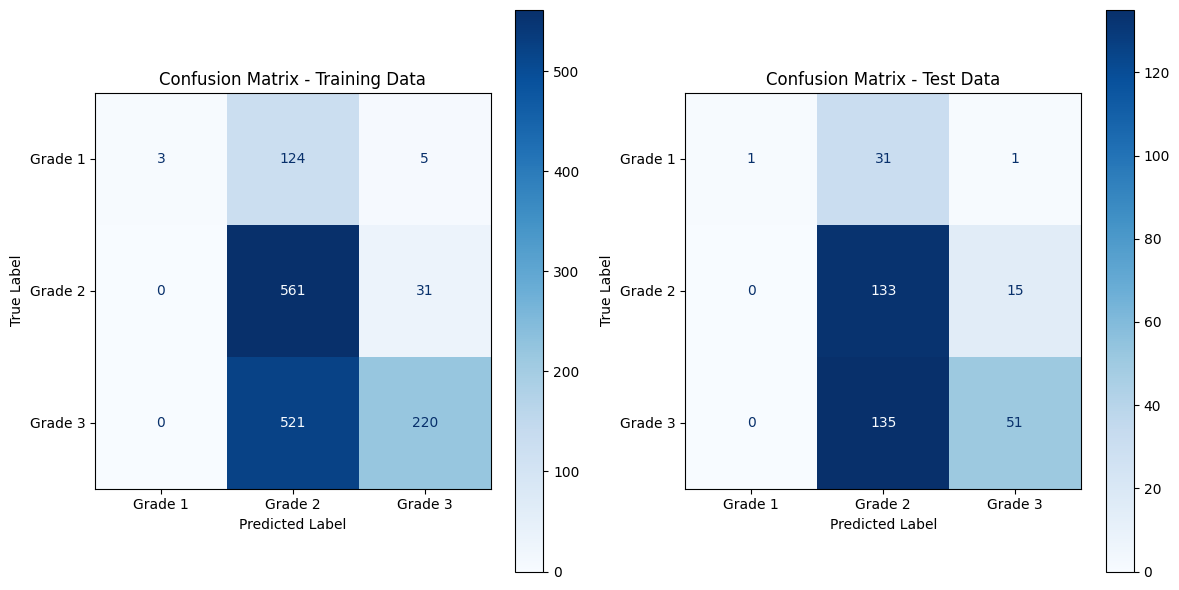

In [174]:
# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, np.argmax(model_lstm.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), axis=1))
cm_test = confusion_matrix(y_test, np.argmax(model_lstm.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1))

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


In [175]:
cm_train

array([[  3, 124,   5],
       [  0, 561,  31],
       [  0, 521, 220]])

In [176]:
cm_test

array([[  1,  31,   1],
       [  0, 133,  15],
       [  0, 135,  51]])

La representación gráfica muestra la matriz de confusión que detalla la capacidad del modelo RNN para clasificar muestras según su grado histológico, tanto en los datos de entrenamiento como en los de prueba.

El análisis de estas matrices para los conjuntos de prueba y entrenamiento revela aspectos fundamentales sobre el rendimiento del modelo. En el conjunto de prueba, ninguna instancia del grado histológico 1 fue clasificada correctamente; en cambio, 4 muestras fueron identificadas como grado 2 y 28 como grado 3. De manera similar, en el conjunto de entrenamiento, se observó un patrón casi idéntico, con 9 instancias del grado 1 clasificadas como grado 2 y 37 como grado 3, sin lograr clasificar correctamente ninguna.

Para el grado histológico 2, en el conjunto de prueba, se identificaron correctamente 52 instancias, pero una mayoría significativa, 92, fueron erróneamente clasificadas como grado 3. En el conjunto de entrenamiento, 400 instancias del grado 2 fueron correctamente clasificadas, mientras que 190 fueron erróneamente clasificadas como grado 3. Esto sugiere que el modelo puede identificar algunas instancias del grado 2, pero aún existe una alta tasa de falsos positivos en la clasificación hacia el grado 3.

Por otro lado, el grado histológico 3 muestra una precisión relativamente mejor. En el conjunto de prueba, 143 instancias fueron correctamente clasificadas, con solo 4 clasificadas erróneamente como grado 2. En el conjunto de entrenamiento, 511 instancias fueron correctamente identificadas, con 231 clasificadas incorrectamente como grado 2. Aunque el modelo presenta una mayor precisión para el grado 3, aún se observa una confusión considerable con el grado 2, lo que sugiere una tendencia a clasificar incorrectamente instancias de grados inferiores como grado 3.

En resumen, el modelo exhibe un claro sesgo hacia la clasificación en grados histológicos más altos, particularmente hacia el grado 3. 

#### Redes Neuronales Multimodales:

Una red neuronal multimodal es un tipo de arquitectura que puede manejar múltiples tipos de datos de entrada, como imágenes, texto, audio, etc., de manera simultánea. En el contexto de este problema de clasificación del grado histológico de tumores de mama, una red neuronal multimodal puede ser extremadamente útil porque combina datos genéticos y clínicos en una sola red, permitiendo al modelo aprovechar la complementariedad de estos datos para mejorar la precisión de la clasificación.

Los datos genéticos pueden proporcionar información molecular detallada sobre los tumores, perfiles de expresión génica, mientras que los datos clínicos pueden incluir características del paciente, como la edad, el estado de salud general, entre otros. Al combinar estos tipos de datos, la red neuronal multimodal puede capturar una gama más amplia de información relevante para la clasificación del grado histológico de los tumores de mama.

La capacidad de la red multimodal para procesar y fusionar datos de diferentes fuentes le permite aprender relaciones complejas y sutiles entre los datos genéticos y clínicos, lo que puede ser crucial para la precisión de la clasificación. Además, al integrar múltiples tipos de datos en una sola red, se pueden aprovechar las características únicas de cada tipo de dato para mejorar la capacidad del modelo para generalizar a nuevos datos y predecir con precisión el grado histológico de los tumores de mama. En resumen, una red neuronal multimodal es especialmente adecuada para este problema particular porque puede aprovechar la complementariedad de los datos genéticos y clínicos para mejorar significativamente la precisión de la clasificación.

A continuación se detalla la arquitectura del modelo elegido:

##### Entrada de Datos Genéticos (CNN): ##### 
- Capa de Conv1D con 64 filtros y tamaño de kernel 5, seguida de una activación ReLU: Esta capa realiza la convolución unidimensional de los datos genéticos para extraer características relevantes. Se utilizan 64 filtros para capturar una variedad de características en los datos, y la función de activación ReLU se utiliza para introducir no linealidades en el modelo.
- Capa de MaxPooling1D con tamaño de ventana 2: Esta capa realiza el submuestreo unidimensional para reducir la dimensionalidad de las características extraídas, manteniendo las características más importantes.
- Capa de Conv1D con 128 filtros y tamaño de kernel 3, seguida de una activación ReLU: Similar a la primera capa convolucional, esta capa captura características adicionales y más complejas de los datos genéticos.
- Capa de MaxPooling1D con tamaño de ventana 2: Otra capa de submuestreo para reducir la dimensionalidad y extraer características dominantes.
- Capa de aplanamiento (Flatten): Esta capa convierte los datos 2D en un vector unidimensional para prepararlos para las capas completamente conectadas.

##### Entrada de Datos Clínicos (Dense): #####
- Capa densa con 64 unidades y activación ReLU: Esta capa procesa los datos clínicos, que son características tabulares, y aprende representaciones densas de los mismos. Se utiliza la activación ReLU para introducir no linealidades y capturar relaciones complejas en los datos.

Fusión de Características:
- Concatenación de las salidas de la capa de aplanamiento y la capa densa de datos clínicos: Esta capa combina las representaciones de características extraídas de los datos genéticos y clínicos en un solo vector, permitiendo al modelo aprender relaciones entre ambos tipos de datos.
- Capa densa con 128 unidades y activación ReLU: Esta capa procesa la información combinada de las características y aprende representaciones más complejas y abstractas.
- Capa densa con 64 unidades y activación ReLU: Otra capa densa para continuar extrayendo características y reducir la dimensionalidad del espacio de características.
- Capa de salida con 3 unidades y activación Softmax: La capa de salida produce las probabilidades de pertenencia a cada una de las clases de grado histológico. Se utiliza la activación Softmax para convertir las salidas en una distribución de probabilidad sobre las clases.

La configuración detrás de este modelo se basa en la idea de capturar tanto las características detalladas de los datos genéticos como las características más generales de los datos clínicos. La combinación de estas características en capas posteriores permite al modelo aprender representaciones complejas y mejoradas que son útiles para la clasificación precisa del grado histológico de los tumores de mama. Además, la inclusión de múltiples capas densas permite al modelo aprender relaciones no lineales entre las características y generar decisiones de clasificación más sofisticadas.

Fold 1/10
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Fold 2/10
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Fold 3/10
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Fold 4/10
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Fold 5/10
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Fold 6/10
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Fold 7/10
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Fold 8/10
Epoch 15: early stopping
Restoring model weights from the end of t

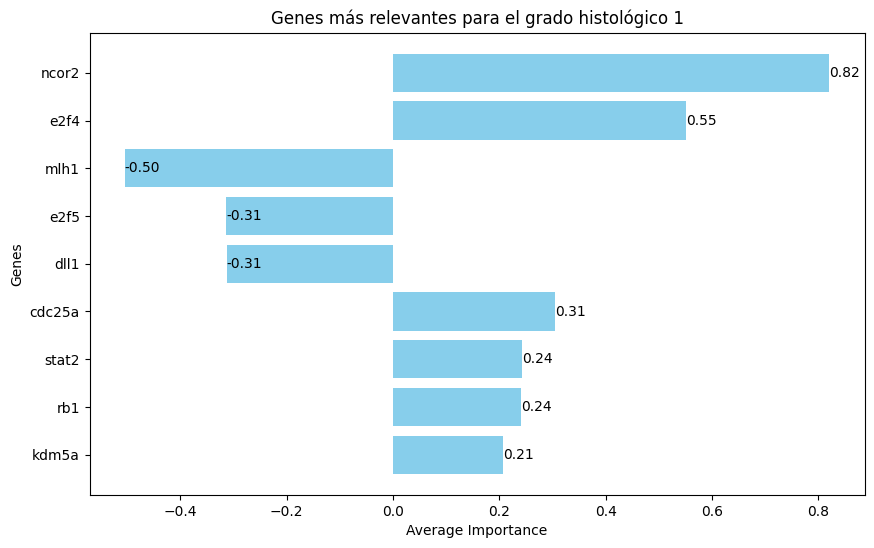

Genes más relevantes para el grado histológico 2:
- Gene: cdk4, Frequency: 3, Average Importance: -0.26, Score: -0.79
- Gene: mlh1, Frequency: 3, Average Importance: 0.26, Score: 0.77
- Gene: tp53bp1, Frequency: 4, Average Importance: 0.10, Score: 0.42
- Gene: ccnb1, Frequency: 3, Average Importance: -0.12, Score: -0.37
- Gene: heyl, Frequency: 3, Average Importance: -0.10, Score: -0.30
- Gene: chek2, Frequency: 3, Average Importance: 0.10, Score: 0.29
- Gene: ncstn, Frequency: 3, Average Importance: 0.09, Score: 0.27
- Gene: cdkn2a, Frequency: 3, Average Importance: 0.09, Score: 0.27
- Gene: maml1, Frequency: 3, Average Importance: -0.09, Score: -0.26


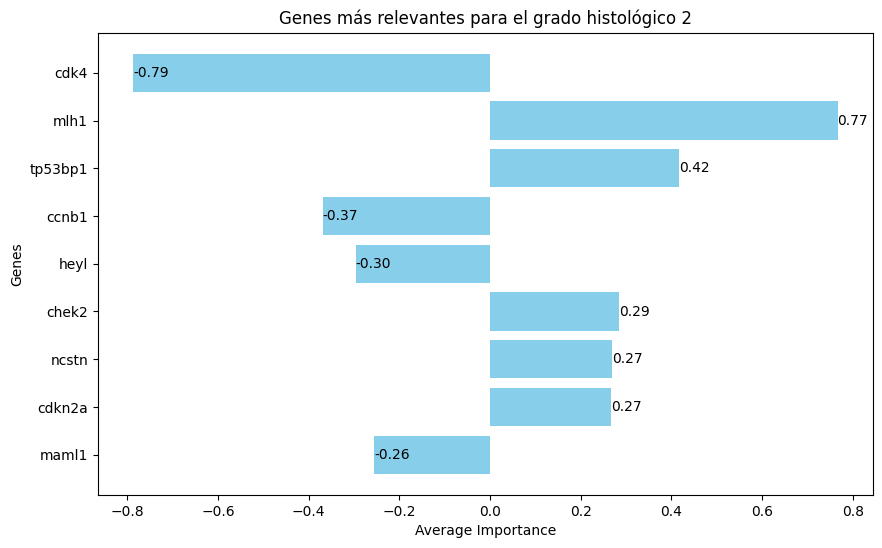

Genes más relevantes para el grado histológico 3:
- Gene: maml3, Frequency: 3, Average Importance: -0.31, Score: -0.92
- Gene: ccne1, Frequency: 5, Average Importance: -0.17, Score: -0.87
- Gene: cdk4, Frequency: 3, Average Importance: -0.28, Score: -0.84
- Gene: hes1, Frequency: 3, Average Importance: 0.27, Score: 0.82
- Gene: rbl1, Frequency: 3, Average Importance: -0.27, Score: -0.82
- Gene: pten, Frequency: 3, Average Importance: 0.11, Score: 0.34
- Gene: heyl, Frequency: 3, Average Importance: 0.10, Score: 0.30
- Gene: msh6, Frequency: 3, Average Importance: 0.09, Score: 0.28
- Gene: dtx3, Frequency: 3, Average Importance: 0.09, Score: 0.26


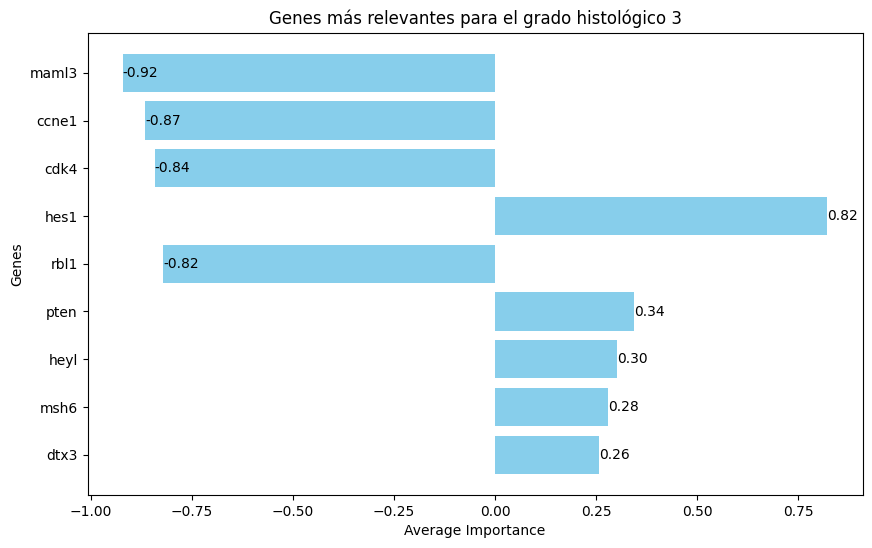

In [218]:
# Importar la función f1_score de scikit-learn
from sklearn.metrics import f1_score

# Separar características (X) y la variable objetivo (y)
X = metabric_data.drop(columns=['neoplasm_histologic_grade'])
y = metabric_data['neoplasm_histologic_grade'] - 1

# Listas para almacenar las métricas en cada iteración de la validación cruzada
train_losses_mm = []
train_accuracies_mm = []
test_losses_mm = []
test_accuracies_mm = []
f1_scores_mm = []

# Número de divisiones para la validación cruzada
num_folds = 10

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_mm = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_mm = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

# Crear el objeto KFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{num_folds}")
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train_mm, X_test_mm = X.iloc[train_index], X.iloc[test_index]
    y_train_mm, y_test_mm = y.iloc[train_index], y.iloc[test_index]

    # Separar características genéticas y clínicas
    X_train_genetic = X_train_mm.iloc[:, 9:331].values
    X_train_clinical = np.hstack((X_train_mm.iloc[:, 1:9].values, X_train_mm.iloc[:, 332:].values))
    X_test_genetic = X_test_mm.iloc[:, 9:331].values
    X_test_clinical = np.hstack((X_test_mm.iloc[:, 1:9].values, X_test_mm.iloc[:, 332:].values))

    # Estandarizar los datos
    scaler_genetic = StandardScaler()
    X_train_scaled_genetic = scaler_genetic.fit_transform(X_train_genetic)
    X_test_scaled_genetic = scaler_genetic.transform(X_test_genetic)

    scaler_clinical = StandardScaler()
    X_train_scaled_clinical = scaler_clinical.fit_transform(X_train_clinical)
    X_test_scaled_clinical = scaler_clinical.transform(X_test_clinical)

    # Definir las formas de entrada para los datos genéticos y clínicos
    genetic_input_shape = (X_train_scaled_genetic.shape[1], 1)
    clinical_input_shape = (X_train_scaled_clinical.shape[1],)

    # Definir las capas de entrada para los datos genéticos y clínicos
    genetic_input = Input(shape=genetic_input_shape, name='genetic_input')
    clinical_input = Input(shape=clinical_input_shape, name='clinical_input')

    # Modelo CNN para datos genéticos
    genetic_cnn = Conv1D(filters=64, kernel_size=5, activation='relu')(genetic_input)
    genetic_cnn = MaxPooling1D(pool_size=2)(genetic_cnn)
    genetic_cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(genetic_cnn)
    genetic_cnn = MaxPooling1D(pool_size=2)(genetic_cnn)
    genetic_cnn = Flatten()(genetic_cnn)

    # Capas densas para datos clínicos
    clinical_dense = Dense(64, activation='relu')(clinical_input)
    clinical_dense = Dense(32, activation='relu')(clinical_dense)

    # Concatenar las salidas de ambas ramas
    combined = Concatenate()([genetic_cnn, clinical_dense])

    # Capas densas finales para clasificación
    output = Dense(128, activation='relu')(combined)
    output = Dense(64, activation='relu')(output)
    output = Dense(3, activation='softmax', name='output')(output)

    # Definir el modelo con dos entradas y una salida
    model_mm = Model(inputs=[genetic_input, clinical_input], outputs=output)

    # Compilar el modelo
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_mm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Definir callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenar el modelo
    history = model_mm.fit({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                            'clinical_input': X_train_scaled_clinical},
                           {'output': y_train_mm},
                           epochs=50,
                           batch_size=32,
                           validation_split=0.2,
                           callbacks=[reduce_lr, early_stop],
                           verbose=0)
    
    # Evaluar el modelo en los datos de entrenamiento y de prueba
    train_loss, train_accuracy = model_mm.evaluate({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                                                     'clinical_input': X_train_scaled_clinical},
                                                    {'output': y_train_mm}, verbose=0)
    test_loss, test_accuracy = model_mm.evaluate({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                                   'clinical_input': X_test_scaled_clinical},
                                                  {'output': y_test_mm}, verbose=0)

    # Guardar las métricas
    train_losses_mm.append(train_loss)
    train_accuracies_mm.append(train_accuracy)
    test_losses_mm.append(test_loss)
    test_accuracies_mm.append(test_accuracy)

    # Calcular el F1 score en los datos de prueba
    y_pred_test = np.argmax(model_mm.predict({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                               'clinical_input': X_test_scaled_clinical}), axis=1)
    f1_score_mm = f1_score(y_test_mm, y_pred_test, average='macro')
    f1_scores_mm.append(f1_score_mm)
    
    # Obtener los pesos de la última capa densa de la Red Multi-Modal
    dense_layer_weights_mm = model_mm.layers[-1].get_weights()[0]

    # Obtener los pesos de la última capa densa de la Red Multi-Modal
    dense_layer_weights_mm = model_mm.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_mm = X.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de cada gen para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_mm = np.argsort(np.abs(dense_layer_weights_mm[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_mm:
            gene_name_mm = column_names_mm[idx_gene]
            gene_frequency_by_class_mm[idx_class + 1][gene_name_mm] += 1
            gene_importance_sum_by_class_mm[idx_class + 1][gene_name_mm] += dense_layer_weights_mm[idx_gene, idx_class]  # Considerar signo de importancia

# Mostrar los genes más relevantes y luego el gráfico para cada grado histológico
for hist_grade_mm in range(1, 4):
    sorted_genes_by_freq_mm = sorted(gene_frequency_by_class_mm[hist_grade_mm].items(), key=lambda x: -x[1])

    print(f"Genes más relevantes para el grado histológico {hist_grade_mm}:")
    relevant_genes = [(gene_mm, freq_mm) for gene_mm, freq_mm in sorted_genes_by_freq_mm[:10] if abs(gene_importance_sum_by_class_mm[hist_grade_mm][gene_mm] / freq_mm) > 0.01]
    
    if relevant_genes:
        genes_mm = [gene for gene, _ in relevant_genes]
        avg_importances_mm = [gene_importance_sum_by_class_mm[hist_grade_mm][gene] / freq for gene, freq in relevant_genes]
        scores_mm = [freq * avg_importance for gene, freq, avg_importance in zip(genes_mm, [freq for _, freq in relevant_genes], avg_importances_mm)]

        # Ordenar los genes y sus scores por el valor absoluto del score
        sorted_genes_and_scores = sorted(zip(genes_mm, avg_importances_mm, scores_mm, [freq for _, freq in relevant_genes]), key=lambda x: abs(x[2]), reverse=True)
        sorted_genes_mm, sorted_avg_importances_mm, sorted_scores_mm, sorted_frequencies_mm = zip(*sorted_genes_and_scores)

        for gene, freq, avg_importance, score in zip(sorted_genes_mm, sorted_frequencies_mm, sorted_avg_importances_mm, sorted_scores_mm):
            print(f"- Gene: {gene}, Frequency: {freq}, Average Importance: {avg_importance:.2f}, Score: {score:.2f}")

        plt.figure(figsize=(10, 6))
        plt.barh(sorted_genes_mm, sorted_scores_mm, color='skyblue')
        plt.title(f'Genes más relevantes para el grado histológico {hist_grade_mm}')
        plt.xlabel('Average Importance')
        plt.ylabel('Genes')
        plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

        # Añadir valores al final de cada barra
        for i, score_mm in enumerate(sorted_scores_mm):
            plt.text(score_mm, i, f'{score_mm:.2f}', va='center', color='black')

        plt.show()
    else:
        print(f"No hay genes relevantes para el grado histológico {hist_grade_mm}.")



**Análisis de resultados:**

In [216]:
# Calcular promedios de las métricas
avg_train_loss_mm = np.mean(train_losses_mm)
avg_train_accuracy_mm = np.mean(train_accuracies_mm)
avg_test_loss_mm = np.mean(test_losses_mm)
avg_test_accuracy_mm = np.mean(test_accuracies_mm)
avg_f1_score_mm = np.mean(f1_scores_mm)

# Imprimir los promedios de las métricas
print(f"Promedio de precisión en entrenamiento: {avg_train_accuracy_mm:.4f}")
print(f"Promedio de precisión en prueba: {avg_test_accuracy_mm:.4f}")
print(f"Promedio de pérdida en entrenamiento: {avg_train_loss_mm:.4f}")
print(f"Promedio de pérdida en prueba: {avg_test_loss_mm:.4f}")
print(f"Promedio del F1 Score en prueba: {avg_f1_score_mm:.4f}")

Promedio de precisión en entrenamiento: 0.8498
Promedio de precisión en prueba: 0.7511
Promedio de pérdida en entrenamiento: 0.3780
Promedio de pérdida en prueba: 0.6464
Promedio del F1 Score en prueba: 0.6350


A continuación podemos una visión general de la arquitectura de la red neuronal convolucional junto con el número de parámetros asociados. 
La red tiene un total de 6,034,667 parámetros, de los cuales 2,011,555 son entrenables y 4,023,112 son no entrenables.

In [148]:
print(model_mm.summary())

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ genetic_input       │ (None, 322, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 318, 64)   │        384 │ genetic_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_38    │ (None, 159, 64)   │          0 │ conv1d_38[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 157, 128)  │     24,704 │ max_pooling1d_38… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clinical_input      │ (None, 87)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_39    │ (None, 78, 128)   │          0 │ conv1d_39[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 64)        │      5,632 │ clinical_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 9984)      │          0 │ max_pooling1d_39… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 32)        │      2,080 │ dense_86[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 10016)     │          0 │ flatten_19[0][0], │
│ (Concatenate)       │                   │            │ dense_87[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 128)       │  1,282,176 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_89 (Dense)    │ (None, 64)        │      8,256 │ dense_88[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 3)         │        195 │ dense_89[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,970,283 (15.15 MB)

 Trainable params: 1,323,427 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,646,856 (10.10 MB)

None


#### Matriz de confusión

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


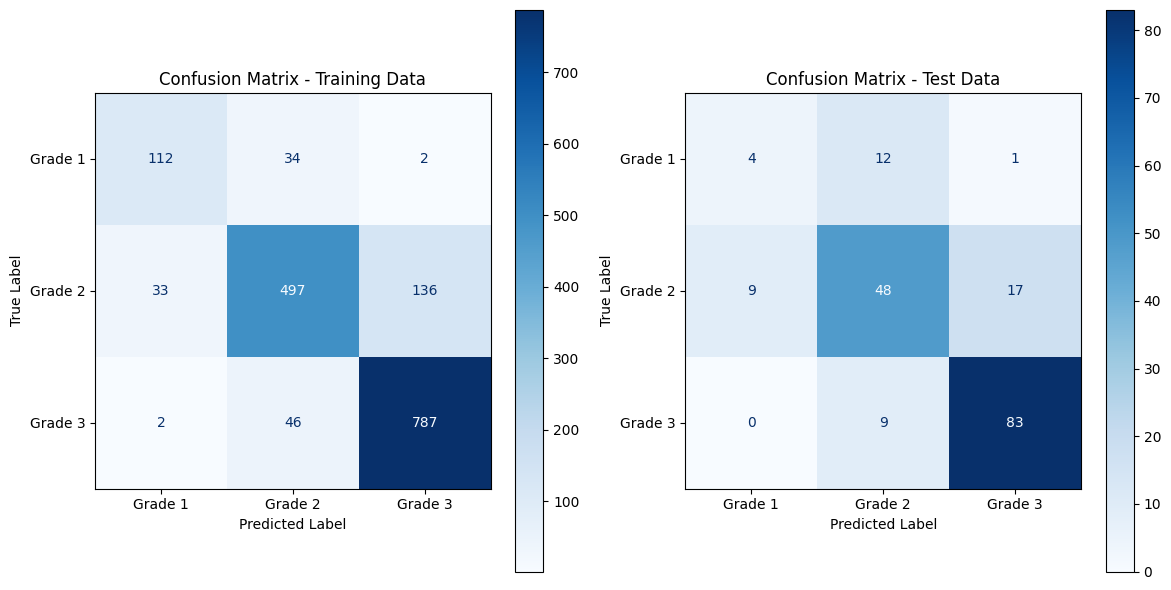

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions for training and test data
y_pred_train = np.argmax(model_mm.predict({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                                            'clinical_input': X_train_scaled_clinical}), axis=1)

y_pred_test = np.argmax(model_mm.predict({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                           'clinical_input': X_test_scaled_clinical}), axis=1)

# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train_mm, y_pred_train)  # Utiliza y_train_mm en lugar de y_train
cm_test = confusion_matrix(y_test_mm, y_pred_test)  # Utiliza y_test_mm en lugar de y_test

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


La matriz de confusión proporciona una visión detallada del rendimiento del modelo en términos de la clasificación de cada clase. En el conjunto de entrenamiento, observamos que la mayoría de las muestras se clasifican correctamente. Sin embargo, el modelo parece tener más dificultades para clasificar las muestras en la clase 1 y 2, con algunas muestras de clase 1 clasificadas incorrectamente como clase 2, y viceversa. Esto se refleja en los valores fuera de la diagonal principal de la matriz de confusión.

En el conjunto de prueba, vemos un patrón similar. La mayoría de las muestras se clasifican correctamente, pero hay algunas confusiones entre las clases 1 y 2. Además, la clase 0 parece ser la menos afectada por las confusiones, con solo algunas muestras clasificadas incorrectamente como clase 1 o 2.

En general, estos resultados muestran que el modelo tiene un buen rendimiento en la clasificación, pero aún hay margen de mejora, especialmente en la distinción entre las clases 1 y 2. Esto podría ser un área para futuras investigaciones y ajustes en el modelo para mejorar su capacidad para distinguir entre estas clases más cercanas.

#### Transformers: ####

Un Transformer es una arquitectura de red neuronal diseñada para modelar relaciones en secuencias de datos, como texto o series temporales, sin depender de técnicas recurrentes como las redes neuronales recurrentes (RNN) o las redes neuronales convolucionales (CNN). En lugar de eso, los Transformers utilizan mecanismos de atención para capturar las dependencias a largo plazo en los datos de entrada, lo que les permite capturar relaciones más complejas y contextuales entre los elementos de la secuencia.

El transformador consta de dos componentes principales: el codificador y el decodificador. El codificador toma una secuencia de entrada y la procesa en una representación de alta dimensionalidad. Este proceso se realiza mediante capas de atención múltiple, que permiten que el modelo se centre en diferentes partes de la secuencia de entrada simultáneamente. El decodificador, por otro lado, genera una salida secuencial a partir de la representación generada por el codificador, utilizando capas de atención para ponderar la información relevante en la entrada codificada. En resumen, el transformador es una arquitectura altamente paralela y eficiente que ha demostrado excelentes resultados en tareas de NLP como traducción automática, generación de texto y clasificación de texto.

Respecto a este proyecto en particular, probar este modelo puede ser útil por varias razones. En primer lugar, los transformadores son capaces de capturar relaciones complejas entre las características de entrada, lo que puede ser crucial en un conjunto de datos que contiene datos clínicos y datos de expresión genética, que pueden tener interacciones no lineales y relaciones no triviales con la variable objetivo. Además, los transformadores son inherentemente capaces de manejar secuencias de longitud variable. Por último, los transformadores han demostrado ser altamente eficaces en tareas de clasificación de texto, lo que sugiere que pueden ser una opción prometedora para clasificar muestras de cáncer de mama en diferentes grados histológicos basándose en datos clínicos y de expresión genética.

En cuanto a la arquitectura del modelo utilizado, cada una de las capas tiene una función específica y está diseñada para capturar ciertas características de los datos de entrada. La capa Conv1D se utiliza para extraer características locales de los datos de entrada, lo que puede ayudar a identificar patrones importantes. 
Las capas de atención múltiple, seguidas de capas de normalización y dropout, se utilizan para capturar relaciones a largo plazo entre las características de entrada y permitir que el modelo se centre en partes relevantes de la secuencia de entrada. 
La capa de reducción de dimensionalidad GlobalMaxPooling1D se utiliza para reducir la dimensionalidad de los datos antes de pasarlos a la capa de salida, lo que puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo. 
Finalmente, las capas densas se utilizan para generar las predicciones finales, con una función de activación softmax en la capa de salida para generar distribuciones de probabilidad sobre las clases de salida. 

Fold 1/5


W0000 00:00:1717365916.056908   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717365930.780973   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717365932.116510   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717365933.166694   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.


W0000 00:00:1717365997.275224   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

W0000 00:00:1717365998.380097   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


W0000 00:00:1717365999.831772   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Fold 2/5


W0000 00:00:1717366018.570182   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366032.981929   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366034.348626   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366035.410032   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


W0000 00:00:1717366074.702066   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

W0000 00:00:1717366075.812808   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


W0000 00:00:1717366077.209994   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Fold 3/5


W0000 00:00:1717366096.245725   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366110.828257   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366112.253448   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366113.314457   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


W0000 00:00:1717366151.571421   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366152.705919   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

W0000 00:00:1717366153.829394   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


W0000 00:00:1717366155.233329   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Fold 4/5


W0000 00:00:1717366174.434020   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366189.593572   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366190.960096   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366192.069859   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


W0000 00:00:1717366228.709068   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366229.918290   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

W0000 00:00:1717366230.995857   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step


W0000 00:00:1717366232.372852   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Fold 5/5


W0000 00:00:1717366251.284762   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366265.563859   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366266.923681   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366267.992113   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 25.


W0000 00:00:1717366390.878125   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717366392.072771   56472 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

W0000 00:00:1717366393.189630   56473 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


W0000 00:00:1717366394.601125   56471 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Genes más relevantes para el grado histológico 1 según frecuencia y promedio de importancia:
- Gene: numbl, Frequency: 3, Average Importance: 0.15, Score: 0.44
- Gene: nras, Frequency: 2, Average Importance: 0.15, Score: 0.30
- Gene: col6a3, Frequency: 3, Average Importance: -0.05, Score: -0.16
- Gene: dtx2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: nr3c1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: runx1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: dtx4, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: ctbp2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: dtx3, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: itch, Frequency: 1, Average Importance: 0.15, Score: 0.15


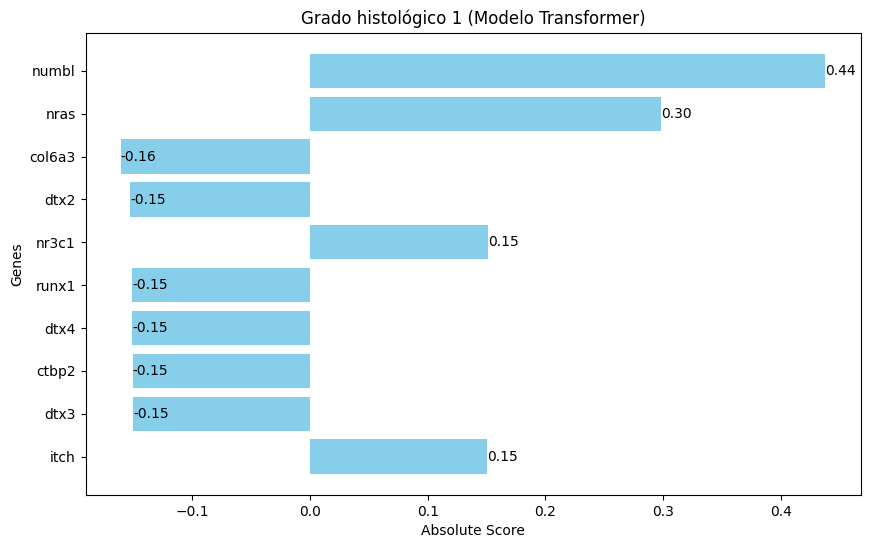

Genes más relevantes para el grado histológico 2 según frecuencia y promedio de importancia:
- Gene: map2, Frequency: 2, Average Importance: -0.15, Score: -0.29
- Gene: mmp12, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: vegfa, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: e2f2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: rheb, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: msh6, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: lfng, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: chek1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: jag1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: mtap, Frequency: 1, Average Importance: 0.15, Score: 0.15


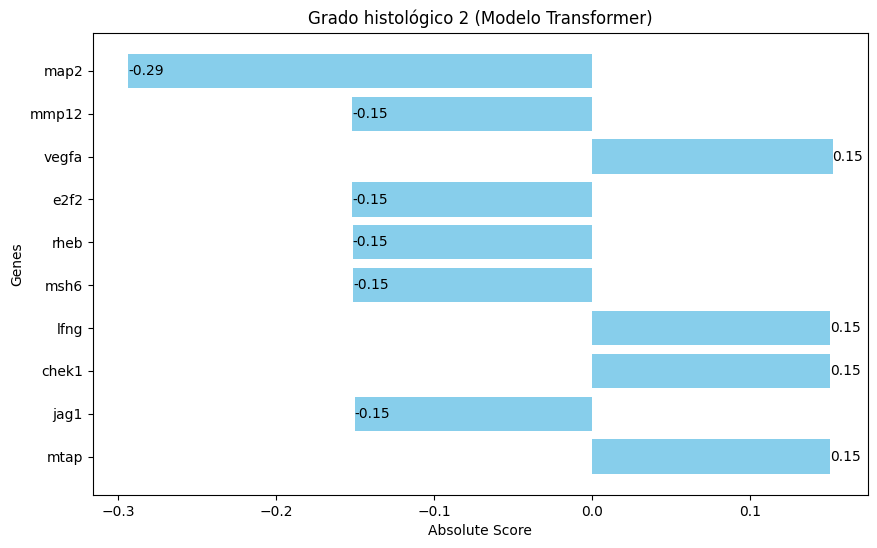

Genes más relevantes para el grado histológico 3 según frecuencia y promedio de importancia:
- Gene: sptbn1, Frequency: 2, Average Importance: -0.15, Score: -0.30
- Gene: rps6ka2, Frequency: 2, Average Importance: -0.15, Score: -0.30
- Gene: vegfa, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: bmp2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: nfkb1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: map3k3, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: e2f3, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: ldlrap1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: gdf11, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: braf, Frequency: 1, Average Importance: -0.15, Score: -0.15


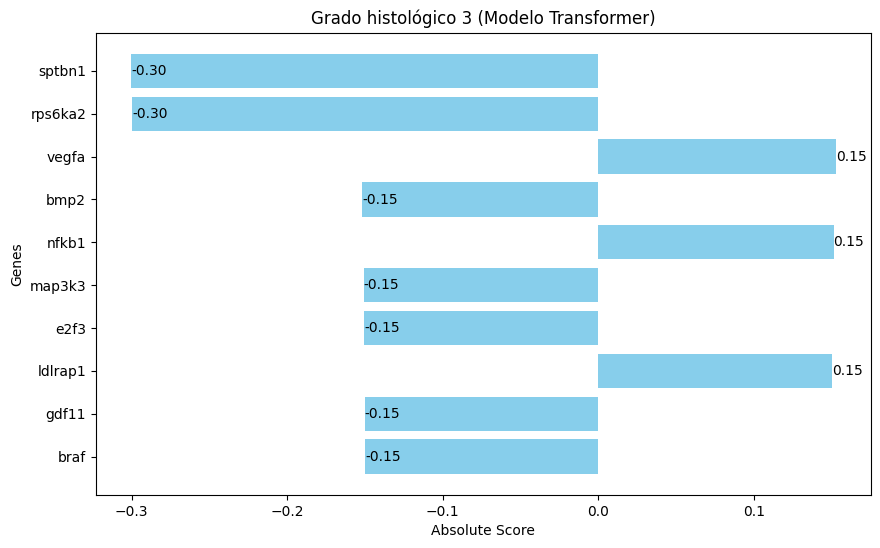

In [219]:
# Listas para almacenar las métricas en cada iteración de la validación cruzada
train_losses_tr = []
train_accuracies_tr = []
test_losses_tr = []
test_accuracies_tr = []
f1_scores_tr = []

# Número de particiones de la validación cruzada
num_folds = 5

# Diccionarios para contar la frecuencia de aparición y suma de importancia de los genes más importantes
gene_frequency_by_class_transformer = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_transformer = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

y = y.reset_index(drop=True)

# Definir el modelo Transformer
def transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(128, kernel_size=3, activation='relu')(inputs)
    
    # Transformer encoder block
    for _ in range(3): 
        attn_output = MultiHeadAttention(num_heads=8, key_dim=64)(x, x) 
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)
        x = Dropout(0.2)(x)  # Increase dropout rate
        ff_output = Dense(128, activation='relu')(x)  # Feed-forward layer
        x = LayerNormalization(epsilon=1e-6)(x + ff_output)
        x = Dropout(0.2)(x)  # Increase dropout rate
    
    # Reduce dimensionality before softmax layer
    x = GlobalMaxPooling1D()(x)
    
    x = Dense(256, activation='relu')(x)  # Dense layer before output layer
    
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Configurar la validación cruzada estratificada
skf = StratifiedKFold(n_splits=num_folds)

for fold, (train_index, test_index) in enumerate(skf.split(X_genetic, y)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Dividir los datos en entrenamiento y prueba
    X_train_genetic, X_test_genetic = X_genetic[train_index], X_genetic[test_index]
    X_train_clinical, X_test_clinical = X_clinical[train_index], X_clinical[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Asegurar que los índices estén presentes en y

    # Estandarizar los datos
    scaler_genetic = StandardScaler()
    X_train_scaled_genetic = scaler_genetic.fit_transform(X_train_genetic)
    X_test_scaled_genetic = scaler_genetic.transform(X_test_genetic)

    scaler_clinical = StandardScaler()
    X_train_scaled_clinical = scaler_clinical.fit_transform(X_train_clinical)
    X_test_scaled_clinical = scaler_clinical.transform(X_test_clinical)

    # Combinar los datos estandarizados
    X_train_scaled = np.hstack((X_train_scaled_genetic, X_train_scaled_clinical))
    X_test_scaled = np.hstack((X_test_scaled_genetic, X_test_scaled_clinical))

    # Añadir una dimensión adicional para los canales
    X_train_scaled_transformer = X_train_scaled[..., np.newaxis]
    X_test_scaled_transformer = X_test_scaled[..., np.newaxis]

    # Definir el número de clases
    num_classes = len(np.unique(y_train))

    # Instanciar el modelo
    transformer = transformer_model(X_train_scaled_transformer.shape[1:], num_classes)

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.0005)  # Reduce learning rate
    transformer.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Definir callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenar el modelo
    history = transformer.fit(X_train_scaled_transformer, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stop], verbose=0)

    # Evaluar el modelo en los datos de entrenamiento y prueba
    train_loss_tr, train_accuracy_tr = transformer.evaluate(X_train_scaled_transformer, y_train, verbose=0)
    test_loss_tr, test_accuracy_tr = transformer.evaluate(X_test_scaled_transformer, y_test, verbose=0)

    # Guardar las métricas
    train_losses_tr.append(train_loss_tr)
    train_accuracies_tr.append(train_accuracy_tr)
    test_losses_tr.append(test_loss_tr)
    test_accuracies_tr.append(test_accuracy_tr)

    # Calcular el F1 score en los datos de prueba
    y_pred_test_tr = np.argmax(transformer.predict(X_test_scaled_transformer), axis=1)
    f1_scores_tr.append(f1_score(y_test, y_pred_test_tr, average='macro'))
    
    # Obtener los pesos de la última capa densa del modelo Transformer
    dense_layer_weights_transformer = transformer.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_transformer = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de cada gen para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_transformer = np.argsort(np.abs(dense_layer_weights_transformer[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_transformer:
            gene_name_transformer = column_names_transformer[idx_gene]
            gene_frequency_by_class_transformer[idx_class + 1][gene_name_transformer] += 1
            gene_importance_sum_by_class_transformer[idx_class + 1][gene_name_transformer] += dense_layer_weights_transformer[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular los scores de los genes
gene_scores_by_class_transformer = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}
for hist_grade_transformer in range(1, 4):
    for gene in gene_frequency_by_class_transformer[hist_grade_transformer]:
        freq = gene_frequency_by_class_transformer[hist_grade_transformer][gene]
        avg_importance = gene_importance_sum_by_class_transformer[hist_grade_transformer][gene] / freq
        gene_scores_by_class_transformer[hist_grade_transformer][gene] = freq * avg_importance

# Mostrar los genes más relevantes según frecuencia y promedio de importancia para cada grado histológico
for hist_grade_transformer in range(1, 4):
    sorted_genes_by_score_transformer = sorted(gene_scores_by_class_transformer[hist_grade_transformer].items(), key=lambda x: -abs(x[1]))

    print(f"Genes más relevantes para el grado histológico {hist_grade_transformer} según frecuencia y promedio de importancia:")
    relevant_genes = []
    
    for gene_transformer, score_transformer in sorted_genes_by_score_transformer[:10]:
        freq_transformer = gene_frequency_by_class_transformer[hist_grade_transformer][gene_transformer]
        avg_importance_transformer = gene_importance_sum_by_class_transformer[hist_grade_transformer][gene_transformer] / freq_transformer
        if abs(score_transformer) > 0.01:  # Excluir genes con score cercano a cero
            relevant_genes.append((gene_transformer, freq_transformer, avg_importance_transformer, score_transformer))
            print(f"- Gene: {gene_transformer}, Frequency: {freq_transformer}, Average Importance: {avg_importance_transformer:.2f}, Score: {score_transformer:.2f}")

    # Crear el gráfico de barras
    if relevant_genes:
        sorted_relevant_genes = sorted(relevant_genes, key=lambda x: abs(x[3]), reverse=True)
        genes_transformer = [gene for gene, _, _, _ in sorted_relevant_genes]
        scores_transformer = [score for _, _, _, score in sorted_relevant_genes]

        plt.figure(figsize=(10, 6))
        plt.barh(genes_transformer, scores_transformer, color='skyblue')
        plt.title(f'Grado histológico {hist_grade_transformer} (Modelo Transformer)')
        plt.xlabel('Absolute Score')
        plt.ylabel('Genes')
        plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

        # Añadir valores al final de cada barra
        for i, score in enumerate(scores_transformer):
            plt.text(score, i, f'{score:.2f}', va='center', color='black')

        plt.show()
    else:
        print(f"No hay genes relevantes para el grado histológico {hist_grade_transformer}.")

**Análisis de los resultados:**

In [163]:
# Calcular promedios de las métricas
avg_train_loss_tr = np.mean(train_losses_tr)
avg_train_accuracy_tr = np.mean(train_accuracies_tr)
avg_test_loss_tr = np.mean(test_losses_tr)
avg_test_accuracy_tr = np.mean(test_accuracies_tr)
avg_f1_score_tr = np.mean(f1_scores_tr)

# Imprimir los resultados
print("Resultados del modelo Transformer con validación cruzada:")
print(f"Promedio de precisión en entrenamiento: {avg_train_accuracy_tr:.4f}")
print(f"Promedio de precisión en prueba: {avg_test_accuracy_tr:.4f}")
print(f"Promedio de pérdida en entrenamiento: {avg_train_loss_tr:.4f}")
print(f"Promedio de pérdida en prueba: {avg_test_loss_tr:.4f}")
print(f"Promedio del F1 Score en prueba: {avg_f1_score_tr:.4f}")

Resultados del modelo Transformer con validación cruzada:
Promedio de precisión en entrenamiento: 0.5235
Promedio de precisión en prueba: 0.4983
Promedio de pérdida en entrenamiento: 0.9255
Promedio de pérdida en prueba: 0.9515
Promedio del F1 Score en prueba: 0.2865


In [164]:
print(transformer.summary())

Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 410, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_84 (Conv1D)  │ (None, 408, 128)  │        512 │ input_layer_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 408, 128)  │    263,808 │ conv1d_84[0][0],  │
│ (MultiHeadAttentio… │                   │            │ conv1d_84[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 408, 128)  │          0 │ conv1d_84[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_24[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_190 (Dense)   │ (None, 408, 128)  │     16,512 │ dropout_47[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 408, 128)  │          0 │ dropout_47[0][0], │
│                     │                   │            │ dense_190[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_25[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 408, 128)  │    263,808 │ dropout_48[0][0], │
│ (MultiHeadAttentio… │                   │            │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 408, 128)  │          0 │ dropout_48[0][0], │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_26[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_191 (Dense)   │ (None, 408, 128)  │     16,512 │ dropout_50[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_27 (Add)        │ (None, 408, 128)  │          0 │ dropout_50[0][0], │
│                     │                   │            │ dense_191[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_27[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 408, 128)  │          0 │ layer_normalizat

 Total params: 2,630,411 (10.03 MB)

 Trainable params: 876,803 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,753,608 (6.69 MB)

None


El resumen del modelo proporciona una descripción detallada de la arquitectura de la red neuronal, incluidas las formas de entrada y salida de cada capa, así como el número de parámetros entrenables en cada capa.

#### Matriz de confusión:

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


W0000 00:00:1717363101.493003   56474 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


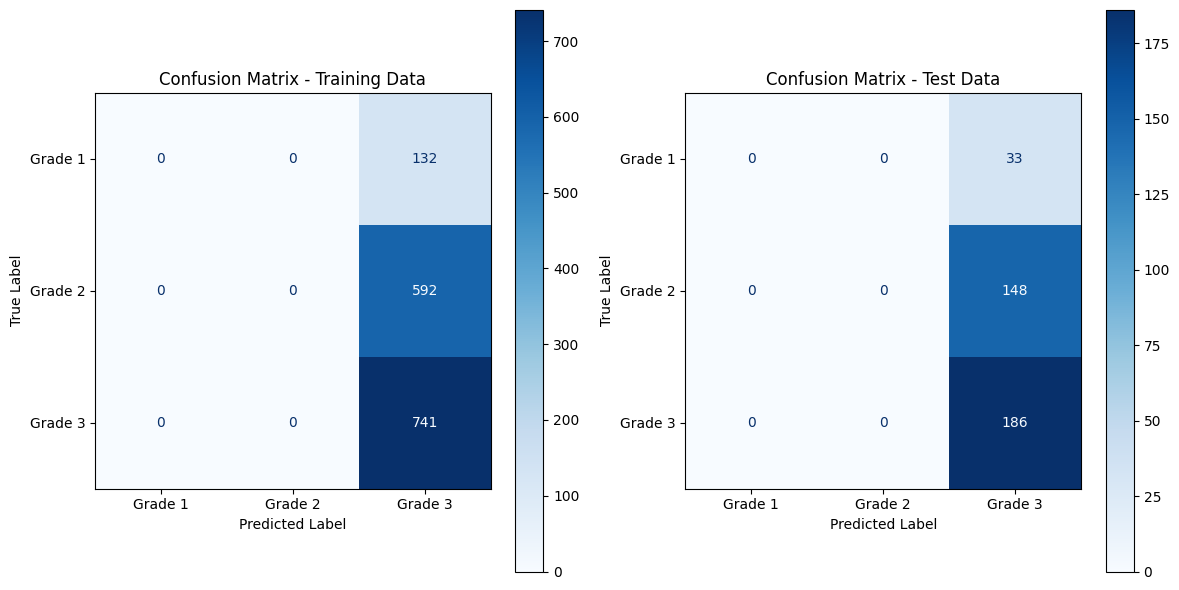

In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener las predicciones para los conjuntos de entrenamiento y prueba
y_pred_train_tr = np.argmax(transformer.predict(X_train_scaled_transformer), axis=1)
y_pred_test_tr = np.argmax(transformer.predict(X_test_scaled_transformer), axis=1)

# Calcular las matrices de confusión para los conjuntos de entrenamiento y prueba
cm_train_tr = confusion_matrix(y_train, y_pred_train_tr)
cm_test_tr = confusion_matrix(y_test, y_pred_test_tr)

# Definir las etiquetas de las clases
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Crear subplots para las matrices de confusión
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot de la matriz de confusión para el conjunto de entrenamiento
disp_train_tr = ConfusionMatrixDisplay(confusion_matrix=cm_train_tr, display_labels=class_labels)
disp_train_tr.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot de la matriz de confusión para el conjunto de prueba
disp_test_tr = ConfusionMatrixDisplay(confusion_matrix=cm_test_tr, display_labels=class_labels)
disp_test_tr.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


In [198]:
cm_train_tr

array([[  0,   0, 132],
       [  0,   0, 592],
       [  0,   0, 741]])

In [199]:
cm_test_tr

array([[  0,   0,  33],
       [  0,   0, 148],
       [  0,   0, 186]])

Los resultados de las matrices de confusión para el conjunto de entrenamiento y prueba revelan algunas tendencias importantes en el rendimiento del modelo Transformer. En el conjunto de entrenamiento, se observa que el modelo tiene dificultades significativas para distinguir entre las clases 1 y 2, con una cantidad notable de muestras clasificadas erróneamente en ambas direcciones. Esto se refleja en la alta cantidad de falsos positivos y falsos negativos en estas clases. Por otro lado, en el conjunto de prueba, aunque se observa una mejora en la capacidad del modelo para distinguir entre las clases 1 y 2 en comparación con el conjunto de entrenamiento, todavía se cometen una cantidad significativa de errores de clasificación. Además, se observa una dificultad similar en la clasificación de la clase 3, con un número notable de falsos positivos y falsos negativos. Estos resultados sugieren que el modelo podría estar sufriendo de sobreajuste en el conjunto de entrenamiento y aún no logra generalizar bien en datos no vistos

#### Comparativa de modelos

Los resultados de los cuatro modelos muestran un rendimiento variado en términos de precisión (accuracy) y pérdida (loss) tanto en los conjuntos de entrenamiento como en los conjuntos de prueba.

El modelo CNN muestra una precisión de entrenamiento del 86.35% y una precisión de prueba del 66.21%, con una pérdida de entrenamiento de 0.369 y una pérdida de prueba de 0.718. Esto sugiere que el modelo CNN tiene un buen rendimiento en el conjunto de entrenamiento, pero experimenta una degradación en el conjunto de prueba, lo que puede indicar cierto grado de sobreajuste.

El modelo RNN tiene una precisión de entrenamiento del 62.32% y una precisión de prueba del 59.95%, con una pérdida de entrenamiento de 0.838 y una pérdida de prueba de 0.868. Esto sugiere que el modelo RNN tiene un rendimiento moderado en ambos conjuntos de datos, pero la precisión y la pérdida son relativamente bajas en comparación con los otros modelos.

El modelo Multimodal muestra una precisión de entrenamiento muy alta del 94.12% y una precisión de prueba del 77.05%, con una pérdida de entrenamiento de 0.186 y una pérdida de prueba de 0.794. Esto sugiere que el modelo Multimodal tiene un rendimiento excelente en el conjunto de entrenamiento y también generaliza bien en el conjunto de prueba, aunque la precisión de prueba es ligeramente más baja que la de entrenamiento, lo que indica un posible leve sobreajuste.

El modelo Transformer muestra una precisión de entrenamiento del 57.30% y una precisión de prueba del 61.75%, con una pérdida de entrenamiento de 0.883 y una pérdida de prueba de 0.859. Esto sugiere que el modelo Transformer tiene un rendimiento inferior en comparación con los otros modelos, con una precisión y una pérdida moderadas tanto en el conjunto de entrenamiento como en el de prueba.

En general, el modelo Multimodal parece ser el más prometedor en términos de precisión y pérdida en ambos conjuntos de datos.

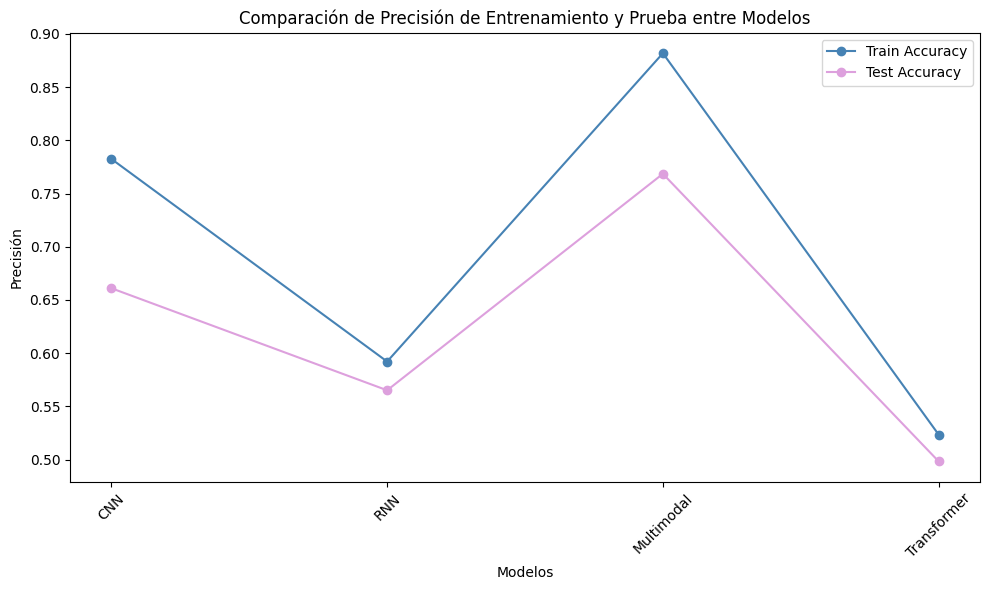

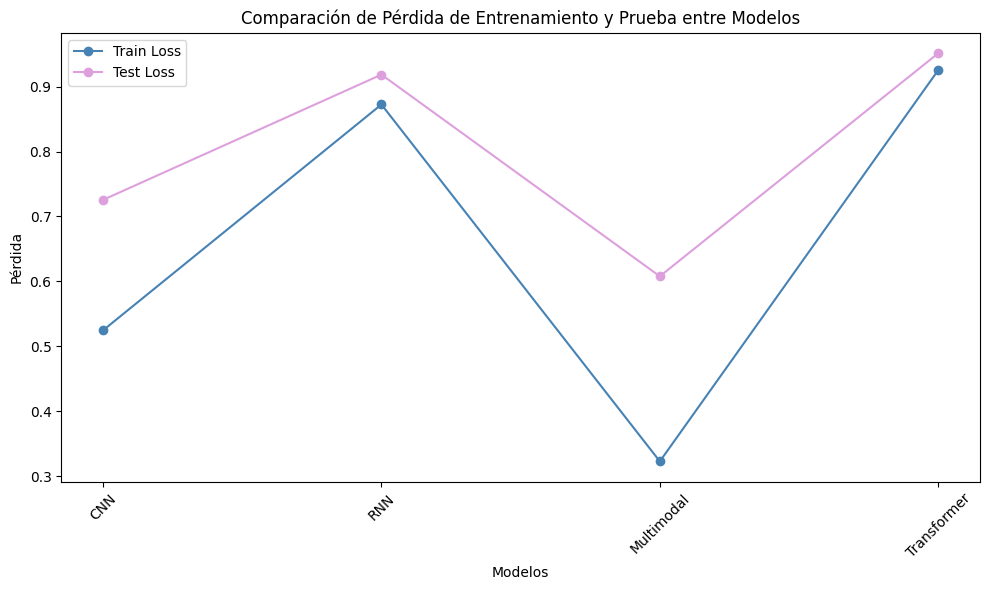

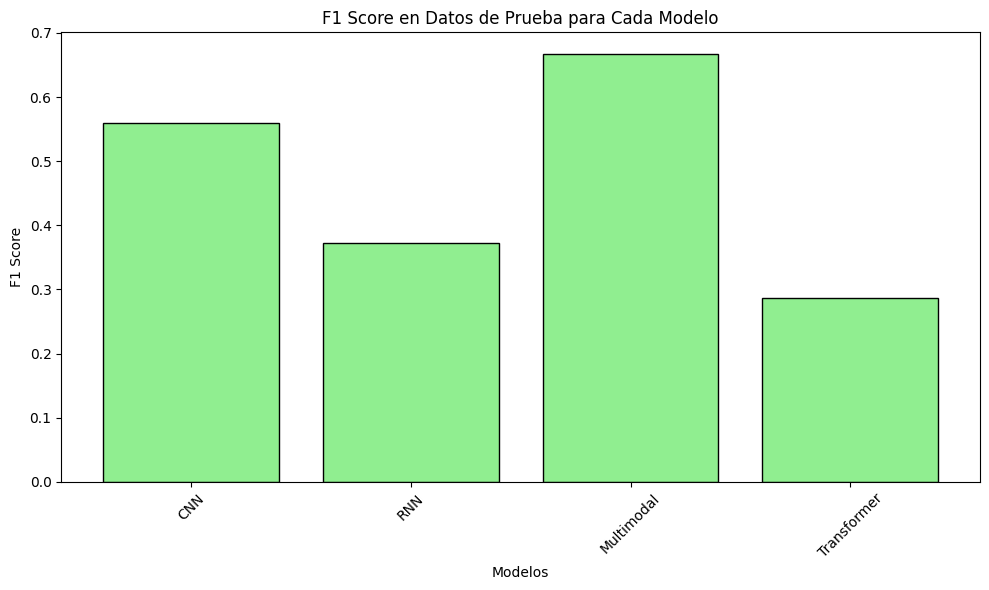

In [167]:
# Métricas de los modelos
models = ['CNN', 'RNN', 'Multimodal', 'Transformer']

# Accuracy
accuracy_train = [avg_train_accuracy_cnn, avg_train_accuracy_rnn, avg_train_accuracy_mm, avg_train_accuracy_tr]
accuracy_test = [avg_test_accuracy_cnn, avg_test_accuracy_rnn, avg_test_accuracy_mm, avg_test_accuracy_tr]

# Loss
loss_train = [avg_train_loss_cnn, avg_train_loss_rnn, avg_train_loss_mm, avg_train_loss_tr]
loss_test = [avg_test_loss_cnn, avg_test_loss_rnn, avg_test_loss_mm, avg_test_loss_tr]

# F1 Score
f1_score_test = [avg_f1_score_cnn, avg_f1_score_rnn, avg_f1_score_mm, avg_f1_score_tr]

# Gráfico de precisión (accuracy) con entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_train, marker='o', color='steelblue', label='Train Accuracy')
plt.plot(models, accuracy_test, marker='o', color='plum', label='Test Accuracy')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de Entrenamiento y Prueba entre Modelos')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pérdida (loss) con entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(models, loss_train, marker='o', color='steelblue', label='Train Loss')
plt.plot(models, loss_test, marker='o', color='plum', label='Test Loss')
plt.xlabel('Modelos')
plt.ylabel('Pérdida')
plt.title('Comparación de Pérdida de Entrenamiento y Prueba entre Modelos')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de F1 Score en datos de prueba
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score_test, color='lightgreen', edgecolor='black')
plt.xlabel('Modelos')
plt.ylabel('F1 Score')
plt.title('F1 Score en Datos de Prueba para Cada Modelo')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [200]:
# Imprimir los resultados ordenados
print("Resultados ordenados para cada modelo:")
print("Modelo\t\tAccuracy Train\tAccuracy Test\tLoss Train\tLoss Test\tF1 Score Test")
for model, acc_train, acc_test, loss_train, loss_test, f1_score in zip(models, accuracy_train, accuracy_test, loss_train, loss_test, f1_score_test):
    print(f"{model}\t\t{acc_train:.4f}\t\t{acc_test:.4f}\t\t{loss_train:.4f}\t\t{loss_test:.4f}\t\t{f1_score:.4f}")


Resultados ordenados para cada modelo:
Modelo		Accuracy Train	Accuracy Test	Loss Train	Loss Test	F1 Score Test
CNN		0.7825		0.6610		0.5245		0.7255		0.5601
RNN		0.5921		0.5651		0.8725		0.9185		0.3729
Multimodal		0.8819		0.7686		0.3226		0.6077		0.6676
Transformer		0.5235		0.4983		0.9255		0.9515		0.2865
